# Consolidated Data Analysis of Metabolomics on Liver Tissue
## Purpose
Metabolomics was performed on liver tissue homogenate from mice that were considered sick or healthy controllers following infection. Our goal is to identify which metabolites were enriched in one population and not the other by using a more unbiased metric of clinical outcome.

We decided on the metric of clinical outcome that can be used to segregate the data: the final temperature of the mouse before harvest. 

## Investigating different clinical outcome
In the analysis, the primary clinical data that were analyzed were temperature, sex, Liver_CFU, genotype, age, and year of data collection, and Hours Post Infection. Overall, the PCA analysis demonstrated grouping when investigating temperature and Liver_CFU, demonstrating that they were strong metrics for correlating the metabolomic profiles in mice.

## Principal Component Analysis (PCA)
To explore the clinical data, PCA was used. PCA is a statistical tool and dimensionality-reduction method that helps identify and visualizes potential relationships between clinical data and the 917 metabolites. PCA increases interpretability but at the same time minimizes information loss. It does so by creating new uncorrelated variables that successively maximize variance. By Converting correlations into a 2-D graph, the correlated groups will cluster together. 



In [1]:
# Libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# read in dfs 
merged_data = pd.read_csv("../raw/final_merged_jeren.csv")
names = pd.read_csv("../raw/Biochemical_names.csv")
metab_def = pd.read_csv("../raw/metabolite_definitions.csv")

In [3]:
metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features (ie metabolites)
x = merged_data.loc[:, metabolites].values
# Separating out the Group
y = merged_data.loc[:,['Group']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [4]:
# If want plotting, set to 1. Otherwise, set to 0.
want_plots = 0

# Visualizing by Lab Assigned Mouse Labels

The following plot represents the PCA plot of the groups as defined by their stage of sickness and genotype (i.e 'EH_WT','ES_WT','ES_KO','EL-KO6','LH_WT','LS_WT','LS_KO'). As shown by the graph there is no clear grouping amongst the data

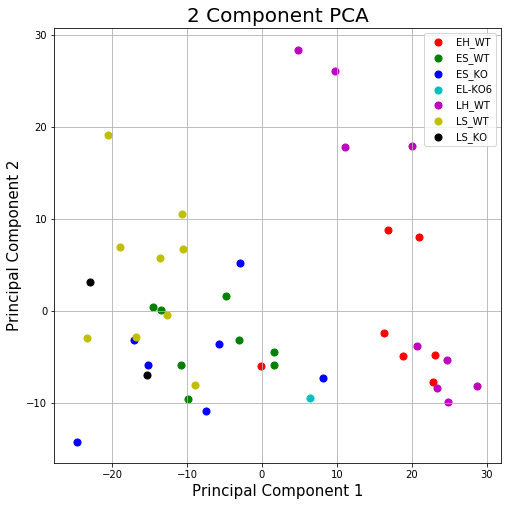

In [5]:
#PCA Analysis
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1',
                                      'principal component 2'])

finalDf_Group = pd.concat([principalDf, merged_data[['Group']]], axis = 1)

#Plotting Data 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

Groups = ['EH_WT','ES_WT','ES_KO','EL-KO6','LH_WT','LS_WT','LS_KO']
colors = ['r', 'g', 'b', 'c' , 'm', 'y', 'k']
for Group, color in zip(Groups,colors):
    indicesToKeep = finalDf_Group['Group'] == Group
    ax.scatter(finalDf_Group.loc[indicesToKeep, 'principal component 1']
               , finalDf_Group.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(Groups)
ax.grid()


### Fig 1
We can see that that early and late healthy wild type groups cluster on the right, whereas the sick mice cluster on the left. Notably, there are no KO healthy mice. Overall, there is a clear separation along the middle of the graph. 


Given that there appears to be no clear segregation amongst genotype, all genotypes were included in the data analysis

# Visualizing by Mouse Sex and Health Status 

While there is no clear grouping between male and female mice as shown by the green (female) and red (male) colored dots. However, the graph shows a relatively strong separation between the sick and healthy mice, which demonstrates that there is a correlation in their metabolomic profile 

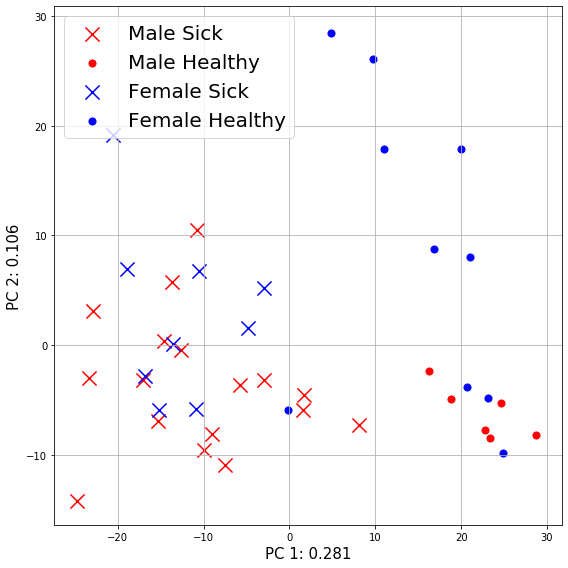

In [6]:
finalDf_gender = pd.concat([principalDf, merged_data[['PARAM_GENDER']], merged_data[['Group']]], axis = 1)

#double check to see proportion of sick vs healthy by sex of mice 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC 1: {}'.format(round(pca.explained_variance_ratio_[0],3)), fontsize = 15)
ax.set_ylabel('PC 2: {}'.format(round(pca.explained_variance_ratio_[1],3)), fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

PARAM_GENDERS = ['M','M','F','F']
PARAM_GROUP = ['S','H','S','H']
Groups = ['Male Sick','Male Healthy','Female Sick','Female Healthy']

colors = ['r', 'r','b','b']
markers = ['x','.', 'x', '.']

for i in range(len(Groups)):
    Gender = PARAM_GENDERS[i]
    Group = PARAM_GROUP[i]
    Color = colors[i]
    Marker = markers[i]
    
    indicesToKeep = (finalDf_gender['PARAM_GENDER'] == Gender)&(finalDf_gender['Group'].str.contains(Group))
    ax.scatter(finalDf_gender.loc[indicesToKeep, 'principal component 1']
               , finalDf_gender.loc[indicesToKeep, 'principal component 2']
               , c = Color
               , s = 200
               , marker = Marker
               , label = Groups[i])
ax.legend(prop={'size':20})
ax.grid()
plt.tight_layout()
plt.savefig('../processed/PCA_2d_Gender_SickvsHealthy.png')

### Fig 2
Similar to the previous graph, there is clear separation and group between the sick and healthy mice. The sick mice as shown by the x-shaped markers group to the bottom left, where as the healthy mice as shown by the dots group towards the right. There appears to be no strong grouping by sex, there is slight grouping with healthy male mice on the bottom right. 

# 3D PCA Visualization

In [7]:
pca3d = PCA(n_components=3)
principalComponents_3d = pca3d.fit_transform(x)
print(pca3d.explained_variance_ratio_)
principalDf_3d = pd.DataFrame(data = principalComponents_3d,
                           columns = ['PC 1',
                                      'PC 2',
                                     'PC 3'])

[0.28085053 0.10605596 0.0711923 ]


In [8]:
#PCA Analysis
finalDf3d_gender = pd.concat([principalDf_3d, merged_data[['PARAM_GENDER']], merged_data[['Group']]], axis = 1)
finalDf3d_gender.head()


PC 1      PC 2      PC 3 PARAM_GENDER  Group
0  16.233331 -2.375181 -7.967390            M  EH_WT
1  16.860422  8.804165  3.027768            F  EH_WT
2  22.786636 -7.776656 -4.460567            M  EH_WT
3  -0.159236 -5.954855 -0.553879            F  EH_WT
4  -4.770076  1.571632 -3.923606            F  ES_WT

C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys
C:\Users\amisr\anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


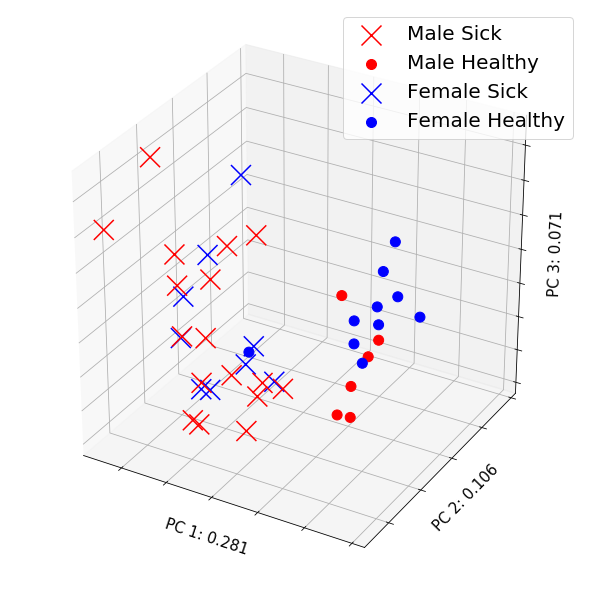

In [9]:
#double check to see proportion of sick vs healthy by sex of mice 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.set_xlabel('PC 1: {}'.format(round(pca3d.explained_variance_ratio_[0],3)), fontsize = 15)
ax.set_ylabel('PC 2: {}'.format(round(pca3d.explained_variance_ratio_[1],3)), fontsize = 15)
ax.set_zlabel('PC 3: {}'.format(round(pca3d.explained_variance_ratio_[2],3)), fontsize = 15)
# ax.set_title('2 Component PCA', fontsize = 20)

PARAM_GENDERS = ['M','M','F','F']
PARAM_GROUP = ['S','H','S','H']
Groups = ['Male Sick','Male Healthy','Female Sick','Female Healthy']

colors = ['r', 'r','b','b']
markers = ['x','.', 'x', '.']

for i in range(len(Groups)):
    Gender = PARAM_GENDERS[i]
    Group = PARAM_GROUP[i]
    Color = colors[i]
    Marker = markers[i]
    
    indicesToKeep = (finalDf3d_gender['PARAM_GENDER'] == Gender)&(finalDf3d_gender['Group'].str.contains(Group))
    ax.scatter(finalDf3d_gender.loc[indicesToKeep, 'PC 1'], finalDf3d_gender.loc[indicesToKeep, 'PC 2'],
               finalDf3d_gender.loc[indicesToKeep, 'PC 3']
               , c = Color
               , s = 400
               , marker = Marker
               , label = Groups[i], alpha=1)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.legend(prop={'size':20})#,bbox_to_anchor=(1.3,1.05))
ax.grid()
# ax.view_init(45,45)
plt.tight_layout()
plt.savefig('../processed/PCA_3d_Gender_SickvsHealthy.png')
plt.show()

### Fig 3
Similar to the previous graph, there is clear separation and group between the sick and healthy mice. The sick mice as shown by the x-shaped markers group to the left, whereas the healthy mice as shown by the dots group towards the right. There appears to be no strong grouping by sex, there is slight grouping with healthy male mice on the bottom right. 


## Visualization by Final Temperature
The Temperature is also used a metric of clinical data to segregate the data. As show in the graph below there is clear grouping of temperature, where a higher temperature is represented in green and a lower temperature is represented in purple. Notably, the CFU and Temp seem to group in such a way that aligns with sick vs healthy mice. 

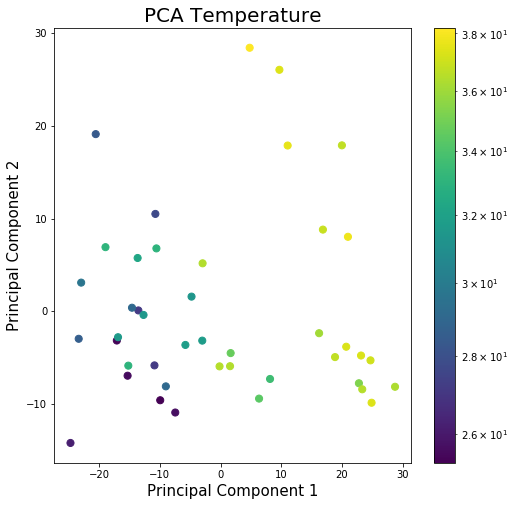

In [10]:
#CATAGORIZATION BY TEMPERATURE
finalDf_temp = pd.concat([principalDf, merged_data[['Final_Temp']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA Temperature', fontsize = 20)

plt.scatter(finalDf_temp['principal component 1']
            , finalDf_temp['principal component 2']
            , c = finalDf_temp['Final_Temp']
            , s = 50
            , cmap = 'viridis'
            , norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

### Fig 4
We can see there is a clear grouping of temperature with sicker mice (lower temps) towards left and healthier mice (higher temps) towards the right 

# Identifying pathways of interest
## Summarize metabolite-level statistics (Method 1: Multiple t-tests between 2 groups)

In [11]:
#Feed in the metabolite name (make sure it is in the same order as the Temperature in merged_data)
def metab_vals(merged_data, metab_def, metabolite, temp_thresh = 36):
    from scipy import stats
    # merged_data is a dataframe that includes all of the metabolite concentrations and
    # temperatures for each mouse, along with other clinical features
    # metab_def is a dataframe that contains the Chemical IDs, pathways, and
    # biochemical names of each of the 917 metabolite 
    # metabolite (string) is the individual metabolite of interest
    # temp_thresh (float) is the temperature cut off for the "high temperature" and "low temperature" groups
    
    #The desired out put is a dataframe with a single row containing the metabolite's name, Absolute value of the 
    #pearsonr value, the pearson r p-value, the t-statistic, the t-test p-value, and the SNR score
    
    #Find the metabolite's Chemical ID
    metab_chemID = "X" + str(metab_def.loc[metab_def['BIOCHEMICAL'] == metabolite, "CHEMICAL ID"].values[0])
    #print(metab_chemID)
    # Create dataframe with chosen metabolite and temperature
    metabolite_df = pd.DataFrame(data={'Concentration': merged_data[metab_chemID].values,
                                       'Temperature': merged_data['Final_Temp']
    })
    temp_high = metabolite_df[metabolite_df['Temperature'] > temp_thresh]
    temp_low = metabolite_df[metabolite_df['Temperature'] <= temp_thresh]
#     print(temp_high)
    corr = stats.pearsonr(metabolite_df['Temperature'], metabolite_df['Concentration'])
   #print(corr)
    [t_stats, p_values] = stats.ttest_ind(temp_low.Concentration,temp_high.Concentration)
    #print(p_values)
    #print(t_stats)
    SNR = (temp_high.Concentration.mean() - temp_low.Concentration.mean()) / (temp_high.Concentration.std() + temp_low.Concentration.std())
    #print(SNR)
    metab_val_df = pd.DataFrame(data={
        "Metabolite": metabolite,
        "Absolute Value of R": abs(corr[0]),
        "R-value":corr[0],
        "Pearson R p-value": corr[1],
        "T-statistic": t_stats,
        "T-test p-value": p_values,
        "SNR": SNR  
    }, index=[0])
    return(metab_val_df)

# example
print(metab_vals(merged_data, metab_def,'(14 or 15)-methylpalmitate (a17:0 or i17:0)', 36))

#########
#Creating Pathway-level function 
def path_vals(merged_data, metab_def, pathway, temp_thresh = 36, p_val = 0.1):
    from scipy import stats
    # merged_data is a dataframe that includes all of the metabolite concentrations
    # and temperatures for each mouse, along with other clinical features
    # metab_def is a dataframe that contains the Chemical IDs, pathways, and
    # biochemical names of each of the 917 metabolite 
    # pathway (string) is the name of the individual pathway of interest
    # temp_thresh (float) is the temperature cut off for the "high temperature" and "low temperature" groups
    # p_val (float) is the defined alpha-level for the enrichment scores
    
    # The desired out put is two dataframes. 
    # The first (metab_dfs) contains a dataframe of all metabolites in that pathway
    # describing the metabolites' names, Absolute values of the pearsonr values, the pearson r p-values, 
    # the t-statistics, the t-test p-values, and the SNR scores
    # The second (path_df) contains a single-row dataframe which includes the pathway's name, the mean of the 
    # aforementioned features in the first dataframe for all metabolites in that pathway(except the t-statistics and
    # t-test p-values), as well as the enrichment score for that pathway, the number of significant metabolites, and 
    # the total number of metabolites in that pathway
    
    # Identify the metabolites in the defined pathway of interest
    path_metabs = metab_def.loc[metab_def['SUB PATHWAY'] == pathway,'BIOCHEMICAL']
#     print(path_metabs)
    metab_dfs = pd.DataFrame()
    #For loop using the metabolite-level function
    for path_metab in path_metabs:
        metab_df = metab_vals(merged_data, metab_def, path_metab,temp_thresh = temp_thresh)
        metab_dfs = pd.concat([metab_df,metab_dfs])
    metab_dfs['Pathway'] = pathway
#     print(metab_dfs)    
    #Creating a single-rowed dataframe containing pathway summary data for a single pathway
    path_df =  pd.DataFrame({
        'Pathway': pathway,
        'Mean abs of R-value': metab_dfs['Absolute Value of R'].mean(),
        'Mean Pearson R p-value': metab_dfs['Pearson R p-value'].mean(),
        'Mean SNR':  metab_dfs['SNR'].mean(),
        'Mean SNR_abs': abs(metab_dfs['SNR']).mean(),
        'Enrichment Score': sum(metab_dfs['T-test p-value'] <= p_val)/ metab_dfs.shape[0],
        'Number of signif Metabolites': sum(metab_dfs['T-test p-value'] <= p_val),
        'Number of Metabolites':metab_dfs.shape[0]
    }, index=[0])
    return [path_df, metab_dfs]
demo = path_vals(merged_data, metab_def,'Fatty Acid, Branched')
print(demo[0])

###############
#Concatenating all of the data frames into a single larger dataframe 
def combine_dfs(merged_data, metab_def, temp_thresh = 36, p_val = 0.1):
    # Identify all unique sub-pathways
    pathways = metab_def['SUB PATHWAY'].unique()
    
    # Initialize results dataframes for collection
    pathway_dfs_concat = pd.DataFrame()
    metab_dfs_concat = pd.DataFrame()
    
    for pathway in pathways:
        # Iterate thru the pathways and collect pathway summary DF and metab-level DF
        pathway_df, metab_dfs = path_vals(merged_data, metab_def, pathway, temp_thresh = temp_thresh, p_val = p_val)
        
        #concatenate the pathway data frames and metab-level DFs 
        pathway_dfs_concat = pd.concat([pathway_dfs_concat, pathway_df])
        metab_dfs_concat = pd.concat([metab_dfs_concat, metab_dfs])
    # Reset index of both collection DFs
    pathway_dfs_concat.reset_index(inplace=True, drop=True)
    metab_dfs_concat.reset_index(inplace=True, drop=True)
    return [pathway_dfs_concat, metab_dfs_concat]    

                                    Metabolite  Absolute Value of R   R-value  \
0  (14 or 15)-methylpalmitate (a17:0 or i17:0)             0.275001 -0.275001   

   Pearson R p-value  T-statistic  T-test p-value       SNR  
0           0.074301      1.03542        0.306542 -0.169964  
                Pathway  Mean abs of R-value  Mean Pearson R p-value  \
0  Fatty Acid, Branched             0.343792                0.040136   

   Mean SNR  Mean SNR_abs  Enrichment Score  Number of signif Metabolites  \
0 -0.285259      0.285259               0.5                             1   

   Number of Metabolites  
0                      2  


In [12]:
# metabs = metab_def[metab_def['SUB PATHWAY'] == 'Phosphatidylcholine (PC)']
# chemIDs = metabs['CHEMICAL ID']
# metabs


In [13]:
path_summary_df, metab_summary_df = combine_dfs(merged_data, metab_def, temp_thresh = 36, p_val = 0.1)


In [14]:
# Subset the path_summary_df to identify pathways with >10 metabolites in the pathway and
# sort by enrichment score in descending order
path_summary_df[path_summary_df['Number of Metabolites']>=9].sort_values(by='Enrichment Score', ascending=False).head(20)

Pathway  Mean abs of R-value  \
2     Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)             0.558690   
59                     Secondary Bile Acid Metabolism             0.450343   
10                                   Monoacylglycerol             0.310636   
39                             Glutathione Metabolism             0.535030   
38                          Fatty Acid, Dicarboxylate             0.516171   
37               Fatty Acid Metabolism (Acyl Glycine)             0.501754   
82                            Phospholipid Metabolism             0.463750   
41         Fructose, Mannose and Galactose Metabolism             0.529302   
12          Leucine, Isoleucine and Valine Metabolism             0.610126   
33                               Food Component/Plant             0.427154   
16             Nicotinate and Nicotinamide Metabolism             0.402870   
40                                Benzoate Metabolism             0.431081   
11                               Histidine Metabolism             0.487621   
14                                Tyrosine Metabolism             0.445461   
3                                            Chemical             0.459832   
57                               Polyamine Metabolism             0.483214   
55  Fatty Acid Metabolism (Acyl Carnitine, Monouns...             0.446716   
68                                          Dipeptide             0.356844   
44           Glycine, Serine and Threonine Metabolism             0.437360   
6   Glycolysis, Gluconeogenesis, and Pyruvate Meta...             0.461254   

    Mean Pearson R p-value  Mean SNR  Mean SNR_abs  Enrichment Score  \
2                 0.004810 -0.898264      0.898264          1.000000   
59                0.011677  0.610245      0.610245          1.000000   
10                0.104035  0.453989      0.456690          0.947368   
39                0.034642  0.106718      0.748461          0.923077   
38                0.036979 -0.669605      0.751729          0.920000   
37                0.025218 -0.460165      0.686155          0.909091   
82                0.171115  0.310318      0.615723          0.900000   
41                0.038747  0.605233      0.660723          0.888889   
12                0.027075 -0.523197      0.809627          0.866667   
33                0.093912  0.496170      0.612554          0.852941   
16                0.125586 -0.060933      0.525074          0.818182   
40                0.058022  0.242585      0.622159          0.818182   
11                0.071245 -0.352770      0.627084          0.800000   
14                0.055099  0.074300      0.600419          0.800000   
3                 0.072207 -0.101249      0.578441          0.785714   
57                0.099615 -0.656041      0.656041          0.777778   
55                0.101014 -0.427671      0.577989          0.777778   
68                0.154879 -0.247770      0.429181          0.769231   
44                0.135879 -0.319241      0.585478          0.750000   
6                 0.026824  0.457614      0.538185          0.727273   

    Number of signif Metabolites  Number of Metabolites  
2                              9                      9  
59                            10                     10  
10                            18                     19  
39                            12                     13  
38                            23                     25  
37                            10                     11  
82                             9                     10  
41                             8                      9  
12                            26                     30  
33                            29                     34  
16                             9                     11  
40                             9                     11  
11                            16                     20  
14                             8                     10  
3                       

## Summarize metabolite-level statistics (Method 2: GSEA)
We wish to perform a pathway-level analysis analogous to the GSEA performed by Subramanian and Mootha in their original PNAS paper. It uses the following steps:

1. Given there are 2 distinct phenotypes (in our case, "healthy" and "sick" mice), compute the SNR of each metabolite and sort them in descending order from most positive to most negative
2. For a metabolite pathway/set you would like to test, walk along  your sorted metabolite list. If you come across a metabolite in your pathway, increase you score by 1. If not, decrease your score by 1.
3. Record the maximum deviation as your "observed" enrichment score. Normalize the enrichment score by dividing by the number of metabolites in that pathway.
4. We need to compare your observed against a null distribution of enrichment scores. So, a) shuffle/permute your phenotype labels and b) repeat steps 1-3 for a total of 1000 times to create a null distribution
5. Compare your observed enrichment against the null for a p-value.

In [15]:
def get_metabolites_temp(merged_df):
    # given the merged_df with both clinical info and metabolites
    # split the dataframe into each
    metab_cols = [col for col in merged_df.columns if 'X' in col]
    df_metabolites = merged_df[metab_cols]
    Final_temps = merged_df['Final_Temp']
    return [df_metabolites, np.array(Final_temps)]

def compute_SNR(df_metabolites, finalTemps, temp_thresh=36):
    # when given the dataframe containing metabolites
    # and the final Temps along with the temp_threshold,
    # compute the SNR value by first identifying mice above/below
    # temp threshold and then computing the SNR values accordingly.
    # Output a ranked list of metabolites by SNR in descending order
    # that has the chemical ID as an index.
    
    # Binarize the temperature into the phenotype. Let "healthy" mice
    # be index 1 and "sick" mice be index 2
    idx_1, idx_2 = np.where(finalTemps>=temp_thresh)[0], np.where(finalTemps<temp_thresh)[0]
    
    # compute the mean, std for the SNR analysis of each metabolite
    mean_1 = df_metabolites.iloc[idx_1,:].mean(axis=0)
    sd_1 = df_metabolites.iloc[idx_1,:].std(axis=0)
    mean_2 = df_metabolites.iloc[idx_2,:].mean(axis=0)
    sd_2 = df_metabolites.iloc[idx_2,:].std(axis=0)
    SNR = (mean_2 - mean_1)/(sd_1+sd_2)
#     print(SNR.shape)
#     SNR = SNR.sort_values(ascending=False)
    return SNR

def merge_SNR_metabDefDF(SNR, metab_def):
    metab_def2 = metab_def
    # convert SNR index into chemIDs by omitting X
    SNR.index = [s.replace('X','') for s in SNR.index.values]
    # Assemble SNR into a dataframe to merge with the metab_def dataframe
    df_SNR = pd.DataFrame(SNR).reset_index()
    df_SNR.columns = ['CHEMICAL ID','SNR']
    df_SNR['CHEMICAL ID']=df_SNR['CHEMICAL ID'].astype(int)
#     print(df_SNR.head())

    # merge the SNR dataframe with metab_def dataframe on the 
    # chemical ID column, thus adding the SNR values to the 
    # metab_def DF.
    SNR_df = metab_def2.merge(df_SNR,on='CHEMICAL ID',how='left')
    SNR_df = SNR_df.sort_values(by='SNR',ascending=False)
    SNR_df = SNR_df.reset_index()
    return SNR_df
    

def calculate_observed_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36):
    # generate an output dataframe containing metabolite/pathway info 
    # and SNR value for a defined temp threshold
    
    # get SNR of metabolites in sorted list with chemID as index
    SNR = compute_SNR(df_metabolites, finalTemps, temp_thresh=36)
    # Assemble the SNR dataframe with the metab_def dataframes
    metab_def2 = metab_def
    SNR_df = merge_SNR_metabDefDF(SNR, metab_def2)
    
    return SNR_df

def shuffle_along_axis(a, axis):
    idx = np.random.rand(*a.shape).argsort(axis=axis)
    return np.take_along_axis(a,idx,axis=axis)


def calculate_null_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36,
                      null_trials=1000):
    # Randomly shuffle finalTemps
    finalTemps_null = np.tile(finalTemps, (null_trials,1))
    finalTemps_null = shuffle_along_axis(finalTemps_null, axis=1)
    
    # initialize collection of null SNR_df
    null_SNR_DFs = list()
    for row in range(null_trials):
        # get SNR of metabolites in sorted list with chemID as index
        SNR = compute_SNR(df_metabolites, finalTemps_null[row,:], temp_thresh=36)

        # Assemble the SNR dataframe with the metab_def dataframes
        metab_def2 = metab_def
        SNR_df = merge_SNR_metabDefDF(SNR, metab_def2)
        
        # append dataframe to the null list
        null_SNR_DFs.append(SNR_df)
    
    return null_SNR_DFs

def get_pathwayNames_numMetabs(metab_def,min_numMetabs=10):
    # return the names of the sub-pathways that have at least
    # the specified number of metabolites from min_numMetabs
    
    # First get unique pathway names and counts
    unique_paths = pd.value_counts(metab_def['SUB PATHWAY'])
    unique_pathNames = unique_paths.index.values
    SelectedPath_Names = unique_pathNames[unique_paths>min_numMetabs]
    SelectedPath_Vals = unique_paths[unique_paths>min_numMetabs].values
    df_Paths = pd.DataFrame({'Pathway':SelectedPath_Names,
                            'Num_Metabs': SelectedPath_Vals})
    return df_Paths

def compute_NES(df_SNR, pathwayName, numMetabs):
    # Begin by computing the NES for the given SNR. We do this by first creating 
    # a vector the length of the metabolites. If the metabolite is in pathway, we add 1.
    # If not in pathway, we have to decrease by an increment. Knowing the number of metabolites
    # in a pathway, we can create a normalization scheme such that we reach 0 by the time
    # we are done iterating thru all the metabolites. For example, if we had 20 genes in a 
    # metabolite set and we are increasing them by 1, we will decrease by 20/(917-20) where
    # 917 is the total number of metabolites. Thus, the generealized formula is 
    # (# of metabolites in pathway)/ (total # of metabolites - # of metabolites in pathway)
    
    # Then, take cumulative sum and record it. Take max. absolute value, divide by 
    # number of metabolites in the pathway, and record as NES.
    
    # initialize results array with the decrease increment
    array_ranked = np.full((df_SNR.shape[0]),-numMetabs/(df_SNR.shape[0]-numMetabs))
#     print(array_ranked.shape)
    # Identify metabolite indices that belong to pathway
    idx = df_SNR[df_SNR['SUB PATHWAY']==pathwayName].index.values
    # Change the metabolites to be +1 if in that pathway
    array_ranked[idx] = 1
    # obtain cumulative sum
    array_enrichment = np.cumsum(array_ranked)
    # compute NES
    NES = max(abs(array_enrichment)) / numMetabs
    return [array_enrichment, NES]
    

def compute_enrichment_pathway(df_SNR_obs, list_df_SNR_null, pathwayName, numMetabs):
    # For given pathway, compute 1) observed NES, 2) the null distribution of NES,
    # 3) the p-value. 
    
    # compute observed NES
    [enrichArr_obs, NES_obs] = compute_NES(df_SNR_obs, pathwayName, numMetabs)
    
    # compute NES values for null distribution
    null_NES = np.zeros((len(list_df_SNR_null)))
    for i in range(len(list_df_SNR_null)):
        [arr,null_NES[i]] = compute_NES(list_df_SNR_null[i], pathwayName, numMetabs)
        
    # Calculate the percentile of the observed NES given the null distribution
    percentileVal = np.percentile(null_NES, NES_obs)
    # Translate this to a p-value
    p_val = min([percentileVal/100, 1-(percentileVal/100)])

    return [enrichArr_obs, NES_obs, p_val]

def perform_GSEA(df_SNR_obs, list_df_SNR_null, metab_def, min_numMetabs=10, want_plots = 0):
    # Take in the observed SNR df, the null distributions, the metabolite definitions
    # df, and the specified minimum # of metabolites per pathway for the analysis.
    # Output a 1) summary dataframe containing the NES and p-value of the pathway
    # and 2) a plot of the pathway
    
    df_Paths = get_pathwayNames_numMetabs(metab_def,min_numMetabs)
    
    # Iterate through each of the pathways
    results_NES_obs = []
    results_pVals = []
    for i in range(df_Paths.shape[0]):
        # Define pathway
        pathName, numMetabs = df_Paths.loc[i,:]
        # print([pathName, numMetabs])
        
        # get out the enrichment array and the associated p-value. Record in results arrays
        [array_enriched,NES_obs, pVal] = compute_enrichment_pathway(df_SNR_obs, list_df_SNR_null, pathName, numMetabs)
        results_NES_obs.append(NES_obs)
        results_pVals.append(pVal)
        
        # Begin plotting
        if want_plots == 1:
            fig, ax = plt.subplots()
            plt.plot(range(len(array_enriched)),array_enriched)
            plt.hlines(0,xmin=0, xmax=916,linestyles='--',color='k')
            plt.xlabel('Metabolite Index (Enriched in Sick to Enriched in Healthy)')
            plt.ylabel('Running Enrichment Score')
            plt.title(pathName + '\n NES = {} (p = {:.3e})'.format(round(NES_obs,4), pVal))
            plt.tight_layout()
            plt.show()

    # Assemble output summary dataframe
    df_gsea = pd.DataFrame({'Pathway':df_Paths.Pathway,
                           'Num_Metabs':df_Paths.Num_Metabs,
                           'NES':results_NES_obs,
                           'p-value':results_pVals})
    return df_gsea
        
        

In [16]:
metab_def.head()

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0               1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1               1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2               4283                     (3'-5')-adenylylcytidine   
3               4288                   (3'-5')-cytidylylcytidine*   
4               1919                (R)-3-hydroxybutyrylcarnitine   

  SUPER PATHWAY                                      SUB PATHWAY  COMP ID  \
0         Lipid                             Fatty Acid, Branched    38768   
1         Lipid                             Fatty Acid, Branched    38296   
2    Nucleotide                                     Dinucleotide    52753   
3    Nucleotide                                     Dinucleotide    62397   
4         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   

          PLATFORM  CHEMICAL ID      RI      MASS         HMDB        PUBCHEM  
0        LC/MS Neg    100002945  5695.0  269.2487  HMDB0061859  8181;17903417  
1        LC/MS Neg    100002356  5993.0  297.2799  HMDB0037397        3083779  
2        LC/MS Neg    100009062  1920.0  571.1308          NaN       10875494  
3        LC/MS Neg    100020727  1472.0  547.1195          NaN          94237  
4  LC/MS Pos Early    100003926  2400.0  248.1493  HMDB0013127       53481617

In [17]:
# split merged data to get metabolite DF and finalTemps list
df_metabolites, finalTemps = get_metabolites_temp(merged_data)

In [18]:
# Calculate the observed and null SNR values and return their respective dataframes
SNR_df_obs = calculate_observed_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36)
list_nullSNR_DFs = calculate_null_SNR(df_metabolites, finalTemps, metab_def, temp_thresh=36,
                      null_trials=1000)


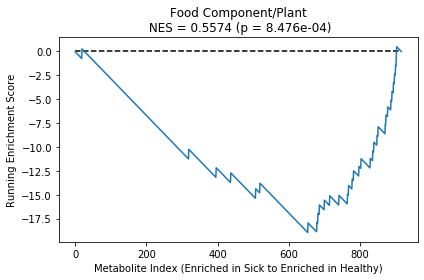

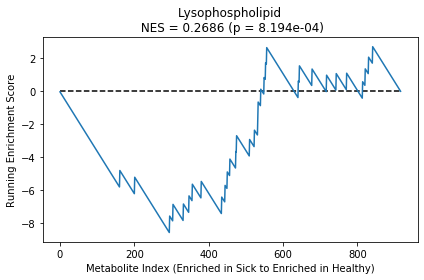

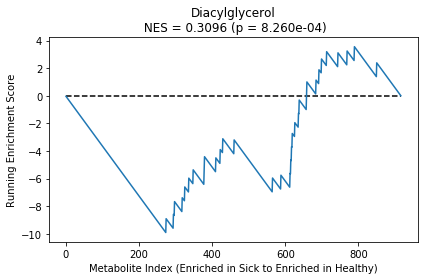

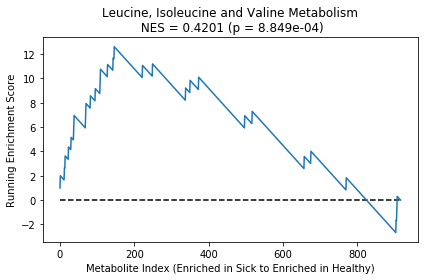

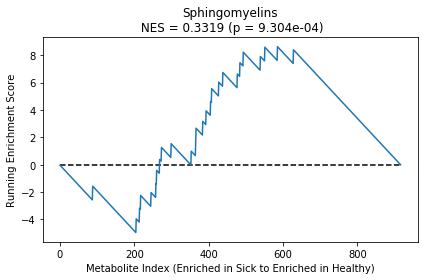

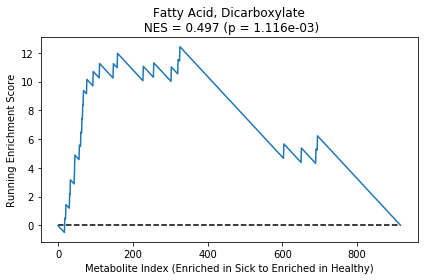

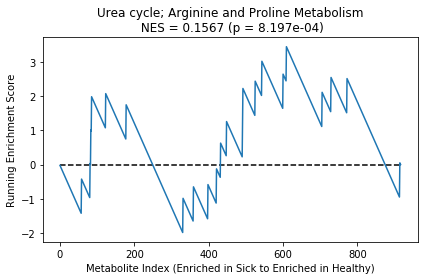

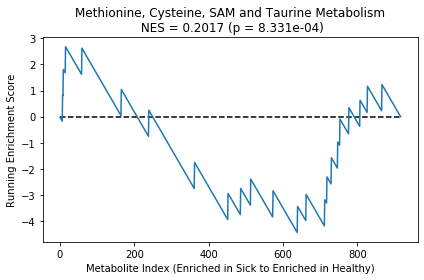

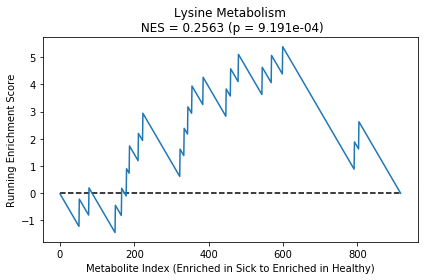

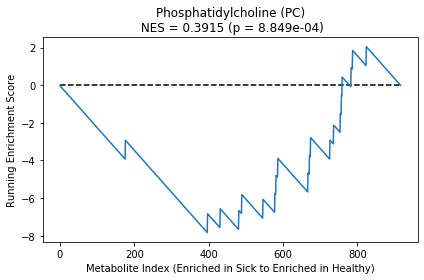

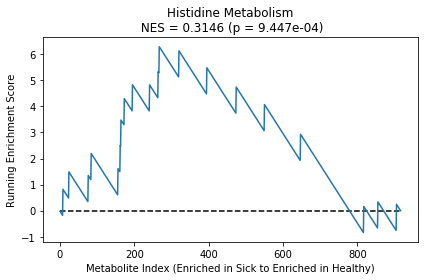

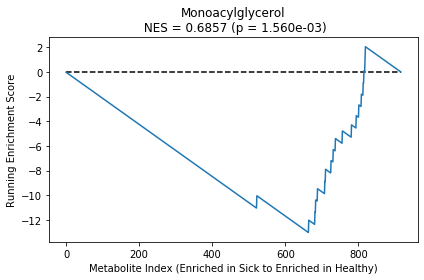

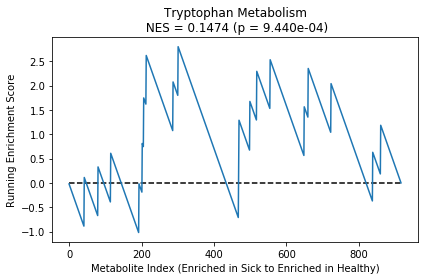

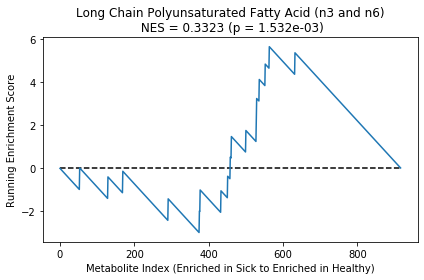

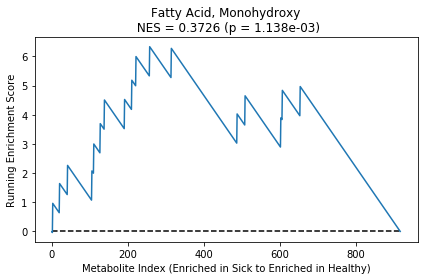

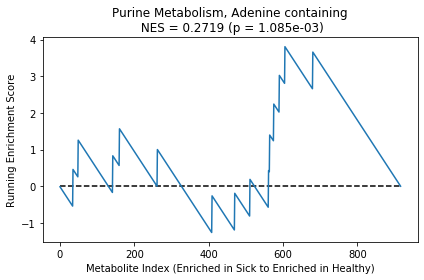

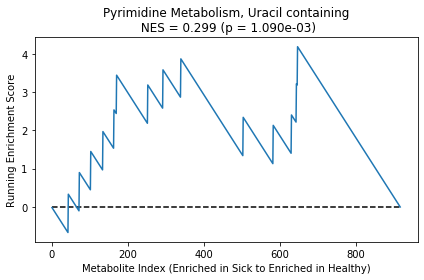

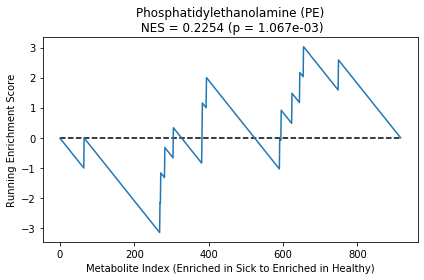

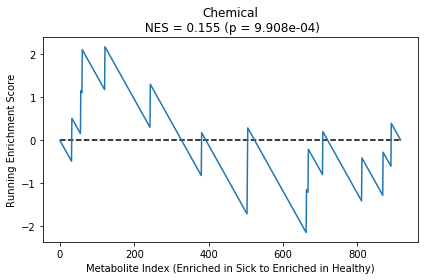

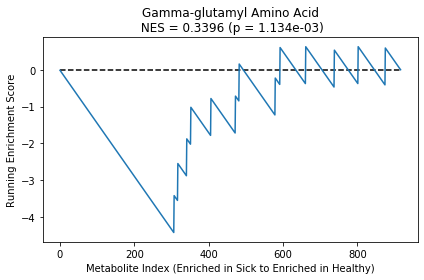

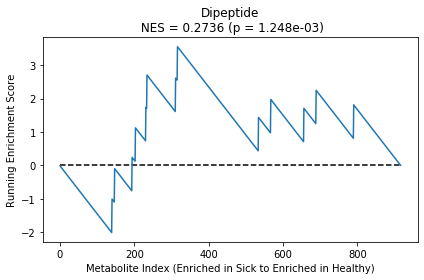

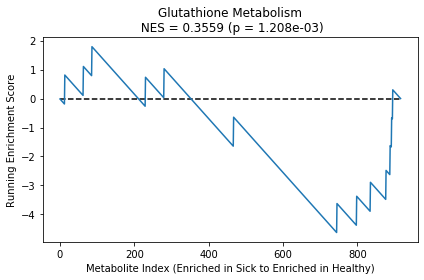

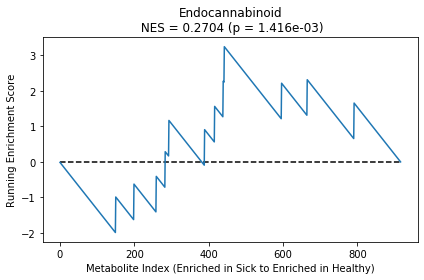

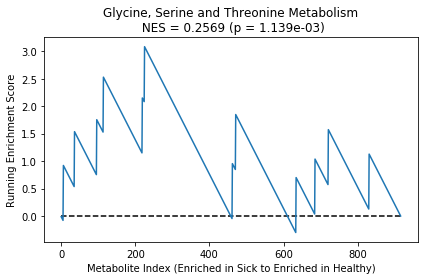

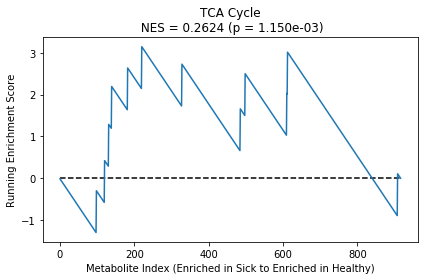

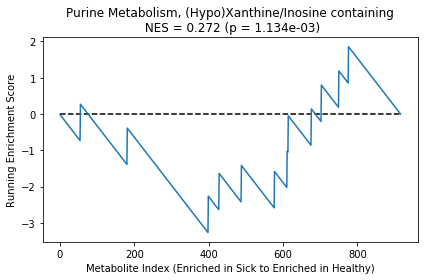

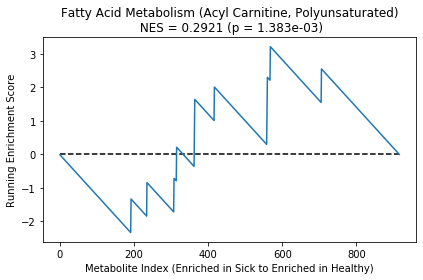

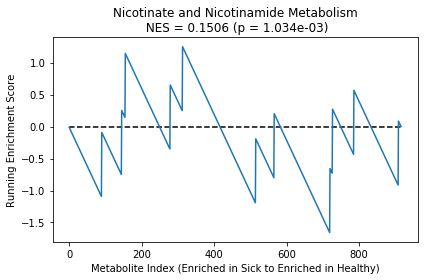

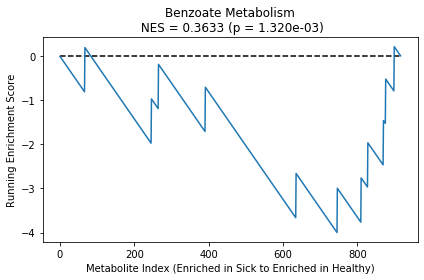

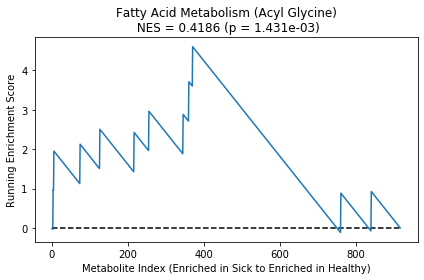

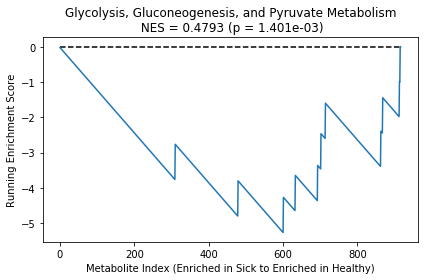

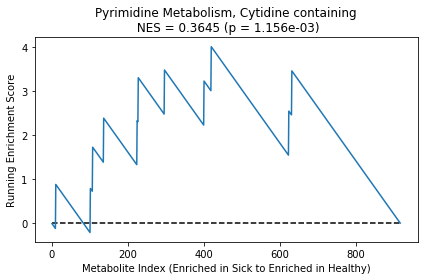

In [19]:
df_gsea = perform_GSEA(SNR_df_obs, list_nullSNR_DFs, metab_def, 10, 1)

In [20]:
df_gsea.sort_values(by='NES',ascending=False)

Pathway  Num_Metabs       NES  \
11                                   Monoacylglycerol          19  0.685676   
0                                Food Component/Plant          34  0.557391   
5                           Fatty Acid, Dicarboxylate          25  0.496951   
30  Glycolysis, Gluconeogenesis, and Pyruvate Meta...          11  0.479330   
3           Leucine, Isoleucine and Valine Metabolism          30  0.420105   
29               Fatty Acid Metabolism (Acyl Glycine)          11  0.418623   
9                            Phosphatidylcholine (PC)          20  0.391472   
14                            Fatty Acid, Monohydroxy          17  0.372614   
31         Pyrimidine Metabolism, Cytidine containing          11  0.364539   
28                                Benzoate Metabolism          11  0.363335   
21                             Glutathione Metabolism          13  0.355939   
19                          Gamma-glutamyl Amino Acid          13  0.339602   
13  Long Chain Polyunsaturated Fatty Acid (n3 and n6)          17  0.332288   
4                                      Sphingomyelins          26  0.331909   
10                               Histidine Metabolism          20  0.314604   
2                                      Diacylglycerol          32  0.309605   
16           Pyrimidine Metabolism, Uracil containing          14  0.299003   
26  Fatty Acid Metabolism (Acyl Carnitine, Polyuns...          11  0.292093   
20                                          Dipeptide          13  0.273570   
25  Purine Metabolism, (Hypo)Xanthine/Inosine cont...          12  0.272007   
15              Purine Metabolism, Adenine containing          14  0.271872   
22                                    Endocannabinoid          12  0.270442   
1                                    Lysophospholipid          32  0.268573   
24                                          TCA Cycle          12  0.262431   
23           Glycine, Serine and Threonine Metabolism          12  0.256906   
8                                   Lysine Metabolism          21  0.256324   
17                      Phosphatidylethanolamine (PE)          14  0.225360   
7    Methionine, Cysteine, SAM and Taurine Metabolism          22  0.201676   
6         Urea cycle; Arginine and Proline Metabolism          22  0.156729   
18                                           Chemical          14  0.155039   
27             Nicotinate and Nicotinamide Metabolism          11  0.150612   
12                              Tryptophan Metabolism          19  0.147404   

     p-value  
11  0.001560  
0   0.000848  
5   0.001116  
30  0.001401  
3   0.000885  
29  0.001431  
9   0.000885  
14  0.001138  
31  0.001156  
28  0.001320  
21  0.001208  
19  0.001134  
13  0.001532  
4   0.000930  
10  0.000945  
2   0.000826  
16  0.001090  
26  0.001383  
20  0.001248  
25  0.001134  
15  0.001085  
22  0.001416  
1   0.000819  
24  0.001150  
23  0.001139  
8   0.000919  
17  0.001067  
7   0.000833  
6   0.000820  
18  0.000991  
27  0.001034  
12  0.000944

## Visualizing sub-pathways

In [21]:
#Create Function that gets graphs when you input pathway name
def get_graph(merged_data, merged_feature, pathway, tempThresh = 36):
    #Defining the two groups for the SNR calculation 
    df_temp1 = merged_data[merged_data['Final_Temp']>tempThresh]
    df_temp2 = merged_data[merged_data['Final_Temp']<=tempThresh]

    # Subset dataframe into the specific pathway of interest
    metabs = merged_feature[merged_feature['SUB PATHWAY'] == pathway]
#     print(metabs)

    chemIDs = metabs['CHEMICAL ID']
    chemIDs = [str(x) for x in chemIDs]
#     print(chemIDs)
    metabs_names = list(metabs['BIOCHEMICAL'])
    # need to redefine chemIDs with the "X" in metabolon dataset
    chemIDs2 = ['X' + x for x in chemIDs]
    # define final temps
    x = merged_data['Final_Temp']
    
    for j in range(len(chemIDs2)):
        metab_ID = chemIDs2[j]
        # Get values of the metabolite levels in the mouse
        metab_level = merged_data[metab_ID]
        print(metab_level.shape)
        # Calculating the signal to noise ratio (SNR)
        mean_temp1 = df_temp1[metab_ID].mean()
        std_temp1 = df_temp1[metab_ID].std()
        mean_temp2 = df_temp2[metab_ID].mean()
        std_temp2 = df_temp2[metab_ID].std()
        SNR = abs(mean_temp2 - mean_temp1) / (std_temp2 + std_temp1)
        
        # begin plotting of metabolite level vs Temp
        plt.figure()
        plt.scatter(x, metab_level,c='k')
        plt.xlabel('Final Temperature')
        plt.ylabel('Metabolite Concentration')
        title_str = pathway + '\n' + metabs_names[j] + '\n' + 'SNR = {}'.format(round(SNR,3))
        plt.title(title_str)
        plt.show()

(43,)


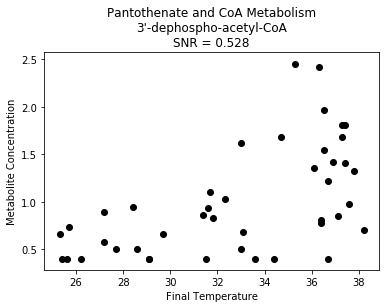

(43,)


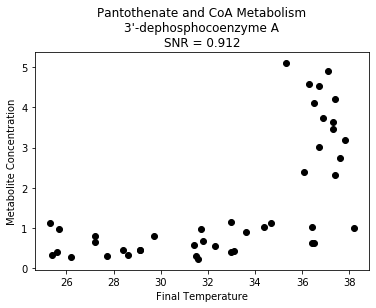

(43,)


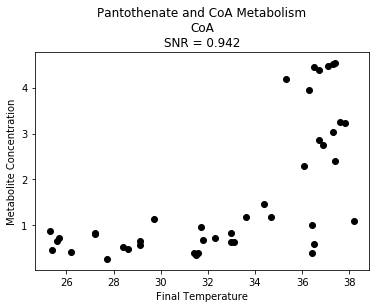

(43,)


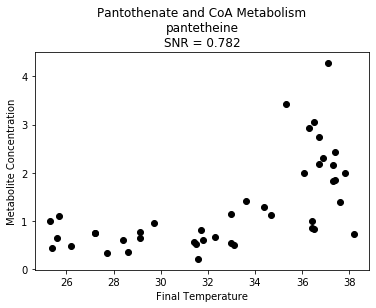

(43,)


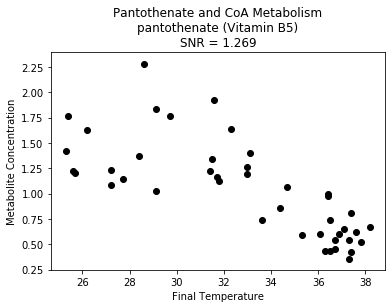

(43,)


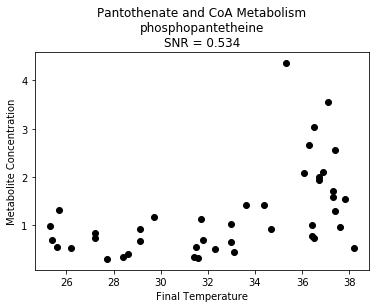

In [22]:
get_graph(merged_data, metab_def, 'Pantothenate and CoA Metabolism')

In [23]:
# get_graph(merged_data, metab_def, 'Primary Bile Acid Metabolism')

In [24]:
# get_graph(merged_data, metab_def, 'Secondary Bile Acid Metabolism')

(43,)


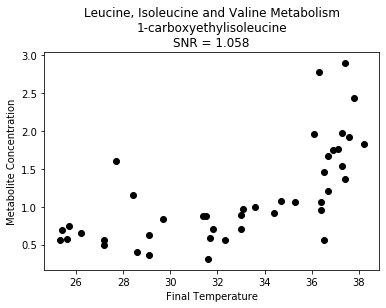

(43,)


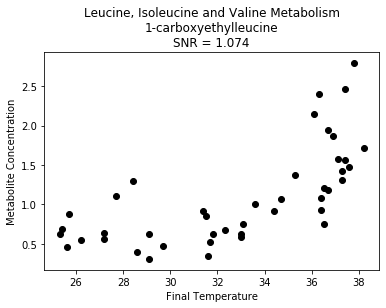

(43,)


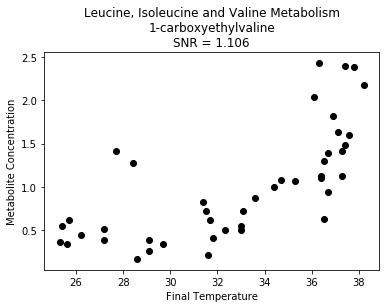

(43,)


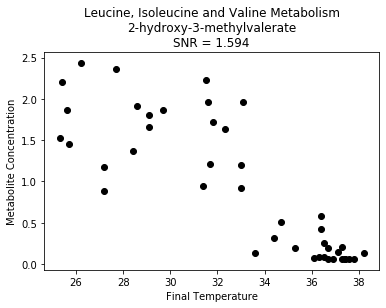

(43,)


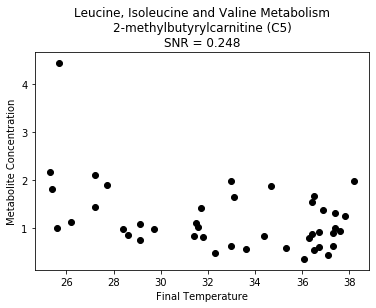

(43,)


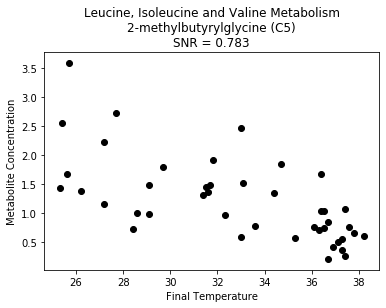

(43,)


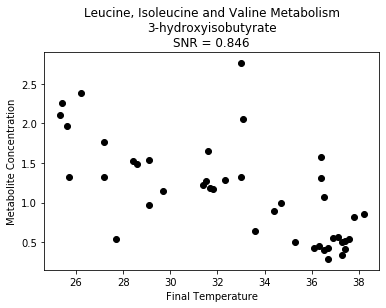

(43,)


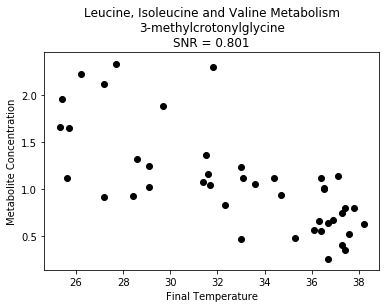

(43,)


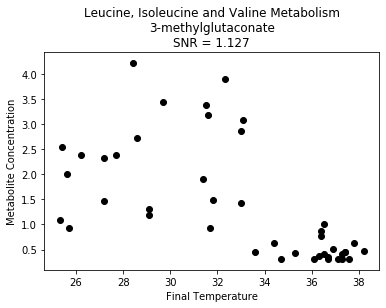

(43,)


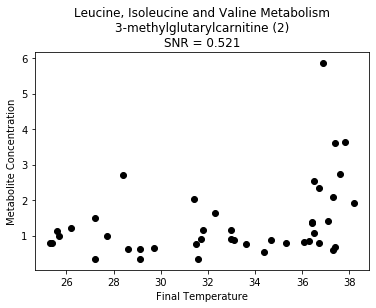

(43,)


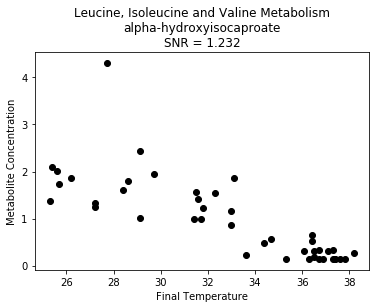

(43,)


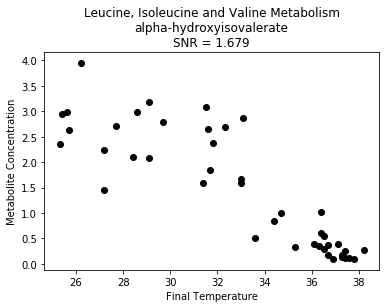

(43,)


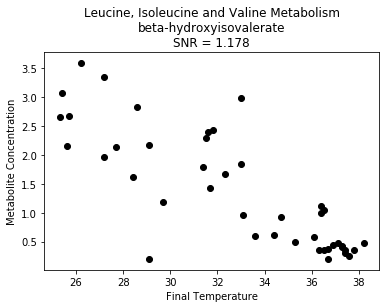

(43,)


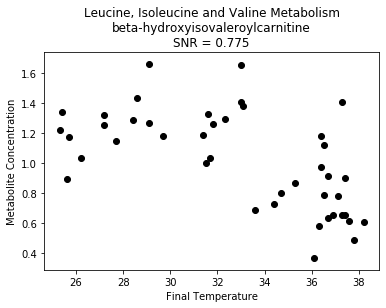

(43,)


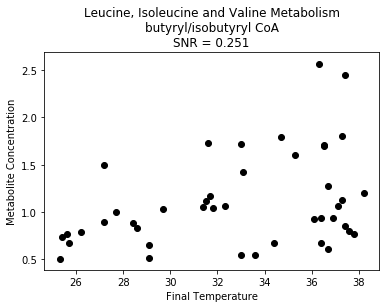

(43,)


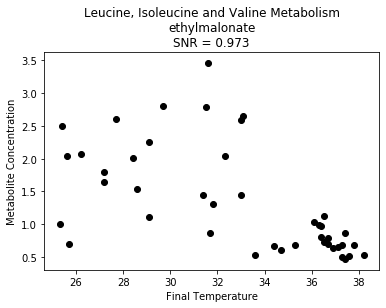

(43,)


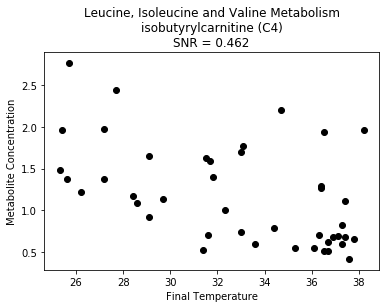

(43,)


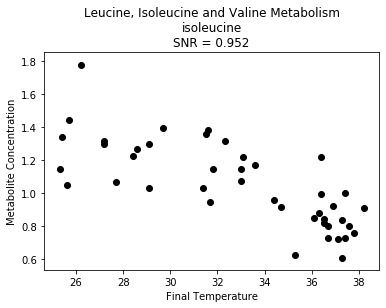

(43,)


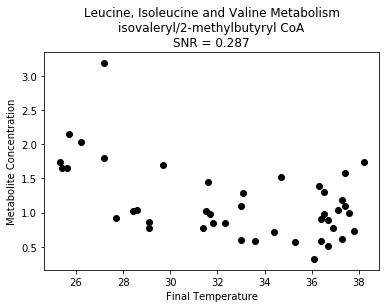

(43,)


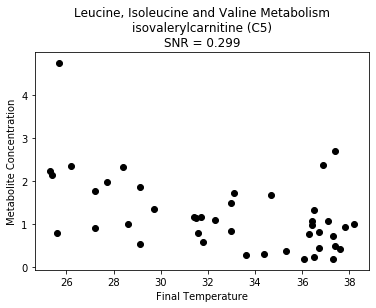

(43,)


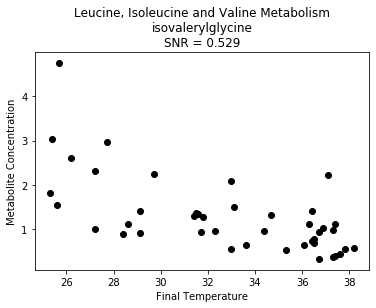

(43,)


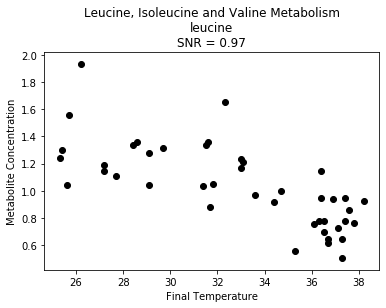

(43,)


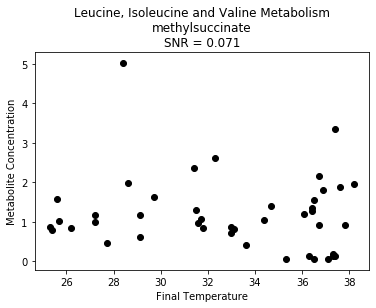

(43,)


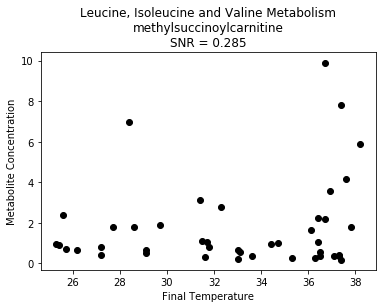

(43,)


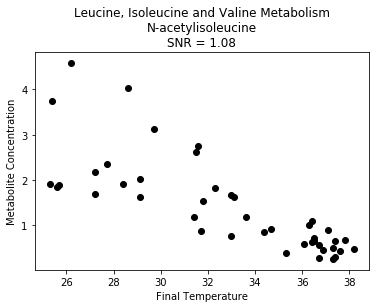

(43,)


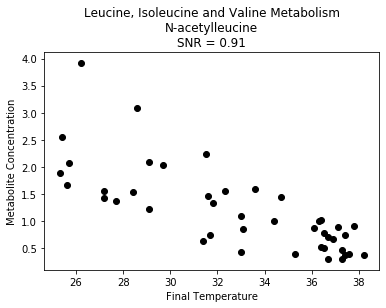

(43,)


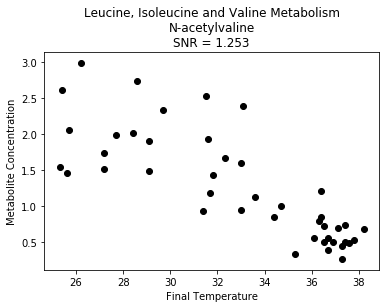

(43,)


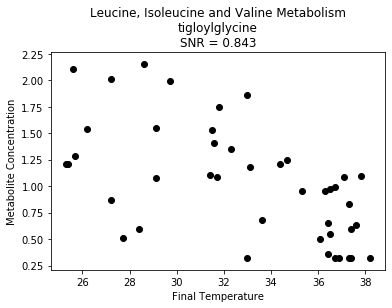

(43,)


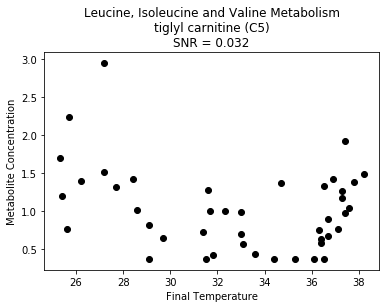

(43,)


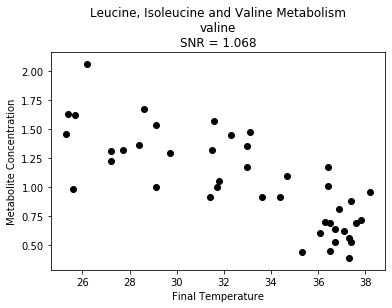

In [25]:
get_graph(merged_data, metab_def, 'Leucine, Isoleucine and Valine Metabolism')

(43,)


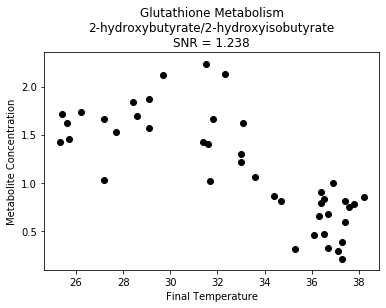

(43,)


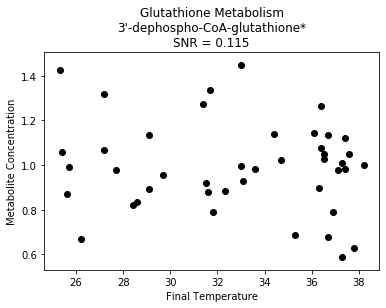

(43,)


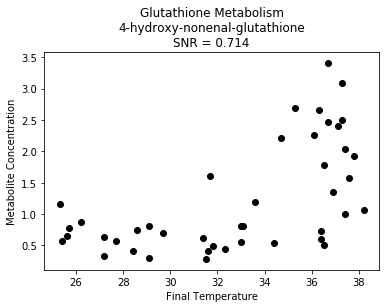

(43,)


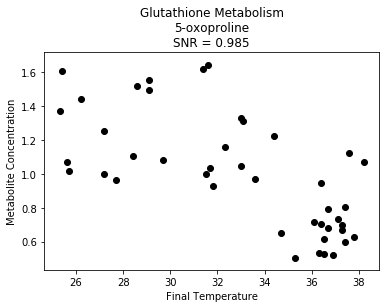

(43,)


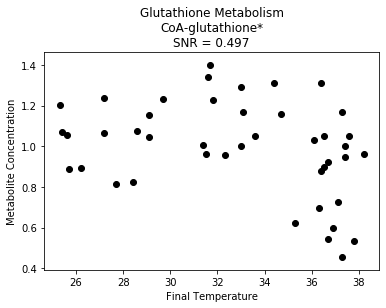

(43,)


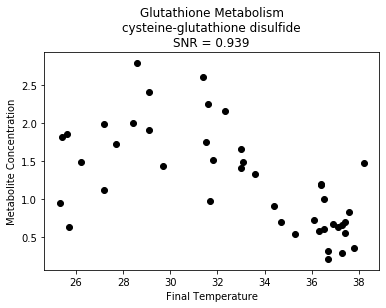

(43,)


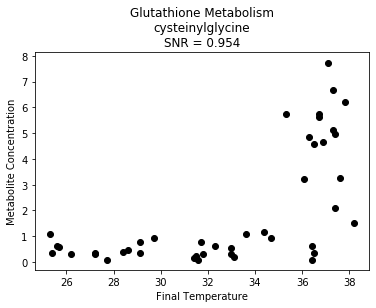

(43,)


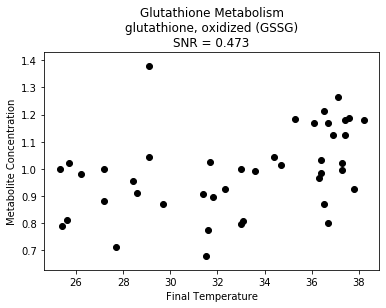

(43,)


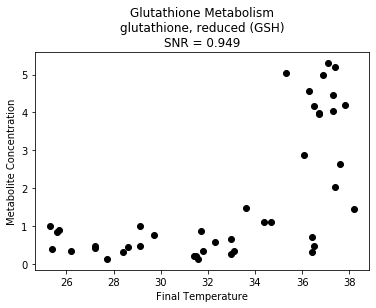

(43,)


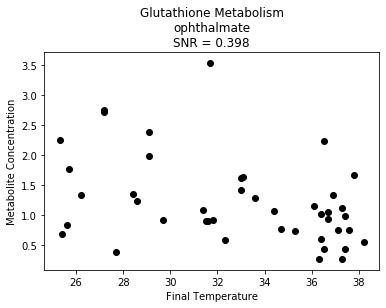

(43,)


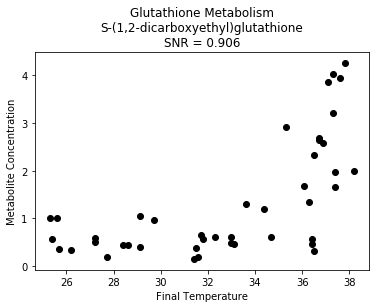

(43,)


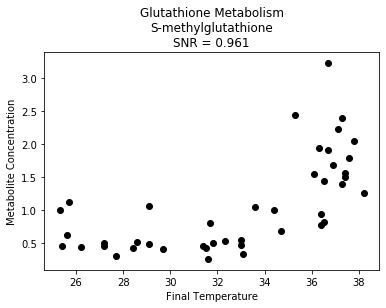

(43,)


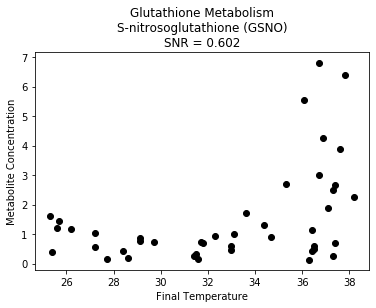

In [26]:
get_graph(merged_data, metab_def, 'Glutathione Metabolism')

(43,)


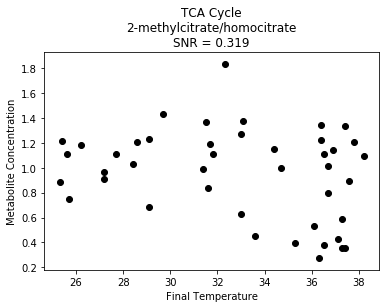

(43,)


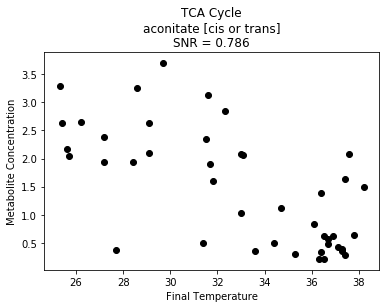

(43,)


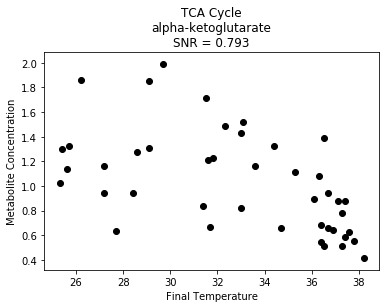

(43,)


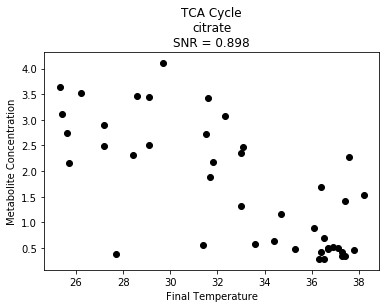

(43,)


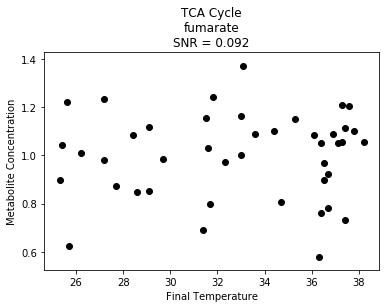

(43,)


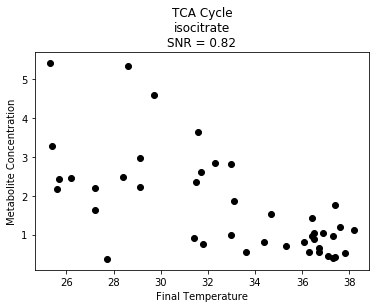

(43,)


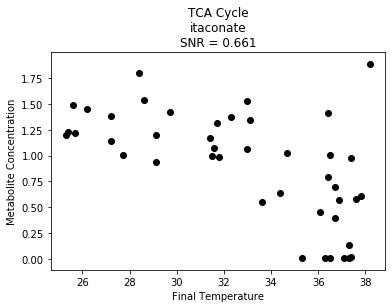

(43,)


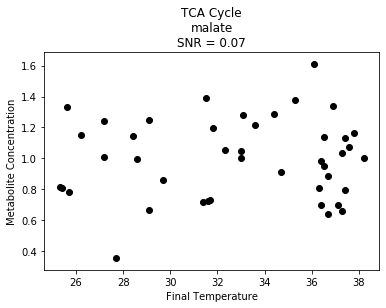

(43,)


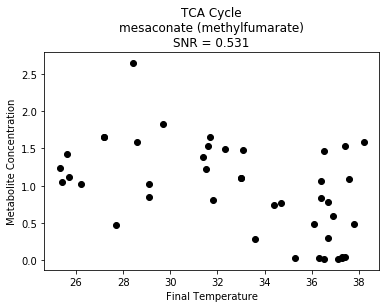

(43,)


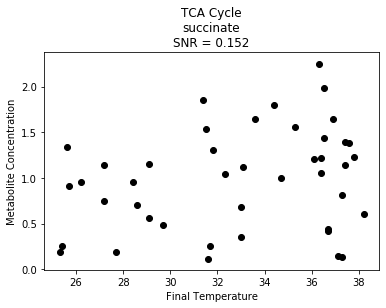

(43,)


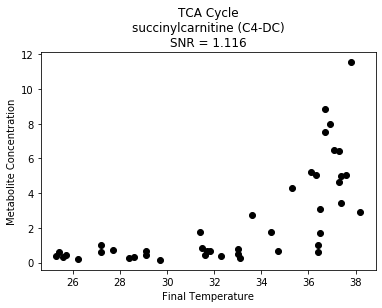

(43,)


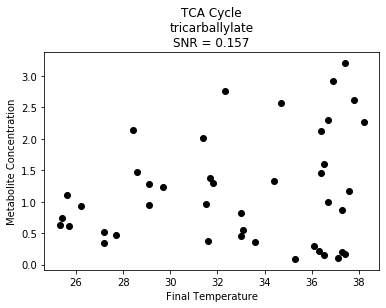

In [27]:
get_graph(merged_data, metab_def, 'TCA Cycle')

(43,)


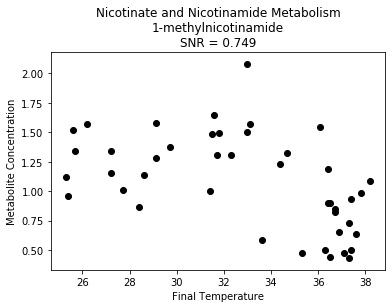

(43,)


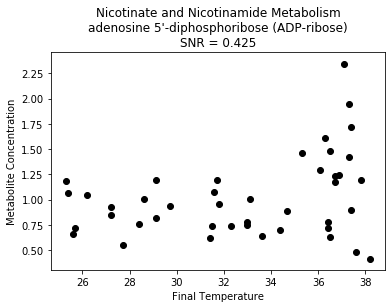

(43,)


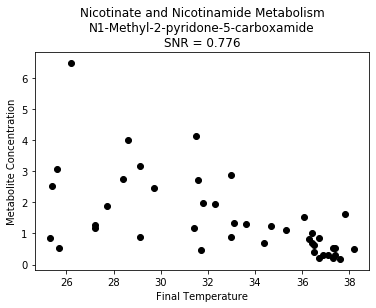

(43,)


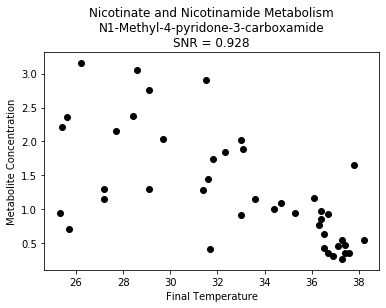

(43,)


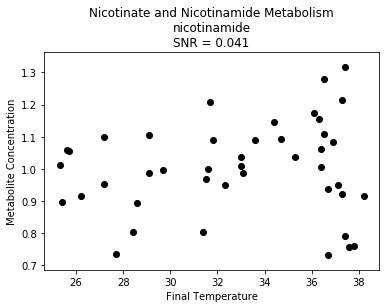

(43,)


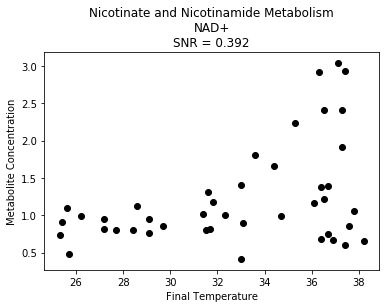

(43,)


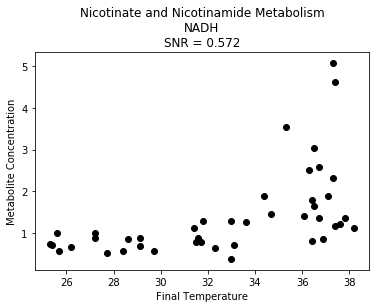

(43,)


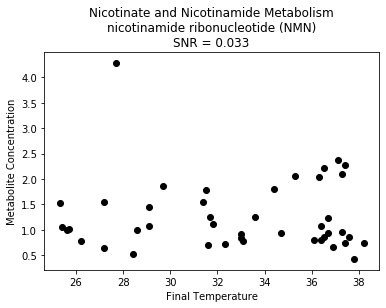

(43,)


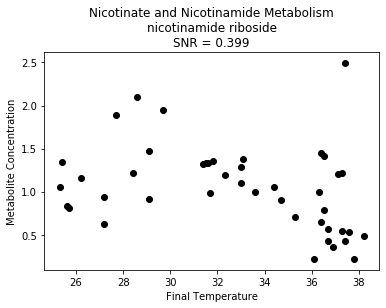

(43,)


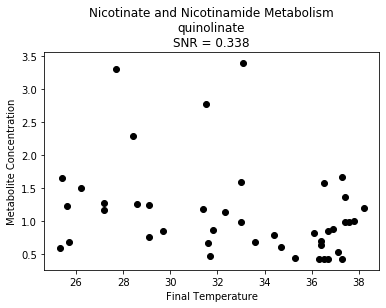

(43,)


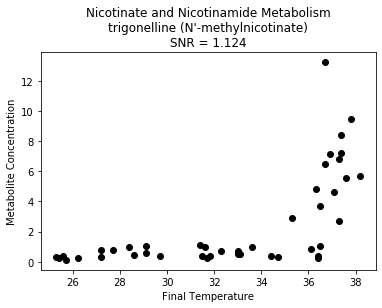

In [28]:
get_graph(merged_data, metab_def, 'Nicotinate and Nicotinamide Metabolism')

(43,)


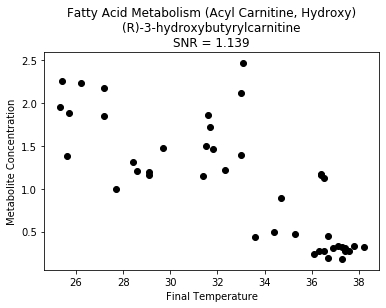

(43,)


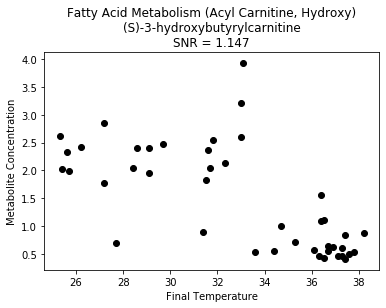

(43,)


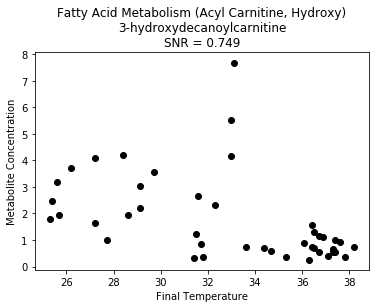

(43,)


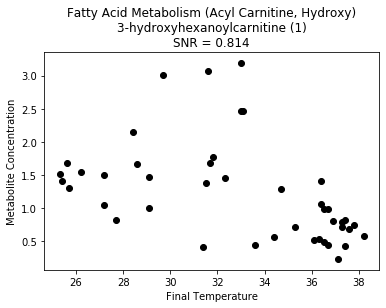

(43,)


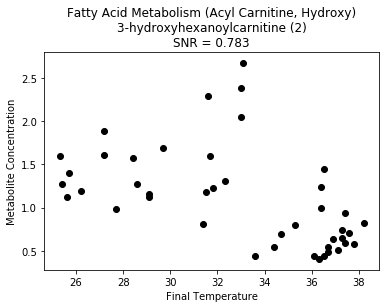

(43,)


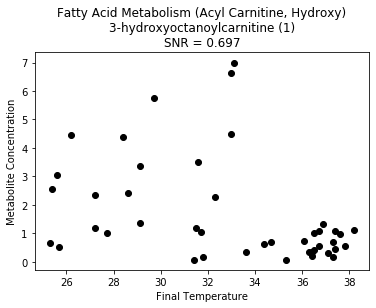

(43,)


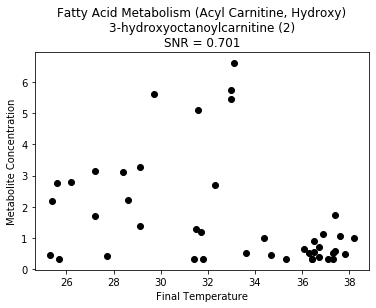

(43,)


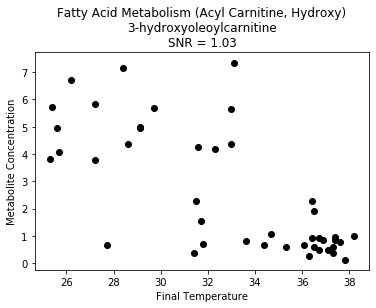

(43,)


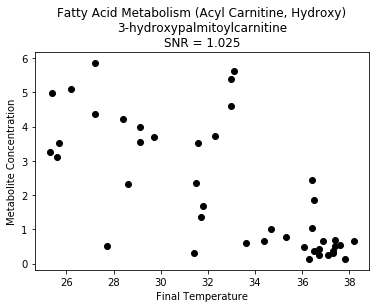

In [29]:
get_graph(merged_data, metab_def, 'Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)')

(43,)


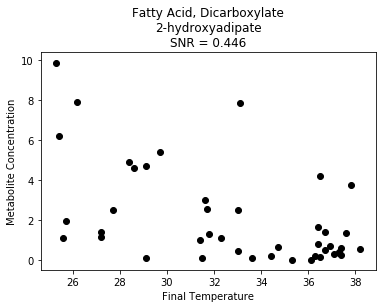

(43,)


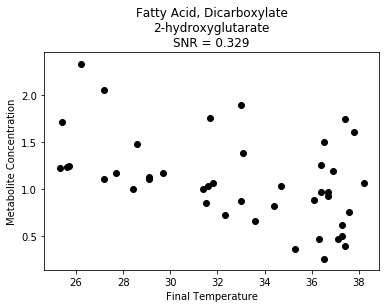

(43,)


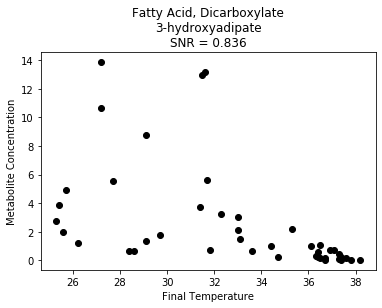

(43,)


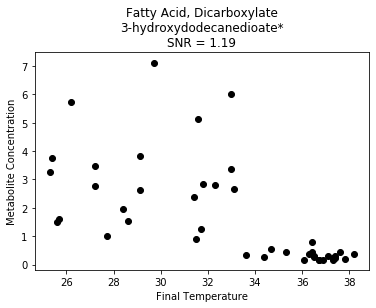

(43,)


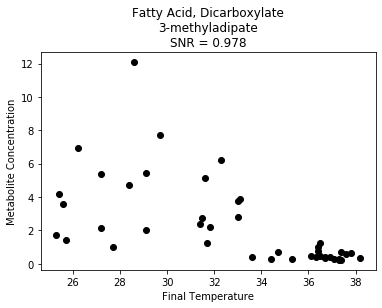

(43,)


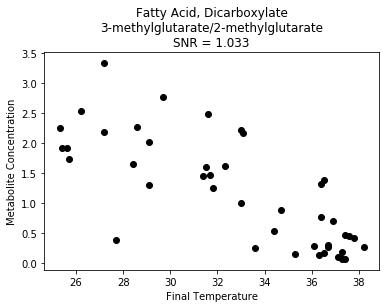

(43,)


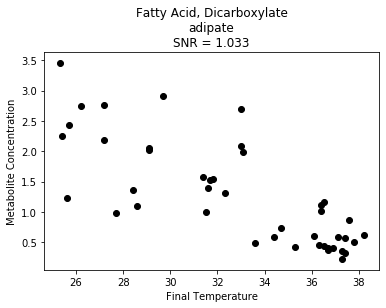

(43,)


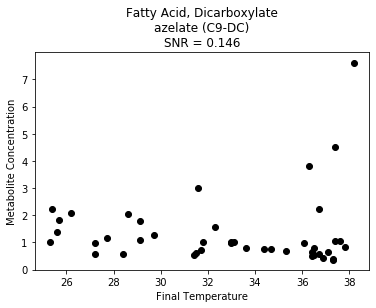

(43,)


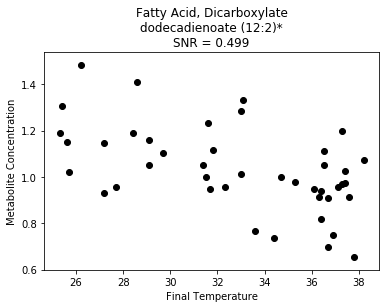

(43,)


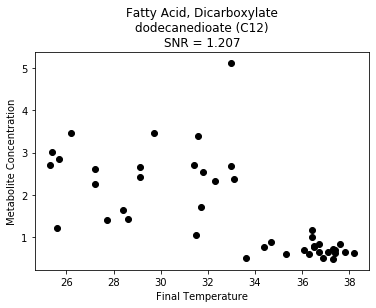

(43,)


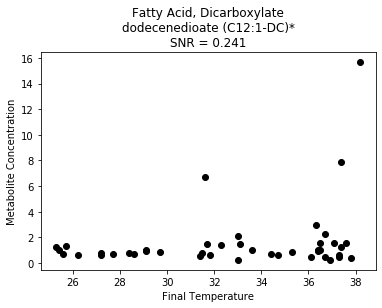

(43,)


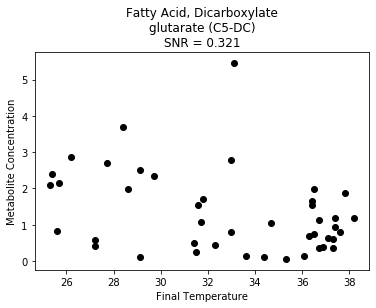

(43,)


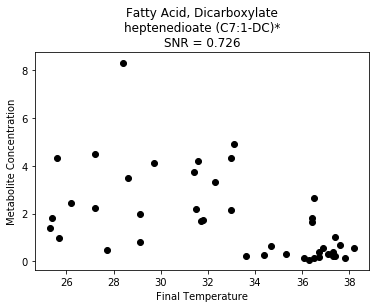

(43,)


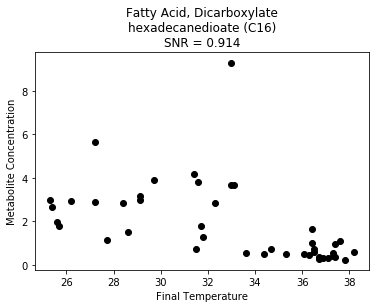

(43,)


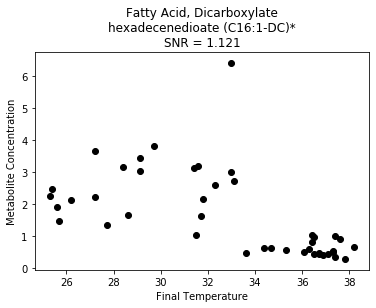

(43,)


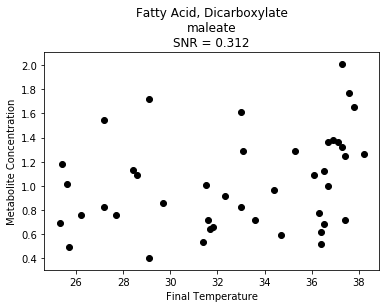

(43,)


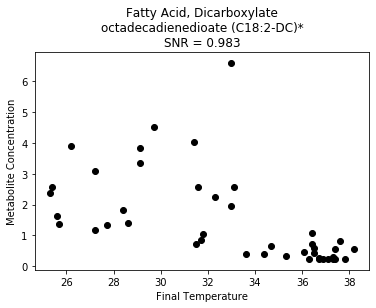

(43,)


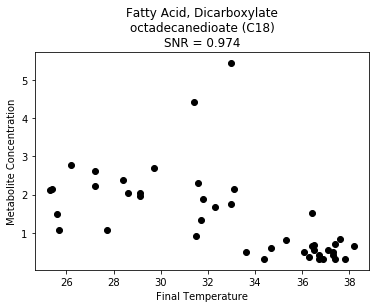

(43,)


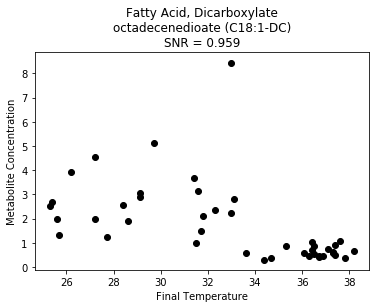

(43,)


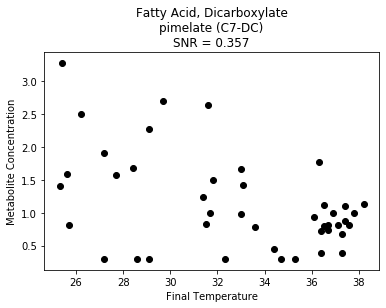

(43,)


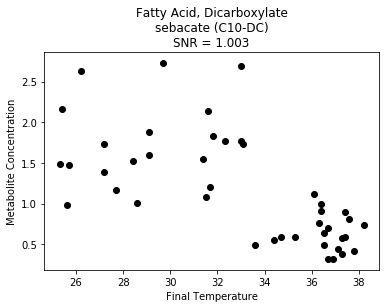

(43,)


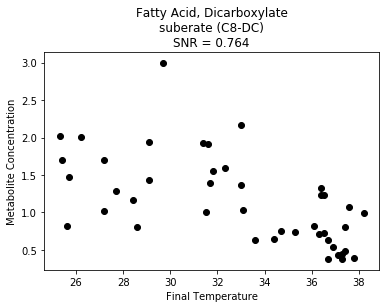

(43,)


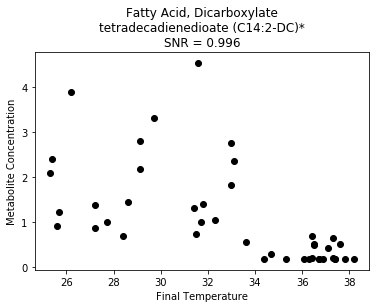

(43,)


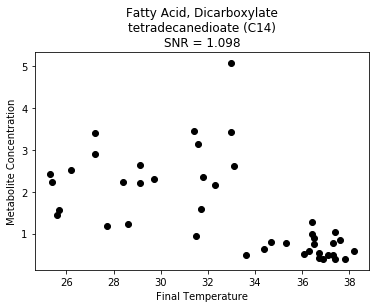

(43,)


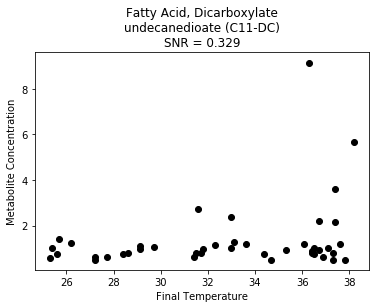

In [30]:
get_graph(merged_data, metab_def, 'Fatty Acid, Dicarboxylate')

# Investigating Differences in Groups of metabolites (e.g. Glycolysis, TCA cycle) between mice above/below a temp threshold

Create custom lists of select metabolites and visualize how the distribution of them look like in 2 groups of mice (i.e. mice above or below a specified temperature threshold)

In [31]:
import seaborn as sns
glycolysis_metabs = ['glucose','1,5-anhydroglucitol (1,5-AG)',
                     'glucose 6-phosphate','Isobar: hexose diphosphates',
                     '2,3-diphosphoglycerate','3-phosphoglycerate','2-phosphoglycerate',
                     'phosphoenolpyruvate (PEP)','pyruvate','lactate']
TCA_metabs = ['pyruvate','lactate','acetyl-CoA', 'citrate','aconitate [cis or trans]','itaconate',
             'isocitrate','alpha-ketoglutarate','propionyl CoA','succinate','fumarate',
             'mesaconate (methylfumarate)','malate']
Energy_metabs = ['diadenosine triphosphate',"adenosine 3',5'-diphosphate","adenosine 3',5'-cyclic monophosphate (cAMP)",
                'NADH','NAD+']

glutamate_metabs = ['glutamine','glutamate','alpha-ketoglutarate','glycine','cysteine','gamma-glutamylcysteine',
                    'glutathione, reduced (GSH)','glutathione, oxidized (GSSG)','5-oxoproline',
                    'proline','citrulline','aspartate','arginine']

aminoAcids_metabs = ['arginine','histidine','lysine','aspartate','glutamate',
                    'serine','threonine','asparagine','glutamine','cysteine',
                    'glycine','proline',
                     'alanine','valine','isoleucine','leucine','methionine',
                     'phenylalanine','tyrosine','tryptophan']

globalNAcetyl_AAs = metab_def[metab_def['BIOCHEMICAL'].str.contains('N-acetyl')].BIOCHEMICAL.values

bcaa_metabs = ['leucine','isoleucine','valine','N-acetylleucine','N-acetylisoleucine', 'N-acetylvaline', 
               'alpha-ketoglutarate','isovaleryl/2-methylbutyryl CoA','butyryl/isobutyryl CoA',
              '3-methylcrotonylglycine','tigloylglycine','3-methylglutaconate',
              '3-hydroxy-3-methylgluratrate', '3-hydroxyisobutyrate','propionyl CoA','acetyl-CoA']

leucine_metabs = ['leucine','N-acetylleucine','1-carboxyethylleucine','alpha-hydroxyisocaproate',
                  'isovaleryl/2-methylbutyryl CoA','isovalerylglycine','isovalerylcarnitine (C5)','3-methylcrotonylglycine',
                  'beta-hydroxyisovalerate','beta-hydroxyisovaleroylcarnitine','3-methylglutaconate','3-methylglutarylcarnitine (2)',
                  '3-hydroxy-3-methylglutarate', 'acetyl-CoA']

isoleucine_metabs = ['isoleucine','N-acetylisoleucine','1-carboxyethylisoleucine',
                     '2-hydroxy-3-methylvalerate','2-methylbutyrylcarnitine (C5)','2-methylbutyrylglycine (C5)',
                     'tiglyl carnitine (C5)','tigloylglycine','butyryl/isobutyryl CoA',
                     'ethylmalonate','methylsuccinate','methylsuccinoylcarnitine','acetyl-CoA']

valine_metabs = ['valine','N-acetylvaline','1-carboxyethylvaline',
                 'alpha-hydroxyisovalerate','butyryl/isobutyryl CoA','isobutyrylcarnitine (C4)','3-hydroxyisobutyrate',
                'propionyl CoA']

leucine_abridged_metabs = ['leucine','N-acetylleucine',
                  'isovaleryl/2-methylbutyryl CoA','isovalerylglycine',
                  'beta-hydroxyisovalerate','3-methylglutaconate',
                  '3-hydroxy-3-methylglutarate','acetyl-CoA']

isoleucine_abridged_metabs = ['isoleucine','N-acetylisoleucine','2-methylbutyrylglycine (C5)',
                     'tigloylglycine','butyryl/isobutyryl CoA','acetyl-CoA']


valine_abridged_metabs = ['valine','N-acetylvaline','alpha-hydroxyisovalerate','butyryl/isobutyryl CoA',
                          '3-hydroxyisobutyrate','propionyl CoA']

NAD_recycling = ['leucine','isoleucine','valine','threonine',
                 'hydroxyproline',
                 'alpha-hydroxyisocaproate','alpha-hydroxyisovalerate',
                 'alpha-ketobutyrate',
                 'glutamine','glutamate','alpha-ketoglutarate',
                 '2-hydroxybutyrate/2-hydroxyisobutyrate',
                 '2S,3R-dihydroxybutyrate','2R,3R-dihydroxybutyrate',
                 'citrate','malate','stearate (18:0)',
                'methionine','cysteine','phenylalanine']

NAD_recycling_substrate = ['leucine','isoleucine','valine','threonine','glutamine']
                 
NAD_recycling_alphaketoacids =['alpha-ketobutyrate','alpha-ketoglutarate','alpha-ketoglutaramate*']
NAD_recycling_alphahydroxyacids = ['alpha-hydroxyisocaproate','alpha-hydroxyisovalerate',
                 '2-hydroxybutyrate/2-hydroxyisobutyrate','2S,3R-dihydroxybutyrate','2R,3R-dihydroxybutyrate']
NAD_recycling_products = ['citrate','malate','stearate (18:0)']

NAD_recycling_substrateHydroxyAcids = NAD_recycling_substrate+NAD_recycling_alphahydroxyacids
print(NAD_recycling_substrateHydroxyAcids)

# https://www.nature.com/articles/s41598-021-85788-0

# https://www.researchgate.net/publication/288663571/figure/fig7/AS:340012789977090@1458076774277/Pathways-for-branched-chain-amino-acid-catabolism-Valine-degradation-produces-one.png



['leucine', 'isoleucine', 'valine', 'threonine', 'glutamine', 'alpha-hydroxyisocaproate', 'alpha-hydroxyisovalerate', '2-hydroxybutyrate/2-hydroxyisobutyrate', '2S,3R-dihydroxybutyrate', '2R,3R-dihydroxybutyrate']


In [32]:
globalNAcetyl_AAs

array(["cytidine 5'-monophospho-N-acetylneuraminic acid",
       'N-acetyl-1-methylhistidine*', 'N-acetyl-2-aminoadipate',
       'N-acetyl-2-aminooctanoate*', 'N-acetyl-3-methylhistidine*',
       'N-acetyl-glucosamine 1-phosphate', 'N-acetyl-isoputreanine',
       'N-acetylalanine', 'N-acetylarginine', 'N-acetylasparagine',
       'N-acetylaspartate (NAA)', 'N-acetylcitrulline',
       'N-acetylcysteine', 'N-acetylglucosamine 6-phosphate',
       'N-acetylglucosamine/N-acetylgalactosamine',
       'N-acetylglucosaminylasparagine', 'N-acetylglutamate',
       'N-acetylglutamine', 'N-acetylglycine', 'N-acetylhistidine',
       'N-acetylhomocitrulline', 'N-acetylisoleucine',
       'N-acetylkynurenine (2)', 'N-acetylleucine', 'N-acetylmethionine',
       'N-acetylmethionine sulfoxide', 'N-acetylneuraminate',
       'N-acetylphenylalanine', 'N-acetylputrescine', 'N-acetylpyrraline',
       'N-acetylserine', 'N-acetyltaurine', 'N-acetylthreonine',
       'N-acetyltryptophan', 'N-acetyltyr

In [33]:
def get_chemIDlist(metab_def, list_metabs):
    chemIDlist = list()
    for i in range(len(list_metabs)):
        string = list_metabs[i]
        print(string)
        chemIDlist.append(metab_def.loc[metab_def['BIOCHEMICAL']==string, 'CHEMICAL ID'].iloc[0])
#     df_list = metab_def[metab_def.BIOCHEMICAL.isin(list_metabs)]
    print(chemIDlist)
    chemIDlist = ['X'+str(string) for string in chemIDlist]
    return chemIDlist

def plot_swarm_metabs(df_in, temp_thresh, rotation_val, title_str, fig_size, marker_size):
    df = pd.melt(df_in, id_vars='Final_Temp')
    df['Temp_binary'] = np.where(df['Final_Temp'] >= temp_thresh, "$\geq$ {}C".format(round(temp_thresh)),
                                  "< {}C".format(round(temp_thresh)))
    fig, ax = plt.subplots(figsize=fig_size)
    sns.set_context("talk")
#     sns.set(font_scale=1.4)
#     sns.stripplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=7,jitter=True,dodge=True)
    sns.swarmplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=marker_size, dodge=True)
    sns.boxplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax,
#                 showmeans=True,
#                 meanline=True,
                medianprops={'color':'k','ls':'-','lw':3},
                meanprops={'visible': False},
                whiskerprops={'visible': False},
                showfliers=False,
                showbox=False,
                showcaps=False)
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[2:4], labels[2:4])
    
    ax.tick_params(axis='x', rotation=rotation_val)
    plt.xlabel('Metabolite')
    plt.ylabel('Median-Normalized Value')
    plt.title(title_str)
    plt.show()
    
def plot_violin_metabs(df_in, temp_thresh, rotation_val, title_str, fig_size, marker_size,fn_out):
    df = pd.melt(df_in, id_vars='Final_Temp')
    df['Temp_binary'] = np.where(df['Final_Temp'] >= temp_thresh, "$\geq$ {}C".format(round(temp_thresh)),
                                  "< {}C".format(round(temp_thresh)))
    fig, ax = plt.subplots(figsize=fig_size)
    sns.set_context("talk")
#     sns.set(font_scale=1.4)
#     sns.stripplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=7,jitter=True,dodge=True)
    sns.violinplot(x='variable', y='value',hue="Temp_binary",
                   data=df,ax=ax, split=False,
                  scale="count", inner="quartile")
    sns.swarmplot(x='variable', y='value',hue="Temp_binary",data=df,ax=ax, size=marker_size, dodge=True, color="black")
    
    handles, labels = ax.get_legend_handles_labels()
    l = plt.legend(handles[0:2], labels[0:2])

    ax.tick_params(axis='x', rotation=rotation_val, labelsize=18)
    plt.xlabel('Metabolite')
    plt.ylabel('Median-Normalized Value')
    plt.title(title_str)
    plt.tight_layout()
    plt.savefig(fn_out)
    plt.show()
    
from scipy import stats

def perform_ttests(df, temp_thresh):
    metabs = df.columns
    for i in range(len(metabs)):
        a = df[df['Final_Temp']>=temp_thresh]
        b = df[df['Final_Temp']<temp_thresh]
        [test_stat,pval] = stats.ttest_ind(a[metabs[i]],b[metabs[i]])
        print([metabs[i],pval])
    

    

In [34]:
AcAA_metabs = [
    'arginine',
    'N-acetylarginine',
    'histidine',
    'N-acetylhistidine',
    'glutamate',
    'N-acetylglutamate',
    'serine',
    'N-acetylserine',
    'threonine',
    'N-acetylthreonine',
    'asparagine',
    'N-acetylasparagine',
    'glutamine',
    'N-acetylglutamine',
    'cysteine',
    'N-acetylcysteine',
    'glycine',
    'N-acetylglycine',
    'alanine',
    'N-acetylalanine',
    'valine',
    'N-acetylvaline',
    'isoleucine',
    'N-acetylisoleucine',
    'leucine',
    'N-acetylleucine',
    'methionine',
    'N-acetylmethionine',
    'phenylalanine',
    'N-acetylphenylalanine',
    'tyrosine',
    'N-acetyltyrosine',
    'tryptophan',
    'N-acetyltryptophan']

### Energy sources

In [35]:
chemID_energy = get_chemIDlist(metab_def, Energy_metabs)
chemID_energy

diadenosine triphosphate
adenosine 3',5'-diphosphate
adenosine 3',5'-cyclic monophosphate (cAMP)
NADH
NAD+
[100002712, 1214, 207, 428, 1310]


['X100002712', 'X1214', 'X207', 'X428', 'X1310']

In [36]:
df_1 = merged_data.loc[:,chemID_energy]
df_1.columns = ['ATP','ADP','cAMP','NADH','NAD']
df_1['ATP/ADP'] = df_1.ATP / df_1.ADP
df_1['ATP/cAMP'] = df_1.ATP / df_1.cAMP
df_1['NAD/NADH'] = df_1.NAD / df_1.NADH
df_1['Final_Temp'] = merged_data['Final_Temp']
df_1.head()

ATP     ADP    cAMP    NADH     NAD   ATP/ADP  ATP/cAMP  NAD/NADH  \
0  1.8042  1.0181  0.8351  1.4050  1.1703  1.772125  2.160460  0.832954   
1  0.9636  0.3177  0.9181  0.8378  0.6726  3.033050  1.049559  0.802817   
2  0.9108  0.4369  0.7278  3.5339  2.2410  2.084688  1.251443  0.634144   
3  1.0078  1.0724  0.8302  1.6462  1.2176  0.939761  1.213924  0.739643   
4  0.8683  0.8313  0.9380  1.1204  1.0109  1.044509  0.925693  0.902267   

   Final_Temp  
0        36.1  
1        36.9  
2        35.3  
3        36.5  
4        31.4

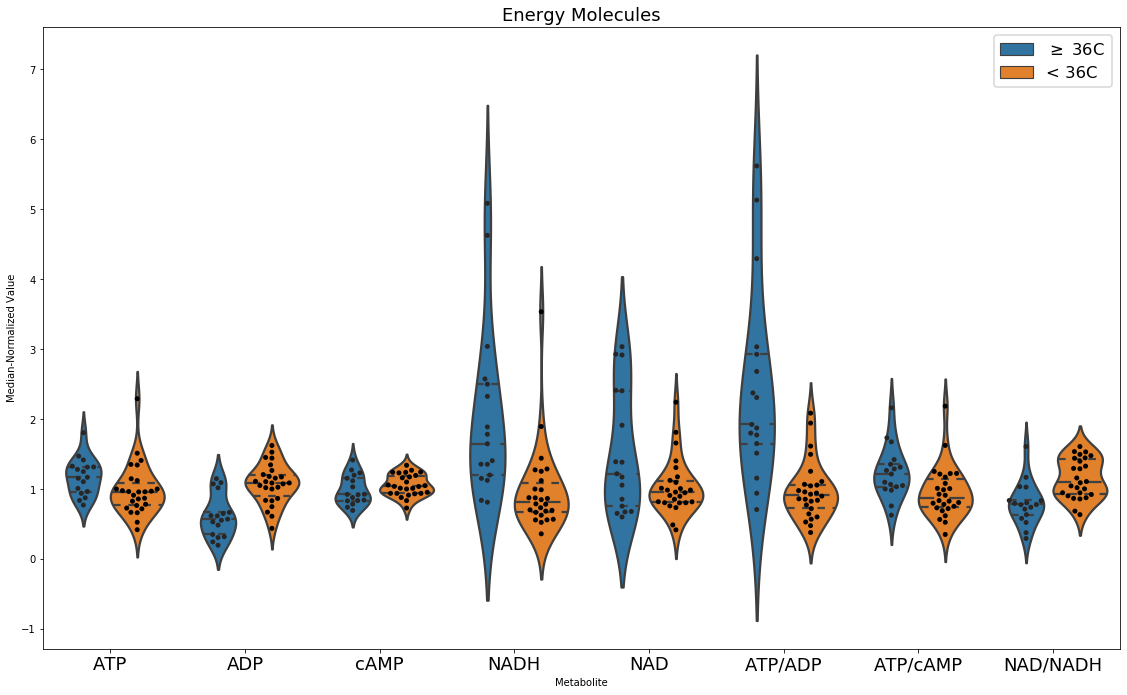

In [37]:
plot_violin_metabs(df_1, 36,0,'Energy Molecules',(16,10),5,'../processed/violin_energymolecules.png')

In [38]:
perform_ttests(df_1, 36)

['ATP', 0.08227258839479472]
['ADP', 9.195037544832973e-06]
['cAMP', 0.22600631079854885]
['NADH', 0.0005755631544285706]
['NAD', 0.014859486890162093]
['ATP/ADP', 8.957430486664227e-06]
['ATP/cAMP', 0.019039172220816757]
['NAD/NADH', 0.0003622426867649026]
['Final_Temp', 5.1820617594654956e-11]


### Glycolysis

In [39]:
# repeat for glycolysis 
chemID_glyco = get_chemIDlist(metab_def, glycolysis_metabs)
chemID_glyco

glucose
1,5-anhydroglucitol (1,5-AG)
glucose 6-phosphate
Isobar: hexose diphosphates
2,3-diphosphoglycerate
3-phosphoglycerate
2-phosphoglycerate
phosphoenolpyruvate (PEP)
pyruvate
lactate
[572, 100000580, 291, 100002180, 1227, 132, 100000093, 463, 823, 482]


['X572',
 'X100000580',
 'X291',
 'X100002180',
 'X1227',
 'X132',
 'X100000093',
 'X463',
 'X823',
 'X482']

In [40]:
df_2 = merged_data.loc[:,chemID_glyco]
df_2.columns = ['glucose','1,5-anhydroglucitol',
                'glucose 6-phosphate','hexose diphosphates',
                '2,3-diphosphoglycerate','3-phosphoglycerate',
                '2-phosphoglycerate','phosphoenolpyruvate',
                'pyruvate','lactate']
df_2['Final_Temp'] = merged_data['Final_Temp']
df_2.head()

glucose  1,5-anhydroglucitol  glucose 6-phosphate  hexose diphosphates  \
0   4.3787               2.0301               3.4676               1.8054   
1   5.1987               4.4957               4.1887               0.5094   
2   6.8774               2.3847               6.4982               0.9946   
3   1.0000               1.3870               0.5759               0.8557   
4   0.7993               0.2529               0.3369               1.1934   

   2,3-diphosphoglycerate  3-phosphoglycerate  2-phosphoglycerate  \
0                  2.3496              0.9980              1.2864   
1                  0.9701              0.7890              0.8760   
2                  1.0000              1.4869              1.4034   
3                  1.5085              1.4924              1.3142   
4                  1.9029              1.0880              1.3077   

   phosphoenolpyruvate  pyruvate  lactate  Final_Temp  
0               2.1997    1.4849   4.2316        36.1  
1               1.0545    1.3657   3.1496        36.9  
2               1.7625    1.7964   3.6077        35.3  
3               1.0000    0.6620   0.8747        36.5  
4               0.9619    0.7313   1.1182        31.4

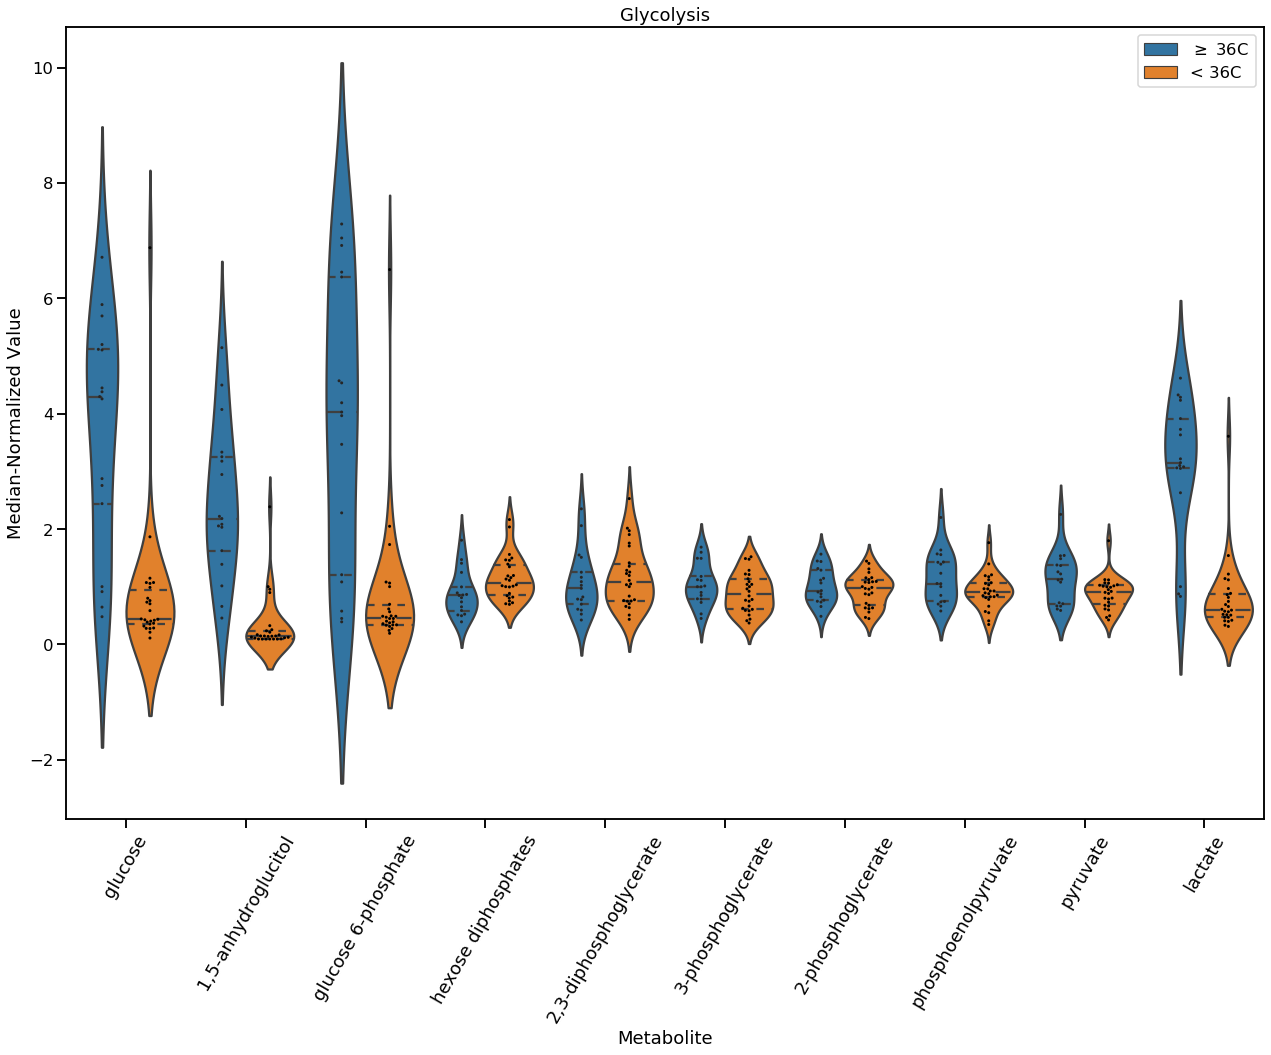

In [41]:
plot_violin_metabs(df_2, 36,60,'Glycolysis',(18,15),3,'../processed/violin_glycolysis.png')

In [42]:
perform_ttests(df_2, 36)

['glucose', 1.5880915278157395e-06]
['1,5-anhydroglucitol', 2.6291899517727416e-09]
['glucose 6-phosphate', 4.963334108724764e-06]
['hexose diphosphates', 0.03317676965560899]
['2,3-diphosphoglycerate', 0.5233176052162041]
['3-phosphoglycerate', 0.1878209587792567]
['2-phosphoglycerate', 0.4027532427838185]
['phosphoenolpyruvate', 0.03841648308892292]
['pyruvate', 0.027060756516106645]
['lactate', 3.511931639354206e-10]
['Final_Temp', 5.1820617594654956e-11]


### TCA

In [43]:
# repeat for TCA
chemID_TCA = get_chemIDlist(metab_def, TCA_metabs)
chemID_TCA

pyruvate
lactate
acetyl-CoA
citrate
aconitate [cis or trans]
itaconate
isocitrate
alpha-ketoglutarate
propionyl CoA
succinate
fumarate
mesaconate (methylfumarate)
malate
[823, 482, 1830, 1124, 100001359, 100000455, 1206, 93, 100000355, 252, 330, 100000446, 409]


['X823',
 'X482',
 'X1830',
 'X1124',
 'X100001359',
 'X100000455',
 'X1206',
 'X93',
 'X100000355',
 'X252',
 'X330',
 'X100000446',
 'X409']

In [44]:
df_3 = merged_data.loc[:,chemID_TCA]
df_3.columns = ['pyruvate','lactate','acetyl-CoA', 'citrate','aconitate','itaconate',
             'isocitrate','alpha-ketoglutarate','propionyl CoA','succinate','fumarate',
             'methylfumarate','malate']
df_3['alpha-KG/succinate'] = df_3['alpha-ketoglutarate'] / df_3['succinate']
df_3['itaconate/succinate'] = df_3['itaconate'] / df_3['succinate']

df_3['Final_Temp'] = merged_data['Final_Temp']
df_3.head()

pyruvate  lactate  acetyl-CoA  citrate  aconitate  itaconate  isocitrate  \
0    1.4849   4.2316      0.9974   0.8943     0.8339     0.4489      0.8210   
1    1.3657   3.1496      1.0026   0.5156     0.6282     0.5674      1.0512   
2    1.7964   3.6077      1.8163   0.4788     0.3027     0.0088      0.7090   
3    0.6620   0.8747      2.0241   0.6945     0.6163     1.0012      1.0413   
4    0.7313   1.1182      0.8508   0.5673     0.4979     1.1740      0.9037   

   alpha-ketoglutarate  propionyl CoA  succinate  fumarate  methylfumarate  \
0               0.8966         1.2169     1.2018    1.0844          0.4864   
1               0.6442         2.1693     1.6488    1.0863          0.5888   
2               1.1144         1.9246     1.5581    1.1510          0.0260   
3               0.5148         1.3032     1.4394    0.9691          1.4686   
4               0.8342         1.0780     1.8561    0.6895          1.3864   

   malate  alpha-KG/succinate  itaconate/succinate  Final_Temp  
0  1.6079            0.746048             0.373523        36.1  
1  1.3357            0.390708             0.344129        36.9  
2  1.3757            0.715230             0.005648        35.3  
3  1.1372            0.357649             0.695568        36.5  
4  0.7201            0.449437             0.632509        31.4

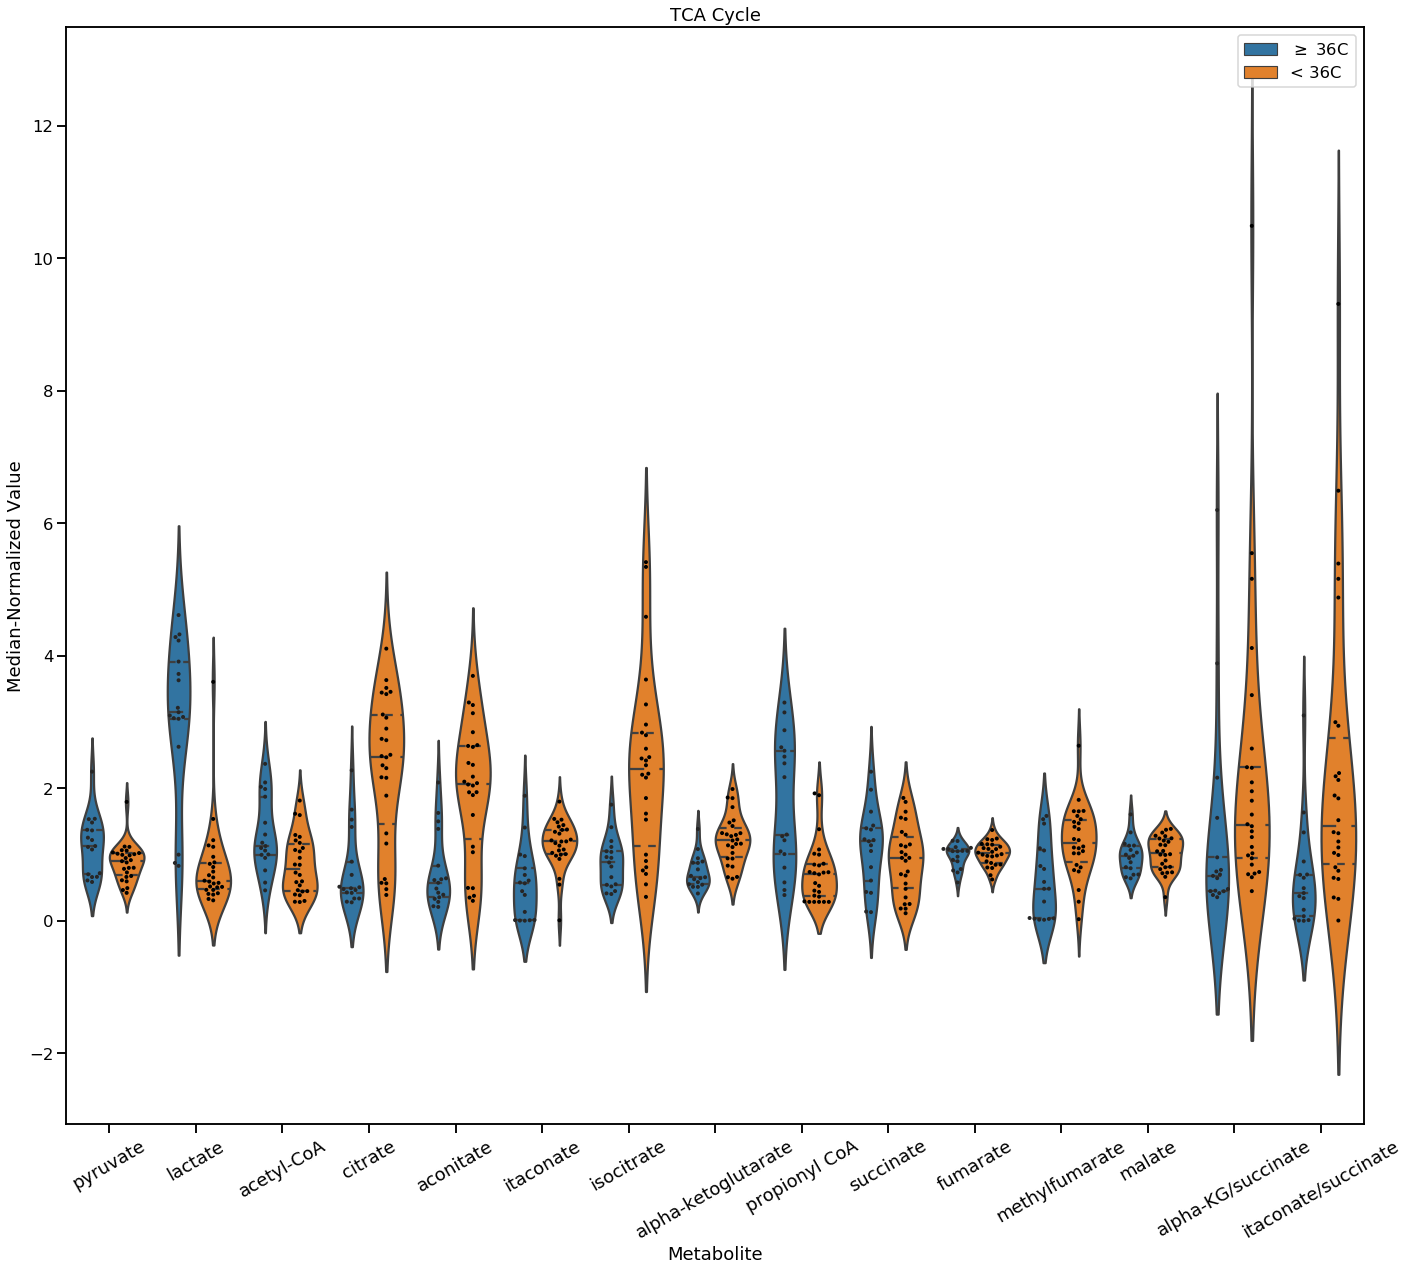

In [45]:
plot_violin_metabs(df_3, 36,30,'TCA Cycle',(20,18),4,'../processed/violin_TCA.png')

In [46]:
perform_ttests(df_3, 36)

['pyruvate', 0.027060756516106645]
['lactate', 3.511931639354206e-10]
['acetyl-CoA', 0.004165862650151089]
['citrate', 5.9254727255358994e-06]
['aconitate', 3.909349273497117e-05]
['itaconate', 9.010900342513858e-05]
['isocitrate', 0.00014225810795773092]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['propionyl CoA', 4.5241214292178955e-05]
['succinate', 0.32804798169093785]
['fumarate', 0.5583831440275306]
['methylfumarate', 0.001393456987359607]
['malate', 0.6548398186789357]
['alpha-KG/succinate', 0.12801128251878935]
['itaconate/succinate', 0.005676806575800465]
['Final_Temp', 5.1820617594654956e-11]


### Glutamine metab

In [47]:
# repeat for glutamine
chemID_glut = get_chemIDlist(metab_def, glutamate_metabs)
chemID_glut

glutamine
glutamate
alpha-ketoglutarate
glycine
cysteine
gamma-glutamylcysteine
glutathione, reduced (GSH)
glutathione, oxidized (GSSG)
5-oxoproline
proline
citrulline
aspartate
arginine
[563, 561, 93, 340, 800, 1036, 496, 448, 1021, 480, 391, 234, 231]


['X563',
 'X561',
 'X93',
 'X340',
 'X800',
 'X1036',
 'X496',
 'X448',
 'X1021',
 'X480',
 'X391',
 'X234',
 'X231']

In [48]:
df_4 = merged_data.loc[:,chemID_glut]
df_4.columns = ['glutamine','glutamate','alpha-ketoglutarate','glycine','cysteine','gamma-glutamylcysteine',
                    'GSH','GSSG','5-oxoproline','proline','citrulline','aspartate','arginine']
df_4['Final_Temp'] = merged_data['Final_Temp']
df_4.head()

glutamine  glutamate  alpha-ketoglutarate  glycine  cysteine  \
0     0.6664     0.9389               0.8966   1.0400    1.2209   
1     0.5963     1.0734               0.6442   0.8835    1.3271   
2     0.7331     0.8551               1.1144   1.1262    0.9508   
3     0.6870     1.0220               0.5148   0.8538    0.9722   
4     1.4299     1.1964               0.8342   0.7506    1.1955   

   gamma-glutamylcysteine     GSH    GSSG  5-oxoproline  proline  citrulline  \
0                  2.1287  2.8817  1.1702        0.7146   1.0063      1.0015   
1                  6.2252  4.9837  1.1231        0.5237   1.1434      0.8497   
2                  5.8977  5.0294  1.1851        0.5058   0.6568      0.7593   
3                  0.5930  0.4762  0.8710        0.6170   0.7858      1.0683   
4                  0.2770  0.2202  0.9084        1.6203   1.0225      0.9578   

   aspartate  arginine  Final_Temp  
0     1.1283    1.1085        36.1  
1     1.0247    0.9704        36.9  
2     0.6934    0.5950        35.3  
3     1.1339    1.1002        36.5  
4     0.6295    0.8879        31.4

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


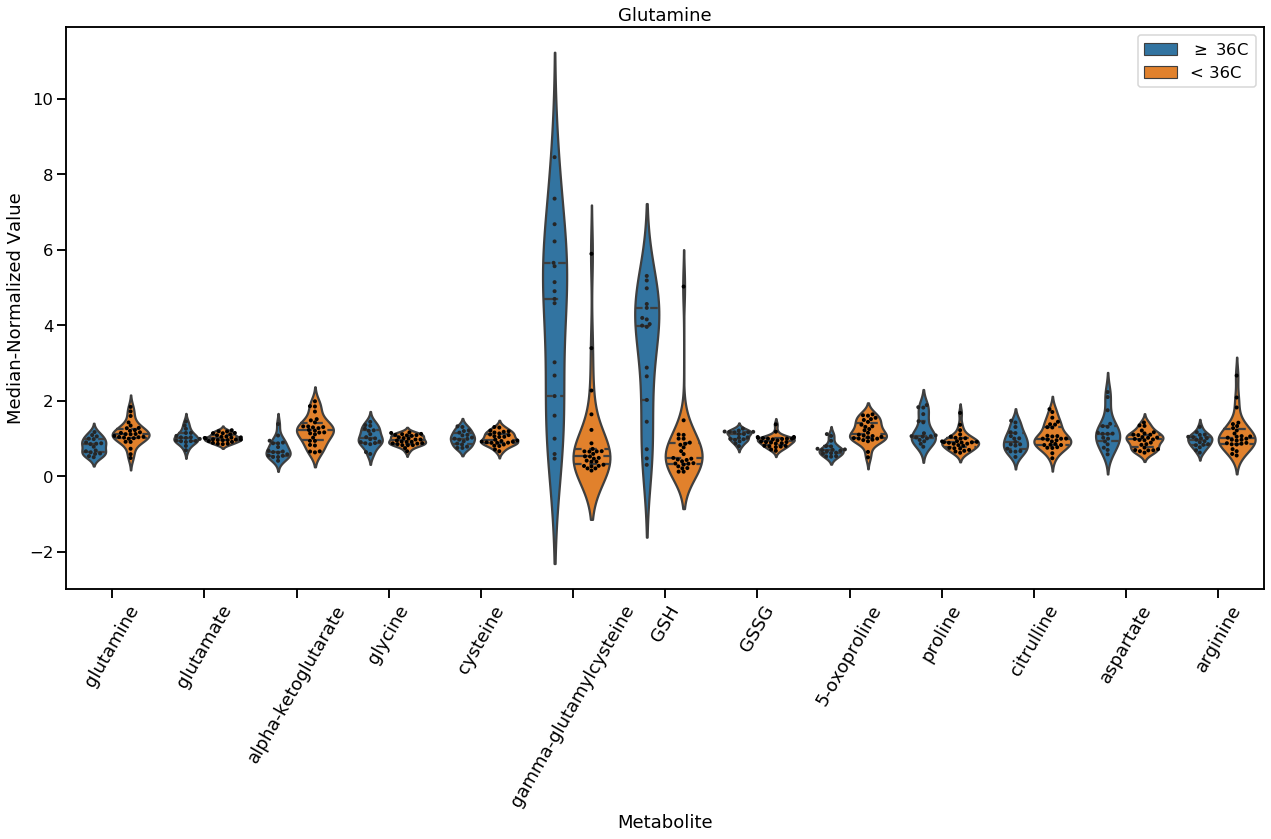

In [49]:
plot_violin_metabs(df_4, 36,60, 'Glutamine',(18,12),4,'../processed/violin_glutamine.png')

Oxoproline and GSH and gamma-glutamylcysteine are differential

In [50]:
perform_ttests(df_4, 36)

['glutamine', 0.0004656514715169759]
['glutamate', 0.6815664395423436]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['glycine', 0.17811988596297992]
['cysteine', 0.7029571314625587]
['gamma-glutamylcysteine', 1.0783967788426014e-06]
['GSH', 2.0966210338413234e-07]
['GSSG', 0.0046371257775897805]
['5-oxoproline', 7.41596795201292e-07]
['proline', 0.001271851123979224]
['citrulline', 0.2800667725686335]
['aspartate', 0.03288143833343215]
['arginine', 0.15139168551717194]
['Final_Temp', 5.1820617594654956e-11]


### Amino acids

In [51]:
aminoAcids_metabs

['arginine',
 'histidine',
 'lysine',
 'aspartate',
 'glutamate',
 'serine',
 'threonine',
 'asparagine',
 'glutamine',
 'cysteine',
 'glycine',
 'proline',
 'alanine',
 'valine',
 'isoleucine',
 'leucine',
 'methionine',
 'phenylalanine',
 'tyrosine',
 'tryptophan']

In [52]:
# repeat for amino acids
chemID_AA = get_chemIDlist(metab_def, aminoAcids_metabs)
chemID_AA

arginine
histidine
lysine
aspartate
glutamate
serine
threonine
asparagine
glutamine
cysteine
glycine
proline
alanine
valine
isoleucine
leucine
methionine
phenylalanine
tyrosine
tryptophan
[231, 355, 407, 234, 561, 503, 564, 917, 563, 800, 340, 480, 811, 566, 376, 397, 415, 460, 815, 565]


['X231',
 'X355',
 'X407',
 'X234',
 'X561',
 'X503',
 'X564',
 'X917',
 'X563',
 'X800',
 'X340',
 'X480',
 'X811',
 'X566',
 'X376',
 'X397',
 'X415',
 'X460',
 'X815',
 'X565']

In [53]:
df_5 = merged_data.loc[:,chemID_AA]
# df_5.columns = ['arginine','histidine','lysine','aspartate','glutamate',
#                     'serine','threonine','asparagine','glutamine','cysteine',
#                     'glycine','proline',
#                      'alanine','valine','isoleucine','leucine','methionine',
#                      'phenylalanine','tyrosine','tryptophan']
df_5.columns = aminoAcids_metabs
df_5['Final_Temp'] = merged_data['Final_Temp']
df_5.head()

arginine  histidine  lysine  aspartate  glutamate  serine  threonine  \
0    1.1085     0.8611  0.9447     1.1283     0.9389  1.0822     0.8875   
1    0.9704     0.5584  1.1625     1.0247     1.0734  0.9910     0.9336   
2    0.5950     0.8900  0.7348     0.6934     0.8551  1.0196     0.7846   
3    1.1002     0.7720  1.0260     1.1339     1.0220  0.8883     0.8522   
4    0.8879     1.1573  0.8157     0.6295     1.1964  0.6499     1.0634   

   asparagine  glutamine  cysteine  ...  proline  alanine  valine  isoleucine  \
0      1.5500     0.6664    1.2209  ...   1.0063   1.6959  0.6015      0.8461   
1      0.9275     0.5963    1.3271  ...   1.1434   2.1213  0.8071      0.9178   
2      0.8645     0.7331    0.9508  ...   0.6568   2.1004  0.4416      0.6254   
3      0.9430     0.6870    0.9722  ...   0.7858   0.9532  0.6896      0.8433   
4      1.0007     1.4299    1.1955  ...   1.0225   0.8946  0.9087      1.0290   

   leucine  methionine  phenylalanine  tyrosine  tryptophan  Final_Temp  
0   0.7514      1.0285         0.8237    1.0566      1.3245        36.1  
1   0.9376      1.6441         1.0147    1.2030      1.3250        36.9  
2   0.5589      0.7649         0.6118    0.9125      0.6514        35.3  
3   0.7792      0.8079         0.7567    0.8224      1.1280        36.5  
4   1.0343      1.0220         0.9880    1.0876      1.1022        31.4  

[5 rows x 21 columns]

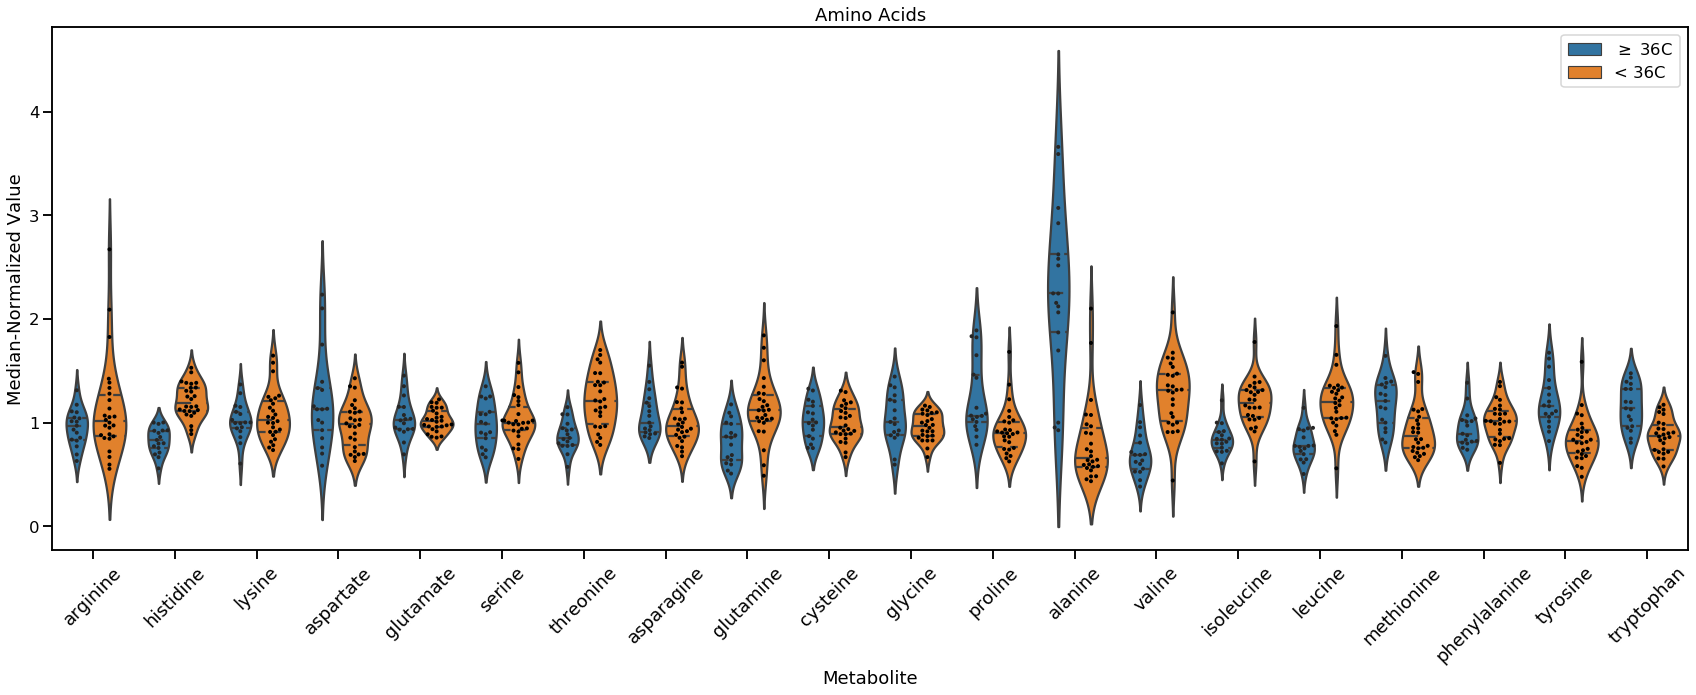

In [54]:
plot_violin_metabs(df_5, 36,45, 'Amino Acids',(24,10),4,'../processed/violin_aminoacids.png')

In [55]:
perform_ttests(df_5, 36)

['arginine', 0.15139168551717194]
['histidine', 5.604336207792752e-10]
['lysine', 0.41956926708687725]
['aspartate', 0.03288143833343215]
['glutamate', 0.6815664395423436]
['serine', 0.45540308932902107]
['threonine', 1.940051850842408e-05]
['asparagine', 0.4355828953172114]
['glutamine', 0.0004656514715169759]
['cysteine', 0.7029571314625587]
['glycine', 0.17811988596297992]
['proline', 0.001271851123979224]
['alanine', 1.6736697801148095e-09]
['valine', 1.2544584647726783e-07]
['isoleucine', 1.214667539194219e-06]
['leucine', 1.117167541407469e-06]
['methionine', 0.0014051670349840692]
['phenylalanine', 0.25159634250099944]
['tyrosine', 1.4769813958470083e-05]
['tryptophan', 2.3047392098974347e-05]
['Final_Temp', 5.1820617594654956e-11]


Histidine, Threonine, glutamine, BCAAs, alanine seem differential

## All Acetylated Metabs at N-terminus

In [56]:
# repeat for acetylated AAs globally 
chemID_AA_globalAc = get_chemIDlist(metab_def, globalNAcetyl_AAs)

cytidine 5'-monophospho-N-acetylneuraminic acid
N-acetyl-1-methylhistidine*
N-acetyl-2-aminoadipate
N-acetyl-2-aminooctanoate*
N-acetyl-3-methylhistidine*
N-acetyl-glucosamine 1-phosphate
N-acetyl-isoputreanine
N-acetylalanine
N-acetylarginine
N-acetylasparagine
N-acetylaspartate (NAA)
N-acetylcitrulline
N-acetylcysteine
N-acetylglucosamine 6-phosphate
N-acetylglucosamine/N-acetylgalactosamine
N-acetylglucosaminylasparagine
N-acetylglutamate
N-acetylglutamine
N-acetylglycine
N-acetylhistidine
N-acetylhomocitrulline
N-acetylisoleucine
N-acetylkynurenine (2)
N-acetylleucine
N-acetylmethionine
N-acetylmethionine sulfoxide
N-acetylneuraminate
N-acetylphenylalanine
N-acetylputrescine
N-acetylpyrraline
N-acetylserine
N-acetyltaurine
N-acetylthreonine
N-acetyltryptophan
N-acetyltyrosine
N-acetylvaline
UDP-N-acetylglucosamine/galactosamine
[1223, 100004299, 100021760, 100020204, 100002204, 1212, 100020487, 1110, 100001266, 100001257, 100000787, 100001577, 1107, 1213, 100006435, 1215, 100000282

In [57]:
df_acetyl_1 = merged_data.loc[:,chemID_AA_globalAc]
df_acetyl_1.columns = globalNAcetyl_AAs
df_acetyl_1['Final_Temp'] = merged_data['Final_Temp']


C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 15.4% of the points 

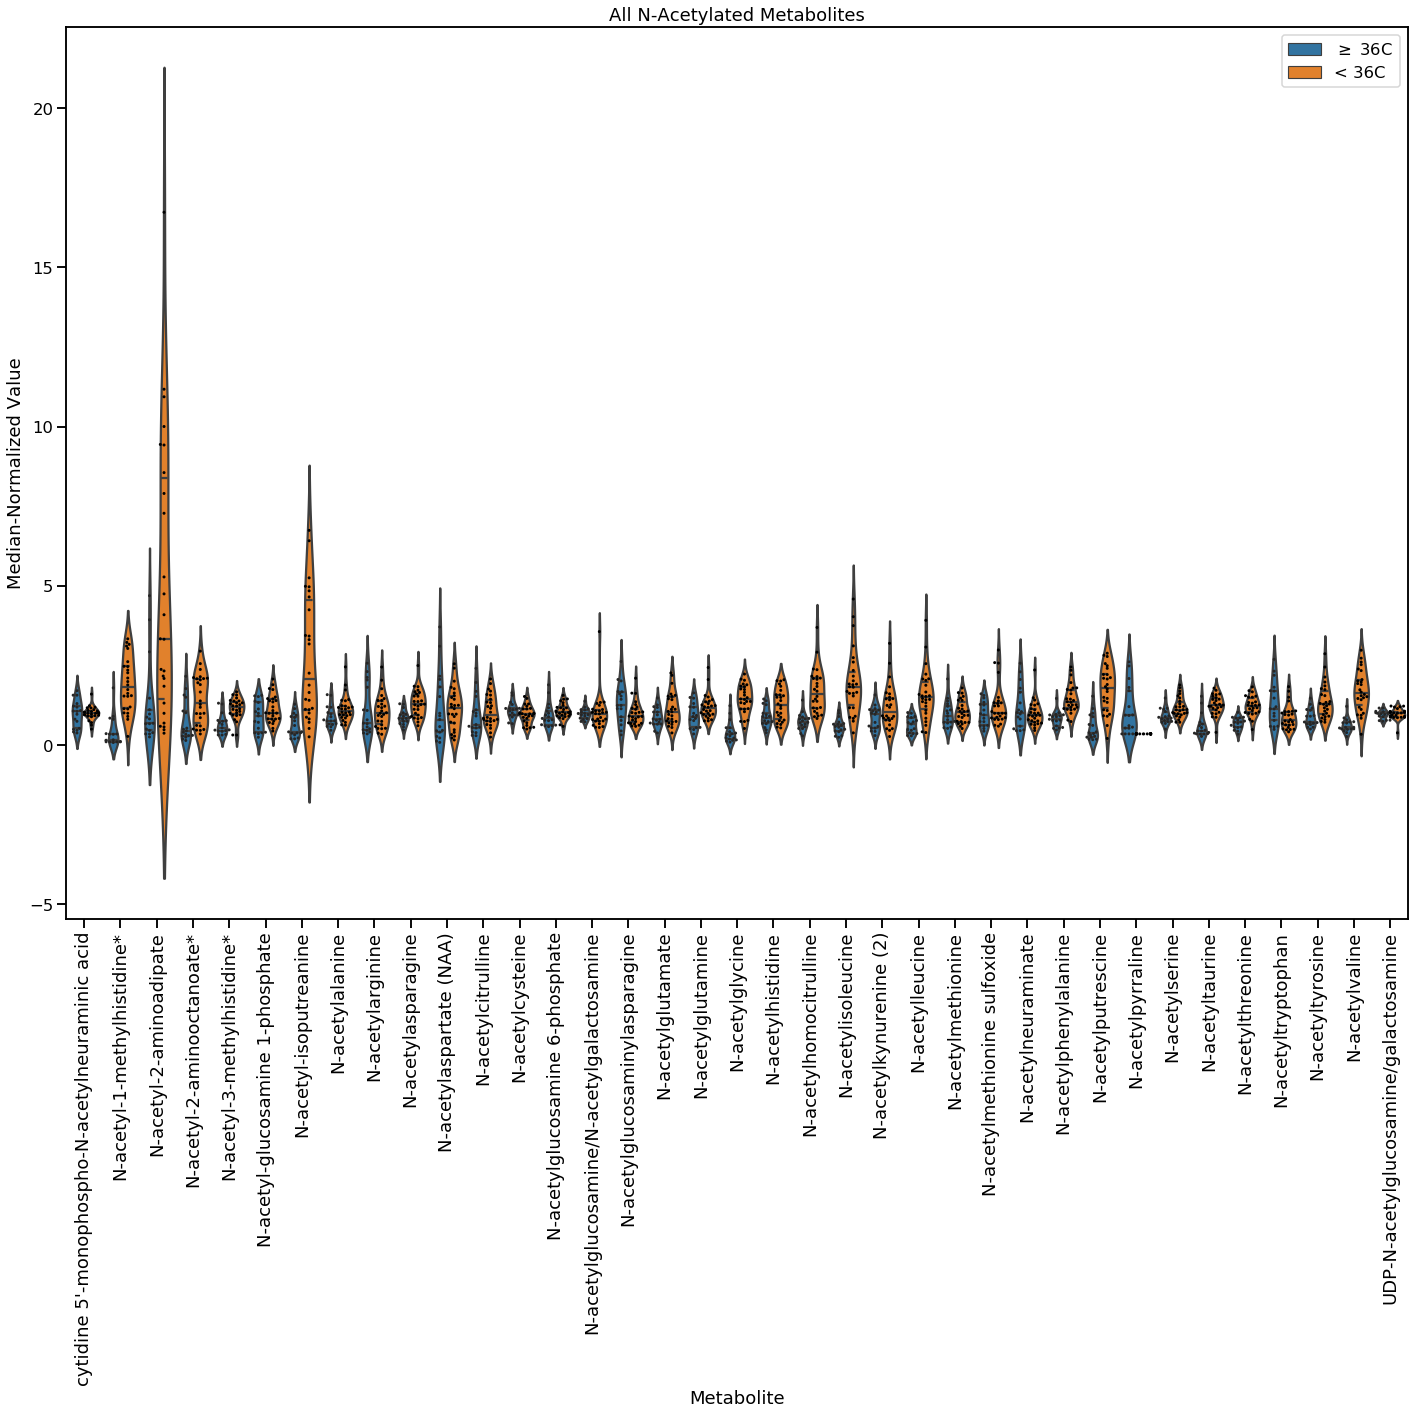

In [58]:
plot_violin_metabs(df_acetyl_1, 36,90,'All N-Acetylated Metabolites',(20,20),3,'../processed/violin_all-Nacetylated.png')

## Primary AAs vs N-Acetylated Primary AAs

In [59]:
# repeat for acetylated AAs 
chemID_AA_AcAA = get_chemIDlist(metab_def, AcAA_metabs)

arginine
N-acetylarginine
histidine
N-acetylhistidine
glutamate
N-acetylglutamate
serine
N-acetylserine
threonine
N-acetylthreonine
asparagine
N-acetylasparagine
glutamine
N-acetylglutamine
cysteine
N-acetylcysteine
glycine
N-acetylglycine
alanine
N-acetylalanine
valine
N-acetylvaline
isoleucine
N-acetylisoleucine
leucine
N-acetylleucine
methionine
N-acetylmethionine
phenylalanine
N-acetylphenylalanine
tyrosine
N-acetyltyrosine
tryptophan
N-acetyltryptophan
[231, 100001266, 355, 100001293, 561, 100000282, 503, 100001851, 564, 100001274, 917, 100001257, 563, 100001253, 800, 1107, 340, 100001006, 811, 1110, 566, 1084, 376, 100001276, 397, 1082, 415, 1083, 460, 100001256, 815, 100001104, 565, 100001254]


In [60]:
df_acetyl_2 = merged_data.loc[:,chemID_AA_AcAA]
df_acetyl_2.columns = AcAA_metabs
df_acetyl_2['Final_Temp'] = merged_data['Final_Temp']


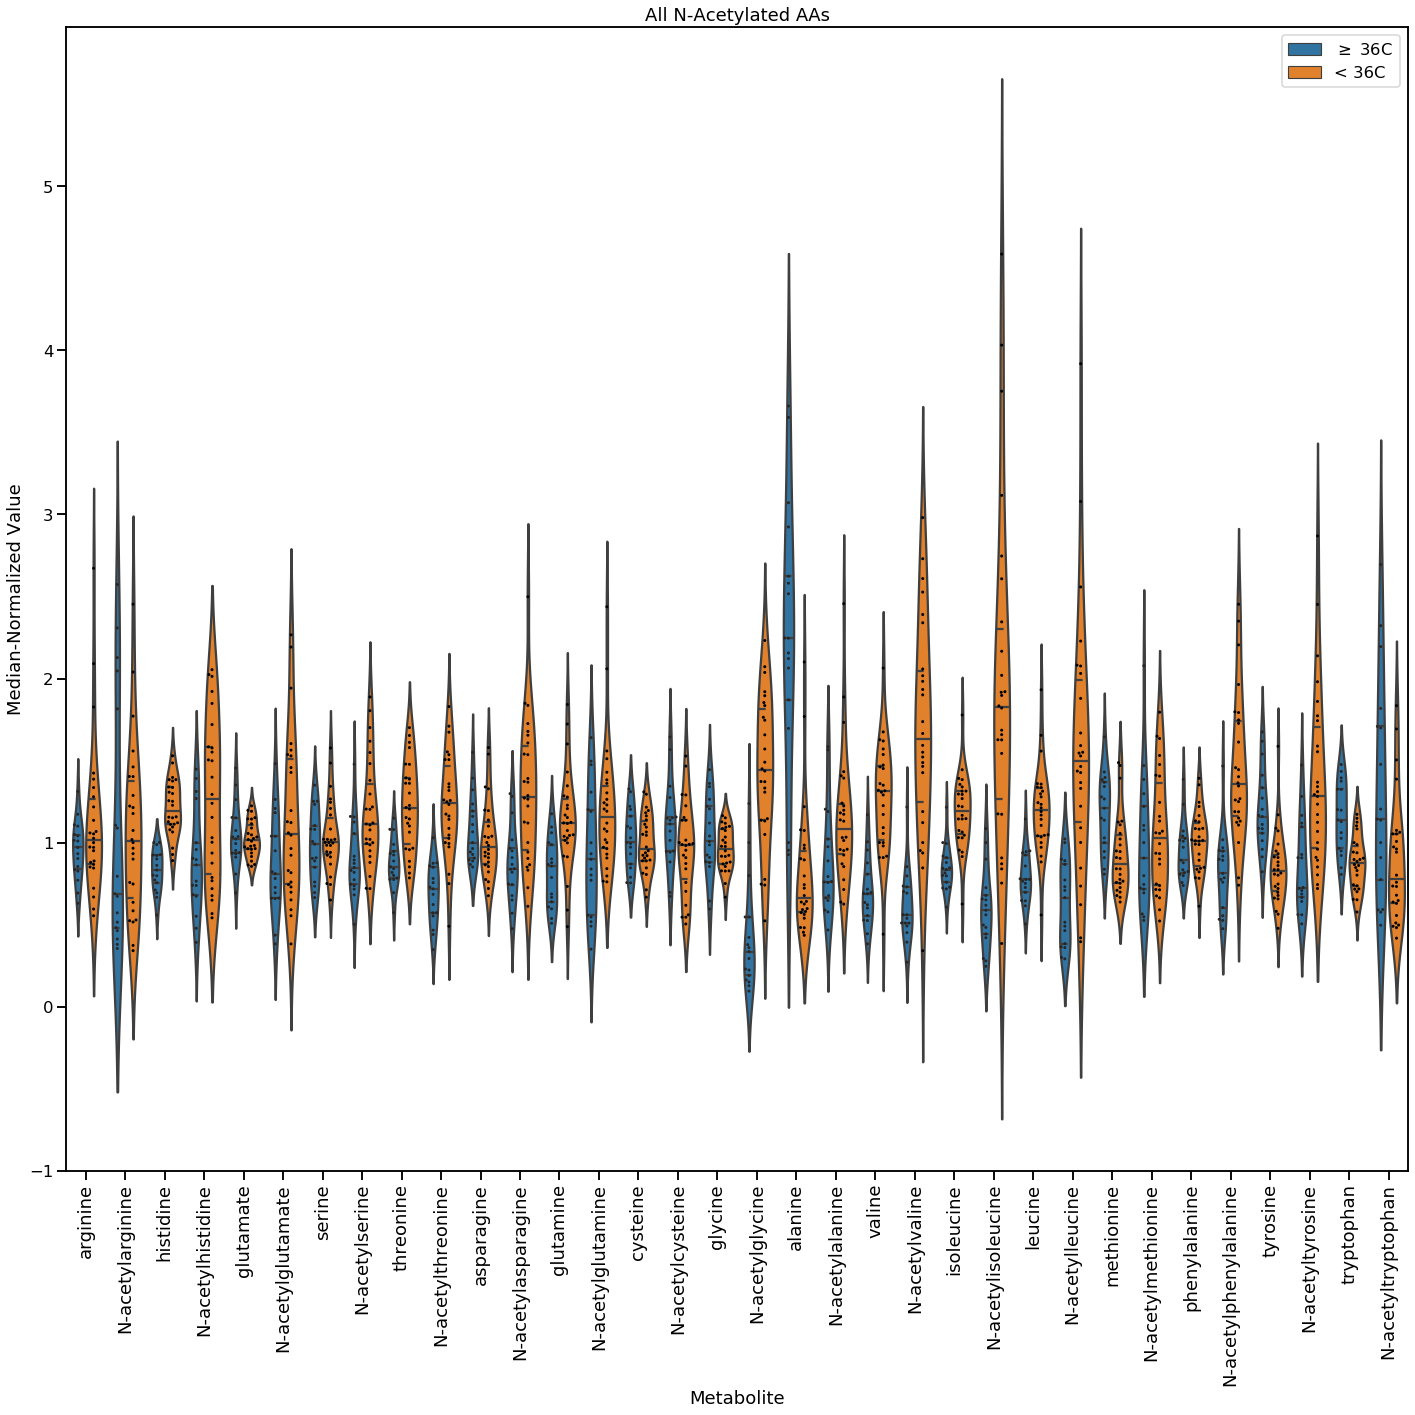

In [61]:
plot_violin_metabs(df_acetyl_2, 36,90,'All N-Acetylated AAs',(20,20),3,'../processed/violin_NormalVsNacetylated-AAs.png')

Groups of interest: N-acetyl arginine, histidine + N-acetyl histidine, N-acetylserine, threonine + N-acetylthreonine, N-acetylasparagine, glutamine + N-acetylglutamine, N-acetylglycine, alanine + N-acetylalanine, BCAAs, methionine?, N-acetylphenylalanine, tyrosine + N-acetyltyrosine, tryptophan?

## BCAA

In [62]:
# repeat for BCAA 
chemID_leucine = get_chemIDlist(metab_def, leucine_metabs)
chemID_isoleucine = get_chemIDlist(metab_def, isoleucine_metabs)
chemID_valine = get_chemIDlist(metab_def, valine_metabs)

chemID_leucine_abr = get_chemIDlist(metab_def, leucine_abridged_metabs)
chemID_isoleucine_abr = get_chemIDlist(metab_def, isoleucine_abridged_metabs)
chemID_valine_abr = get_chemIDlist(metab_def, valine_abridged_metabs)



leucine
N-acetylleucine
1-carboxyethylleucine
alpha-hydroxyisocaproate
isovaleryl/2-methylbutyryl CoA
isovalerylglycine
isovalerylcarnitine (C5)
3-methylcrotonylglycine
beta-hydroxyisovalerate
beta-hydroxyisovaleroylcarnitine
3-methylglutaconate
3-methylglutarylcarnitine (2)
3-hydroxy-3-methylglutarate
acetyl-CoA
[397, 1082, 100020425, 100000706, 100015649, 100001452, 100001393, 100001149, 1442, 100001594, 100002458, 100005850, 112, 1830]
isoleucine
N-acetylisoleucine
1-carboxyethylisoleucine
2-hydroxy-3-methylvalerate
2-methylbutyrylcarnitine (C5)
2-methylbutyrylglycine (C5)
tiglyl carnitine (C5)
tigloylglycine
butyryl/isobutyryl CoA
ethylmalonate
methylsuccinate
methylsuccinoylcarnitine
acetyl-CoA
[376, 100001276, 100020427, 100001541, 100001509, 100001155, 100001597, 1161, 100015648, 2054, 2051, 100009275, 1830]
valine
N-acetylvaline
1-carboxyethylvaline
alpha-hydroxyisovalerate
butyryl/isobutyryl CoA
isobutyrylcarnitine (C4)
3-hydroxyisobutyrate
propionyl CoA
[566, 1084, 100020423,

In [63]:
metab_def

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0                 1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1                 1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2                 4283                     (3'-5')-adenylylcytidine   
3                 4288                   (3'-5')-cytidylylcytidine*   
4                 1919                (R)-3-hydroxybutyrylcarnitine   
..                 ...                                          ...   
912               1034                                 valylglycine   
913               1037                                 valylleucine   
914               4119                                     xanthine   
915               4121                                   xanthosine   
916                278                                 xanthurenate   

    SUPER PATHWAY                                        SUB PATHWAY  COMP ID  \
0           Lipid                               Fatty Acid, Branched    38768   
1           Lipid                               Fatty Acid, Branched    38296   
2      Nucleotide                                       Dinucleotide    52753   
3      Nucleotide                                       Dinucleotide    62397   
4           Lipid    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   
..            ...                                                ...      ...   
912       Peptide                                          Dipeptide    40475   
913       Peptide                                          Dipeptide    39994   
914    Nucleotide  Purine Metabolism, (Hypo)Xanthine/Inosine cont...     3147   
915    Nucleotide  Purine Metabolism, (Hypo)Xanthine/Inosine cont...    15136   
916    Amino Acid                              Tryptophan Metabolism    15679   

            PLATFORM  CHEMICAL ID      RI      MASS         HMDB  \
0          LC/MS Neg    100002945  5695.0  269.2487  HMDB0061859   
1          LC/MS Neg    100002356  5993.0  297.2799  HMDB0037397   
2          LC/MS Neg    100009062  1920.0  571.1308          NaN   
3          LC/MS Neg    100020727  1472.0  547.1195          NaN   
4    LC/MS Pos Early    100003926  2400.0  248.1493  HMDB0013127   
..               ...          ...     ...       ...          ...   
912        LC/MS Neg    100003641  1506.0  173.0932  HMDB0029127   
913  LC/MS Pos Early    100003210  3138.0  231.1703  HMDB0029131   
914      LC/MS Polar         1004  2023.0  151.0262  HMDB0000292   
915        LC/MS Neg    100000299  1075.0  283.0684  HMDB0000299   
916        LC/MS Neg    100000015  1476.0  204.0302  HMDB0000881   

           PUBCHEM  
0    8181;17903417  
1          3083779  
2         10875494  
3            94237  
4         53481617  
..             ...  
912         136487  
913         352039  
914           1188  
915          64959  
916           5699  

[917 rows x 11 columns]

In [64]:
df_6 = merged_data.loc[:,chemID_leucine]
df_7 = merged_data.loc[:,chemID_isoleucine]
df_8 = merged_data.loc[:,chemID_valine]

df_9 = merged_data.loc[:,chemID_leucine_abr]
df_10 = merged_data.loc[:,chemID_isoleucine_abr]
df_11 = merged_data.loc[:,chemID_valine_abr]

df_6.columns = ['leucine','N-acetylleucine','1-carboxyethylleucine','alpha-hydroxyisocaproate',
                  'isovaleryl CoA','isovalerylglycine','isovalerylcarnitine','3-methylcrotonylglycine',
                  'beta-hydroxyisovalerate','beta-hydroxyisovaleroylcarnitine','3-methylglutaconate','3-methylglutarylcarnitine',
                  '3-hydroxy-3-methylglutarate','acetyl-CoA']

df_7.columns = ['isoleucine','N-acetylisoleucine','1-carboxyethylisoleucine',
                     '2-hydroxy-3-methylvalerate','2-methylbutyrylcarnitine','2-methylbutyrylglycine',
                     'tiglyl carnitine','tigloylglycine','butyryl/isobutyryl CoA',
                     'ethylmalonate','methylsuccinate','methylsuccinoylcarnitine','acetyl-CoA']


df_8.columns = ['valine','N-acetylvaline','1-carboxyethylvaline',
                 'alpha-hydroxyisovalerate','butyryl/isobutyryl CoA','isobutyrylcarnitine','3-hydroxyisobutyrate',
                'propionyl CoA']

df_9.columns = leucine_abridged_metabs
df_10.columns = isoleucine_abridged_metabs
df_11.columns = valine_abridged_metabs


df_6['Final_Temp'] = merged_data['Final_Temp']
df_7['Final_Temp'] = merged_data['Final_Temp']
df_8['Final_Temp'] = merged_data['Final_Temp']

df_9['Final_Temp'] = merged_data['Final_Temp']
df_10['Final_Temp'] = merged_data['Final_Temp']
df_11['Final_Temp'] = merged_data['Final_Temp']

df_6.head()

leucine  N-acetylleucine  1-carboxyethylleucine  alpha-hydroxyisocaproate  \
0   0.7514           0.8666                 2.1458                    0.3016   
1   0.9376           0.6646                 1.8699                    0.1348   
2   0.5589           0.3959                 1.3781                    0.1348   
3   0.7792           0.7722                 0.7478                    0.3116   
4   1.0343           0.6216                 0.9212                    0.9917   

   isovaleryl CoA  isovalerylglycine  isovalerylcarnitine  \
0          0.3218             0.6592               0.1839   
1          0.7804             1.0289               2.3714   
2          0.5727             0.5259               0.3742   
3          1.2996             0.7734               1.3345   
4          0.7806             1.2972               1.1733   

   3-methylcrotonylglycine  beta-hydroxyisovalerate  \
0                   0.5635                   0.5863   
1                   0.6669                   0.4492   
2                   0.4728                   0.4883   
3                   1.0000                   1.0551   
4                   1.0712                   1.7943   

   beta-hydroxyisovaleroylcarnitine  3-methylglutaconate  \
0                            0.3673               0.3065   
1                            0.6498               0.5106   
2                            0.8644               0.4270   
3                            1.1174               1.0000   
4                            1.1857               1.9021   

   3-methylglutarylcarnitine  3-hydroxy-3-methylglutarate  acetyl-CoA  \
0                     0.8067                       0.4443      0.9974   
1                     5.8692                       0.4089      1.0026   
2                     0.7808                       0.1373      1.8163   
3                     2.5312                       1.5037      2.0241   
4                     2.0243                       3.1458      0.8508   

   Final_Temp  
0        36.1  
1        36.9  
2        35.3  
3        36.5  
4        31.4

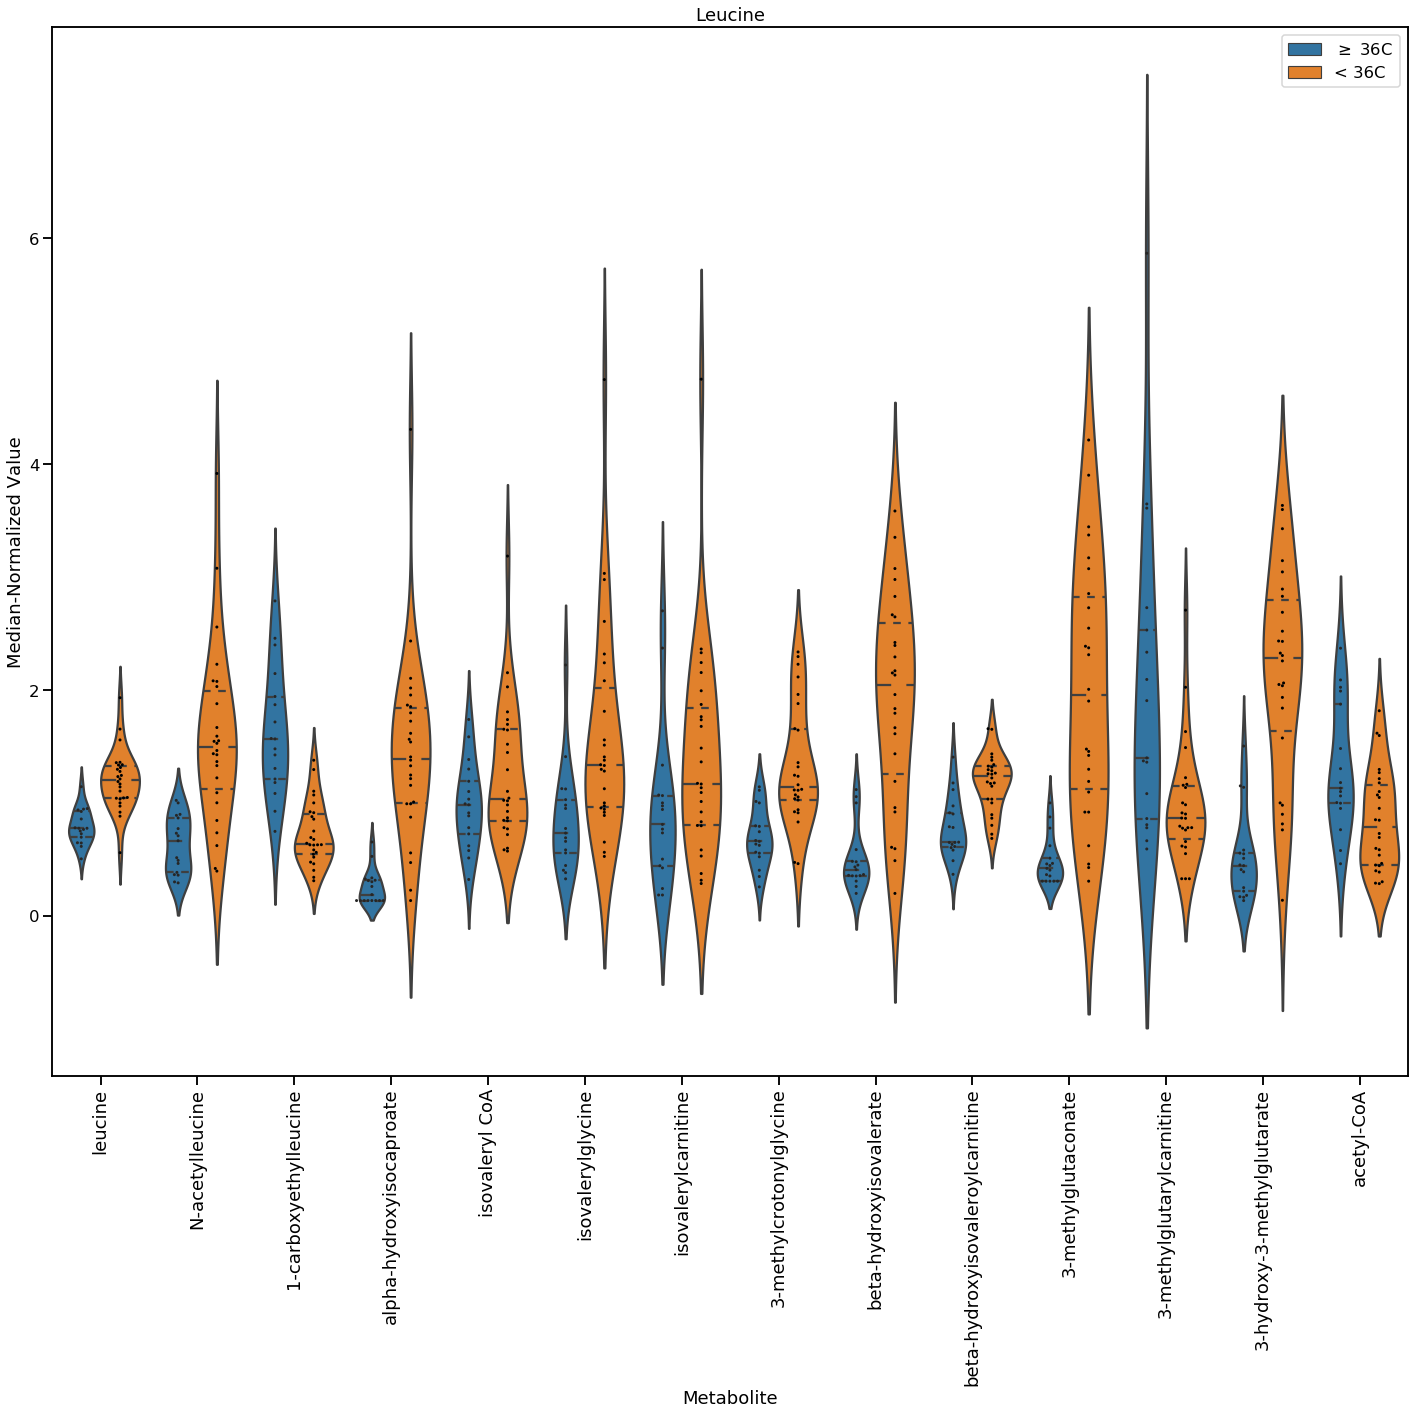

In [65]:
plot_violin_metabs(df_6, 36,90,'Leucine',(20,20),3,'../processed/violin_Leucine.png')

In [66]:
perform_ttests(df_6, 36)

['leucine', 1.117167541407469e-06]
['N-acetylleucine', 2.345450629562326e-05]
['1-carboxyethylleucine', 1.6204568762058436e-08]
['alpha-hydroxyisocaproate', 5.382087700560484e-07]
['isovaleryl CoA', 0.09385433060600673]
['isovalerylglycine', 0.00438982315101389]
['isovalerylcarnitine', 0.07311888378610121]
['3-methylcrotonylglycine', 4.594394617036822e-05]
['beta-hydroxyisovalerate', 2.894803943597478e-07]
['beta-hydroxyisovaleroylcarnitine', 1.0982684206132297e-05]
['3-methylglutaconate', 2.7035383868077147e-06]
['3-methylglutarylcarnitine', 0.0018311966676950958]
['3-hydroxy-3-methylglutarate', 3.819347975497716e-08]
['acetyl-CoA', 0.004165862650151089]
['Final_Temp', 5.1820617594654956e-11]


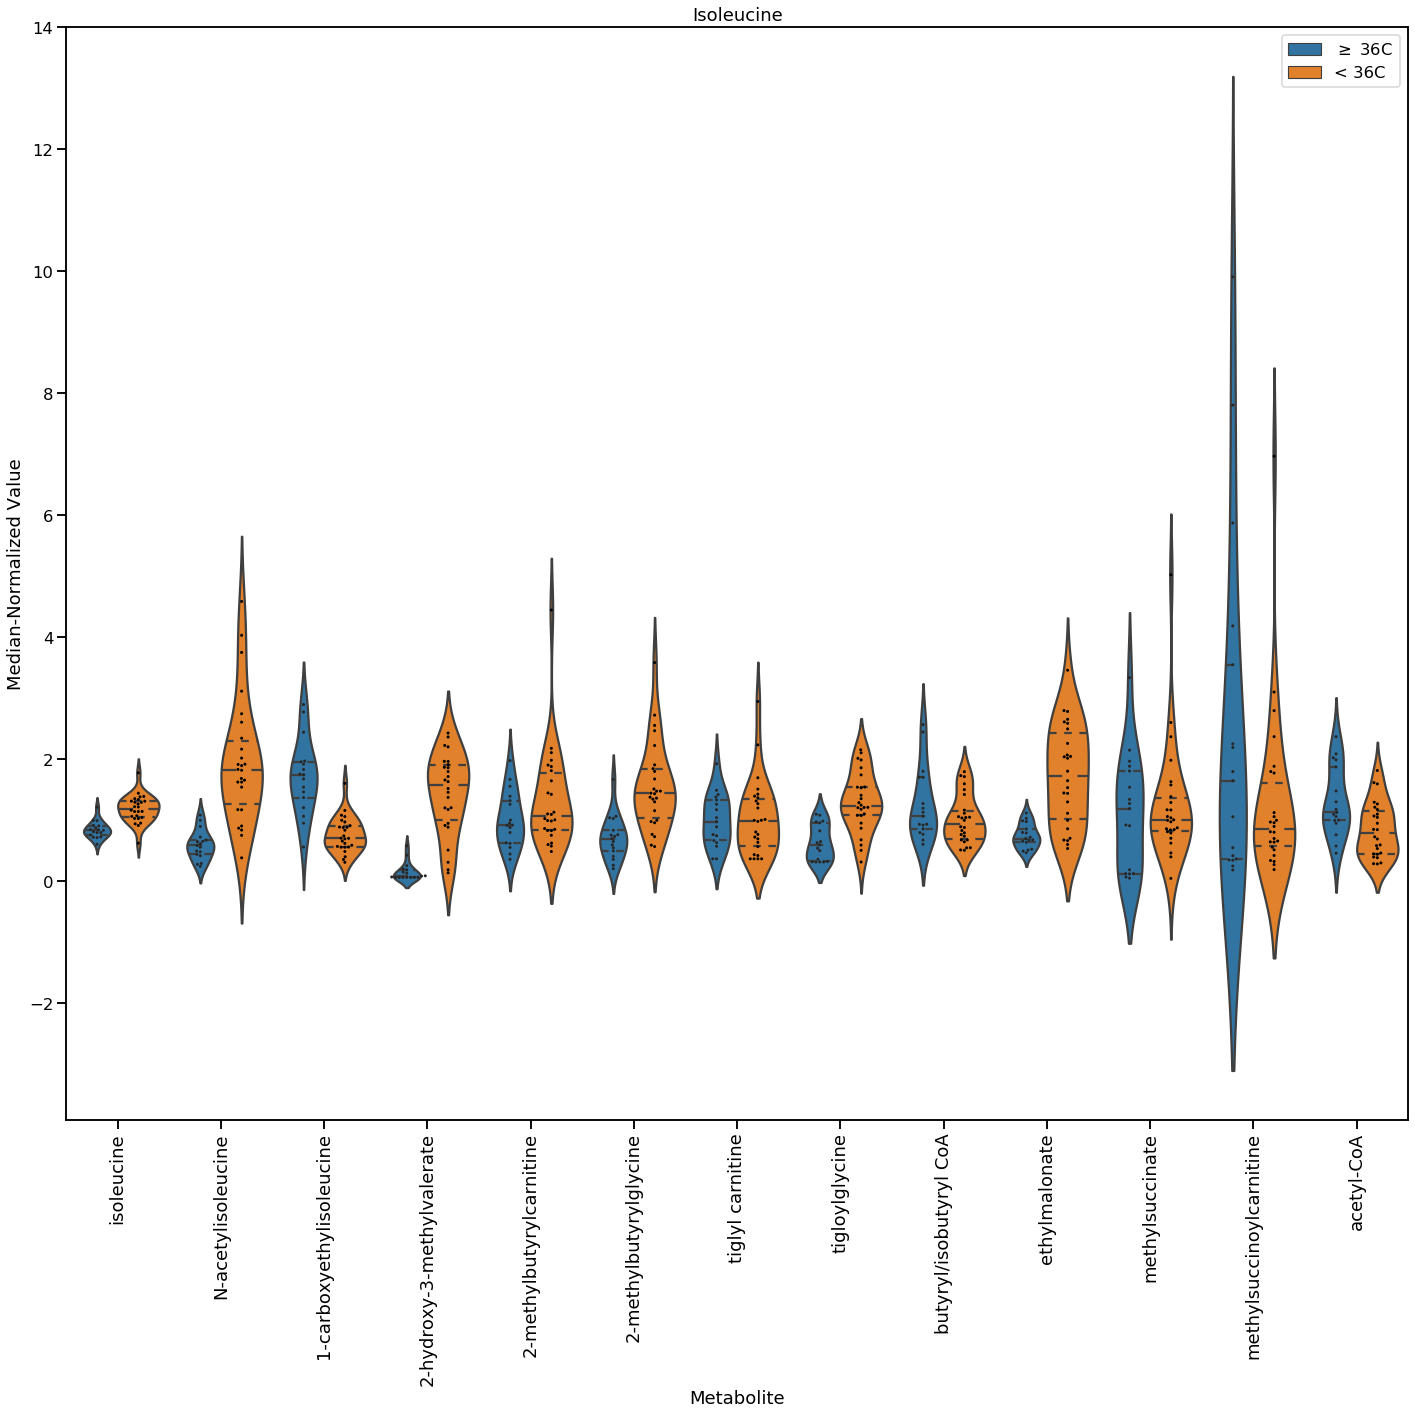

In [67]:
plot_violin_metabs(df_7, 36,90,'Isoleucine',(20,20),3,'../processed/violin_Isoleucine.png')

In [68]:
perform_ttests(df_7, 36)

['isoleucine', 1.214667539194219e-06]
['N-acetylisoleucine', 3.3263107810002256e-06]
['1-carboxyethylisoleucine', 2.43911318052321e-08]
['2-hydroxy-3-methylvalerate', 9.722538602156396e-10]
['2-methylbutyrylcarnitine', 0.15429565471716444]
['2-methylbutyrylglycine', 5.824296542700036e-05]
['tiglyl carnitine', 0.8472926153869389]
['tigloylglycine', 1.1258765068687219e-05]
['butyryl/isobutyryl CoA', 0.10633060313613373]
['ethylmalonate', 1.7149194795010757e-05]
['methylsuccinate', 0.6526978265740371]
['methylsuccinoylcarnitine', 0.07061314177933667]
['acetyl-CoA', 0.004165862650151089]
['Final_Temp', 5.1820617594654956e-11]


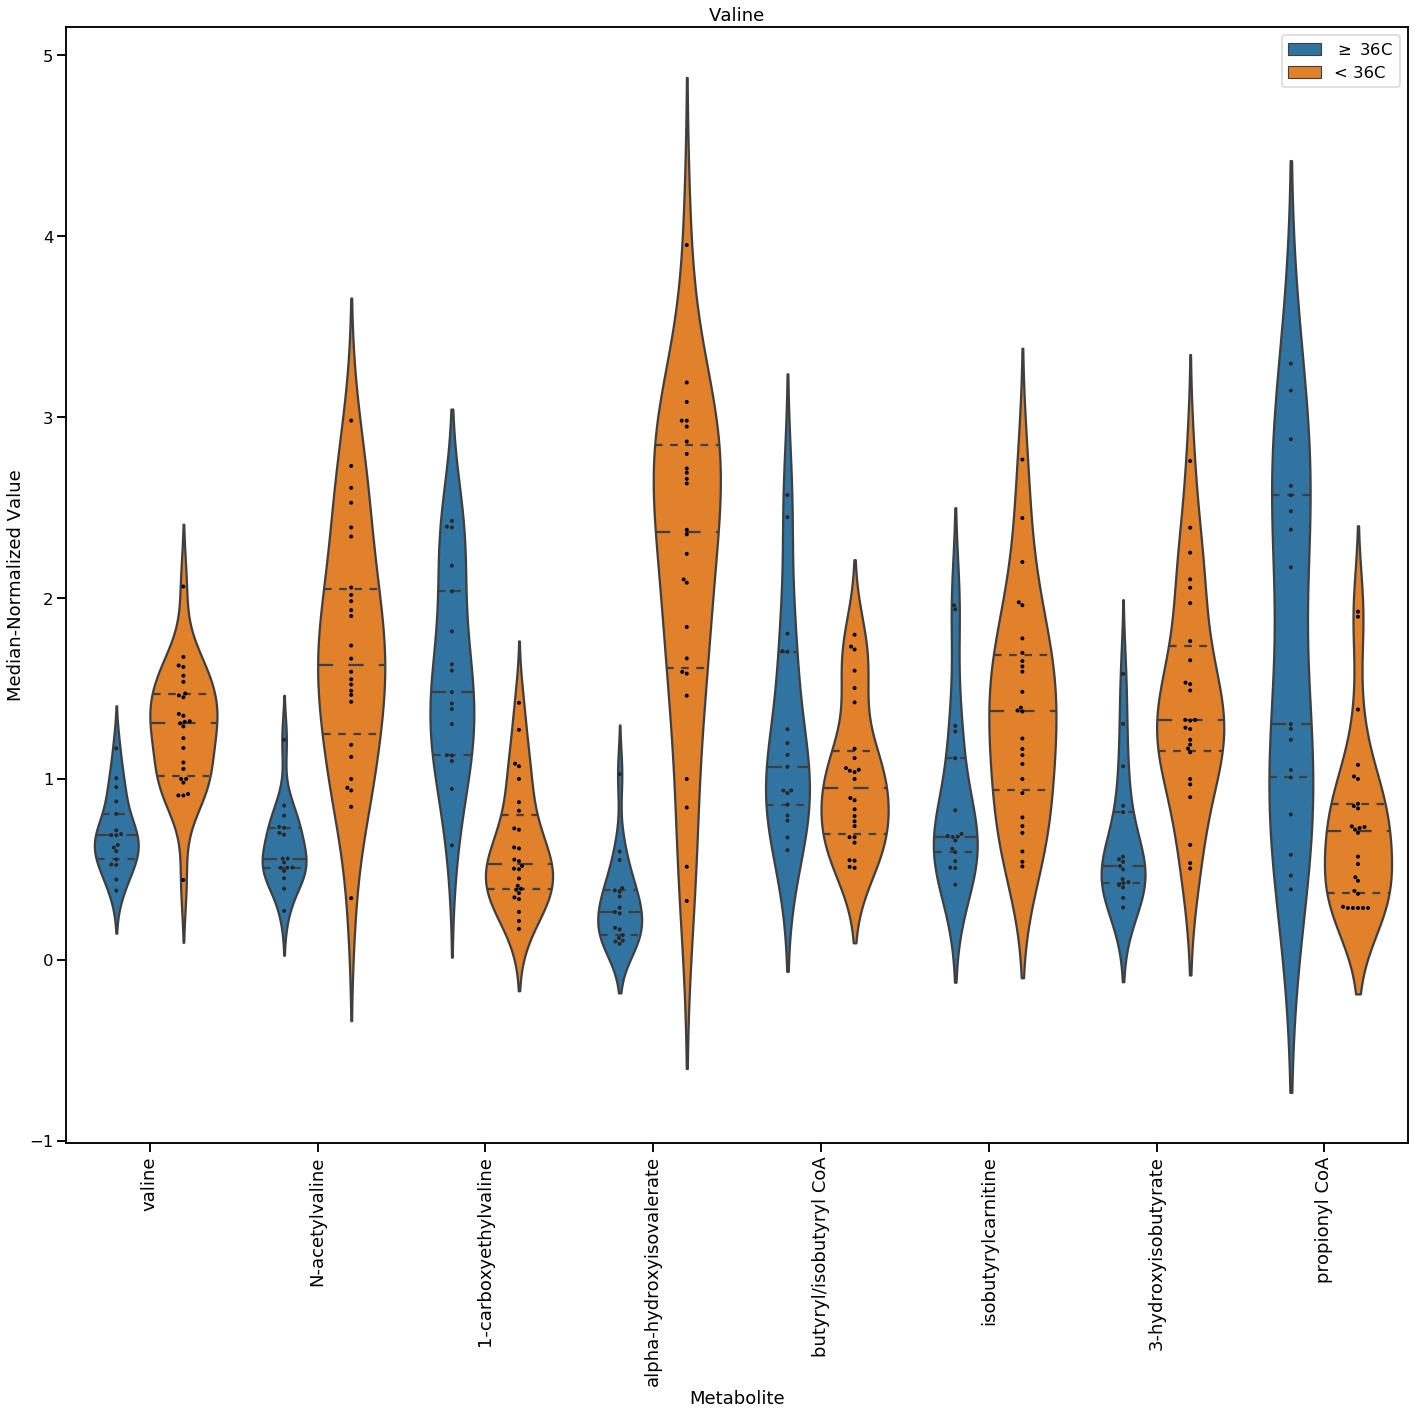

In [69]:
plot_violin_metabs(df_8, 36,90,'Valine',(20,20),4,'../processed/violin_valine.png')

In [70]:
perform_ttests(df_8, 36)

['valine', 1.2544584647726783e-07]
['N-acetylvaline', 5.55118616791973e-08]
['1-carboxyethylvaline', 6.924723855875618e-09]
['alpha-hydroxyisovalerate', 1.1702653477071725e-10]
['butyryl/isobutyryl CoA', 0.10633060313613373]
['isobutyrylcarnitine', 0.006298850755219846]
['3-hydroxyisobutyrate', 8.872829423746513e-06]
['propionyl CoA', 4.5241214292178955e-05]
['Final_Temp', 5.1820617594654956e-11]


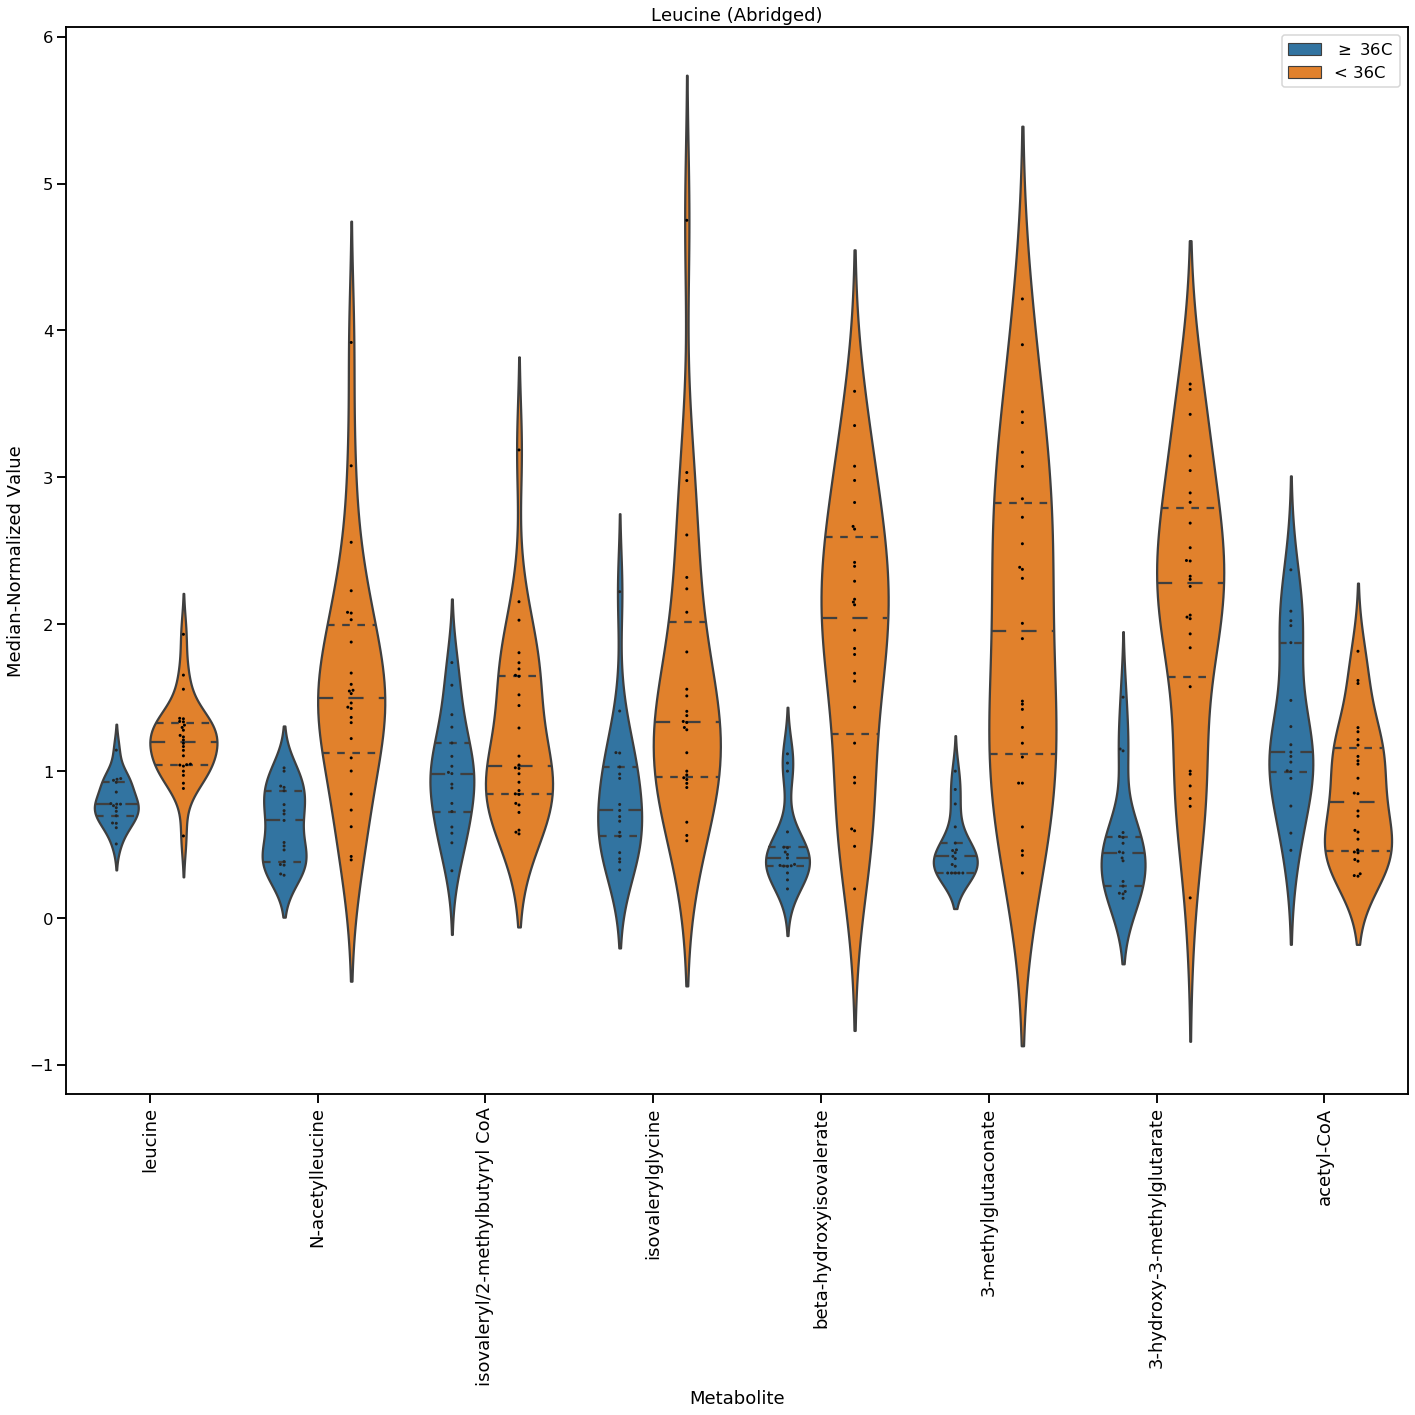

In [71]:
plot_violin_metabs(df_9, 36,90,'Leucine (Abridged)',(20,20),3,'../processed/violin_Leucine_abrdiged.png')

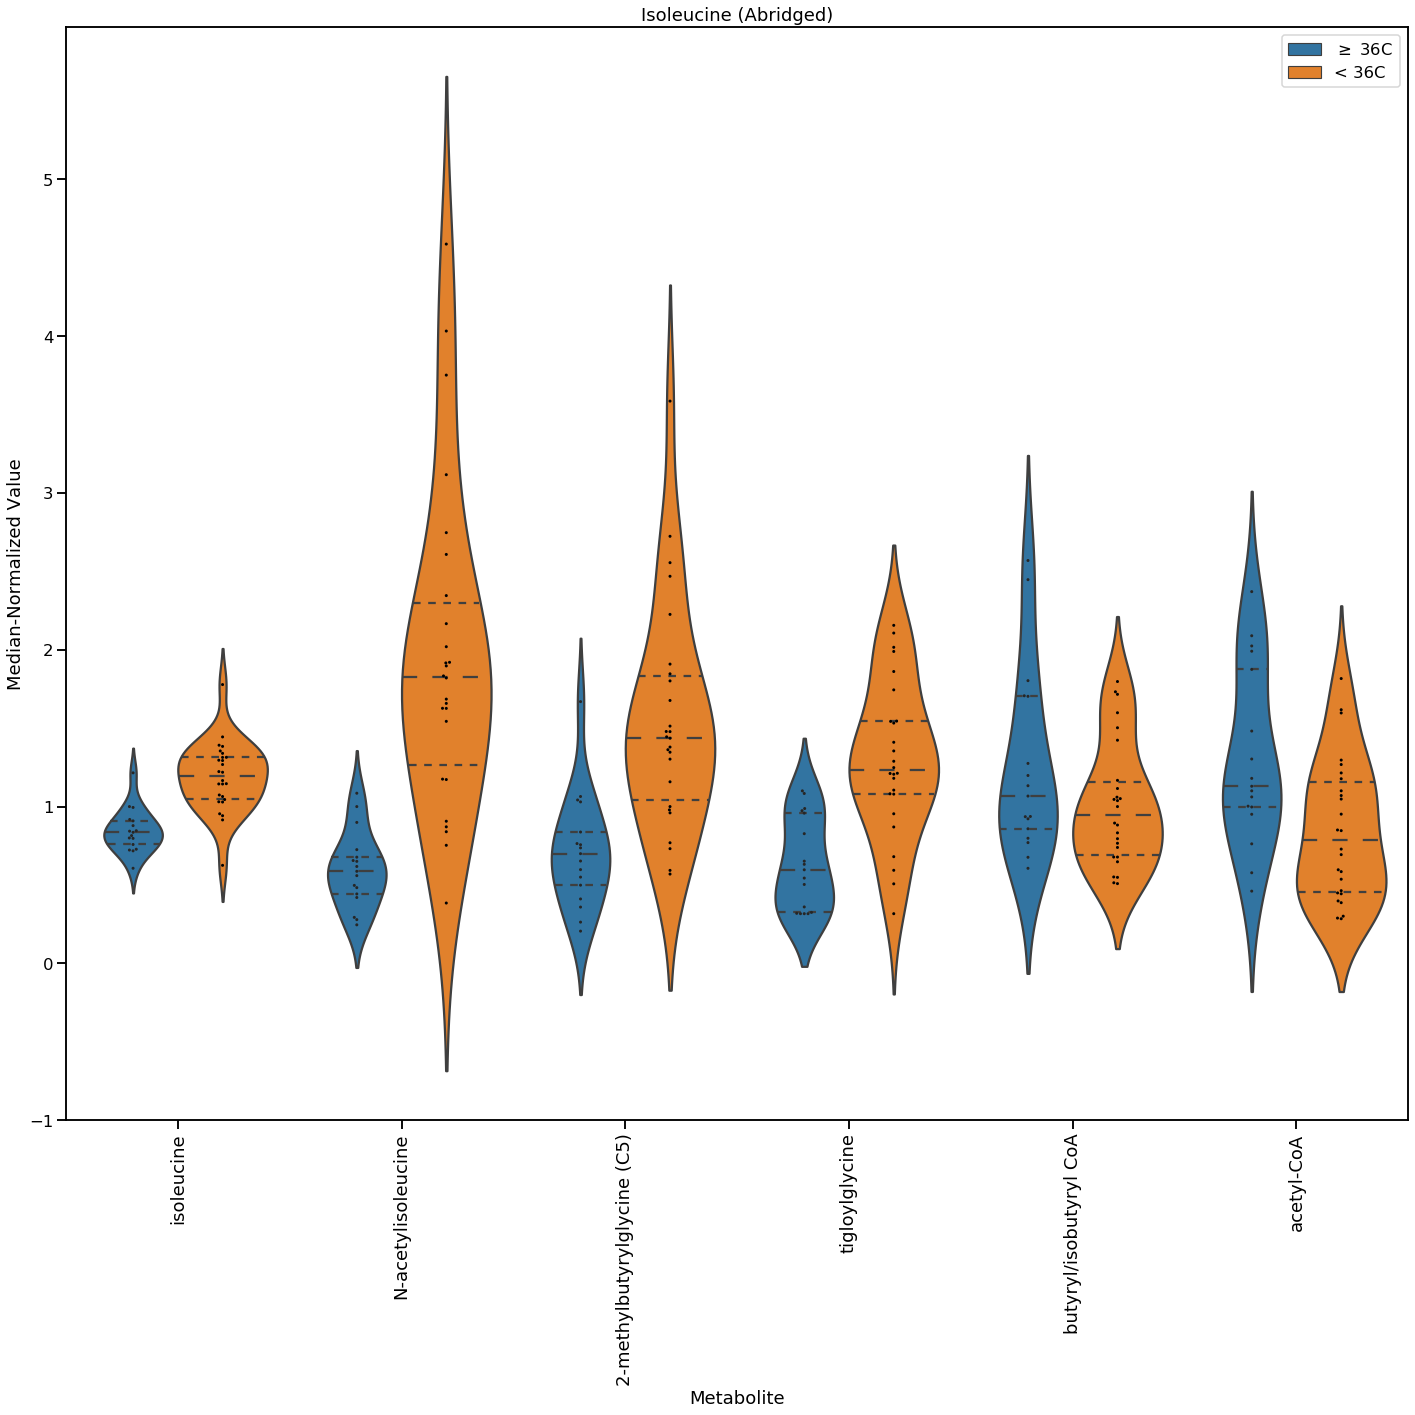

In [72]:
plot_violin_metabs(df_10, 36,90,'Isoleucine (Abridged)',(20,20),3,'../processed/violin_Isoleucine_abridged.png')

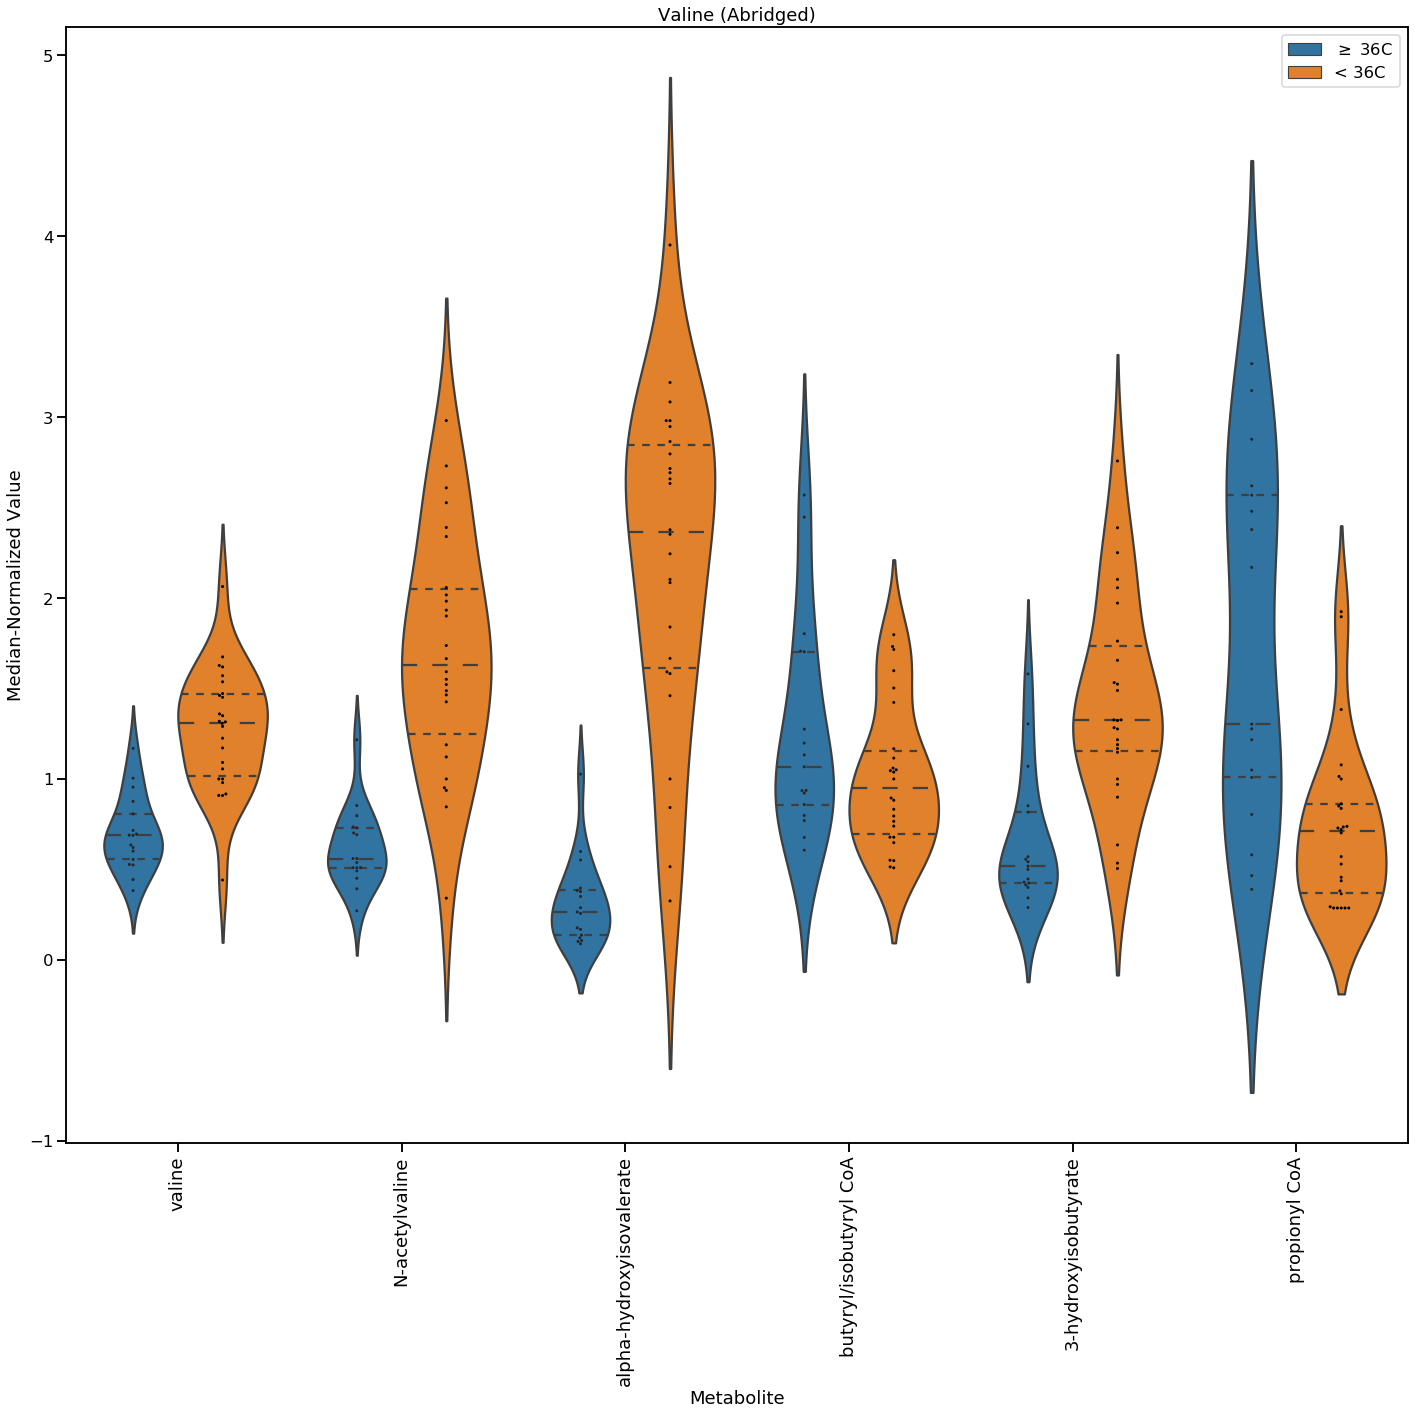

In [73]:
plot_violin_metabs(df_11, 36,90,'Valine (Abridged)',(20,20),3,'../processed/violin_valine_abridged.png')

## NAD Recycling

In [74]:
# repeat for NAD 
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling)


leucine
isoleucine
valine
threonine
hydroxyproline
alpha-hydroxyisocaproate
alpha-hydroxyisovalerate
alpha-ketobutyrate
glutamine
glutamate
alpha-ketoglutarate
2-hydroxybutyrate/2-hydroxyisobutyrate
2S,3R-dihydroxybutyrate
2R,3R-dihydroxybutyrate
citrate
malate
stearate (18:0)
methionine
cysteine
phenylalanine
[397, 376, 566, 564, 1001, 100000706, 100001300, 796, 563, 561, 93, 100008928, 100002284, 100002367, 1124, 409, 439, 415, 800, 460]


In [75]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling
df_NAD['Final_Temp'] = merged_data['Final_Temp']

C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\amisr\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


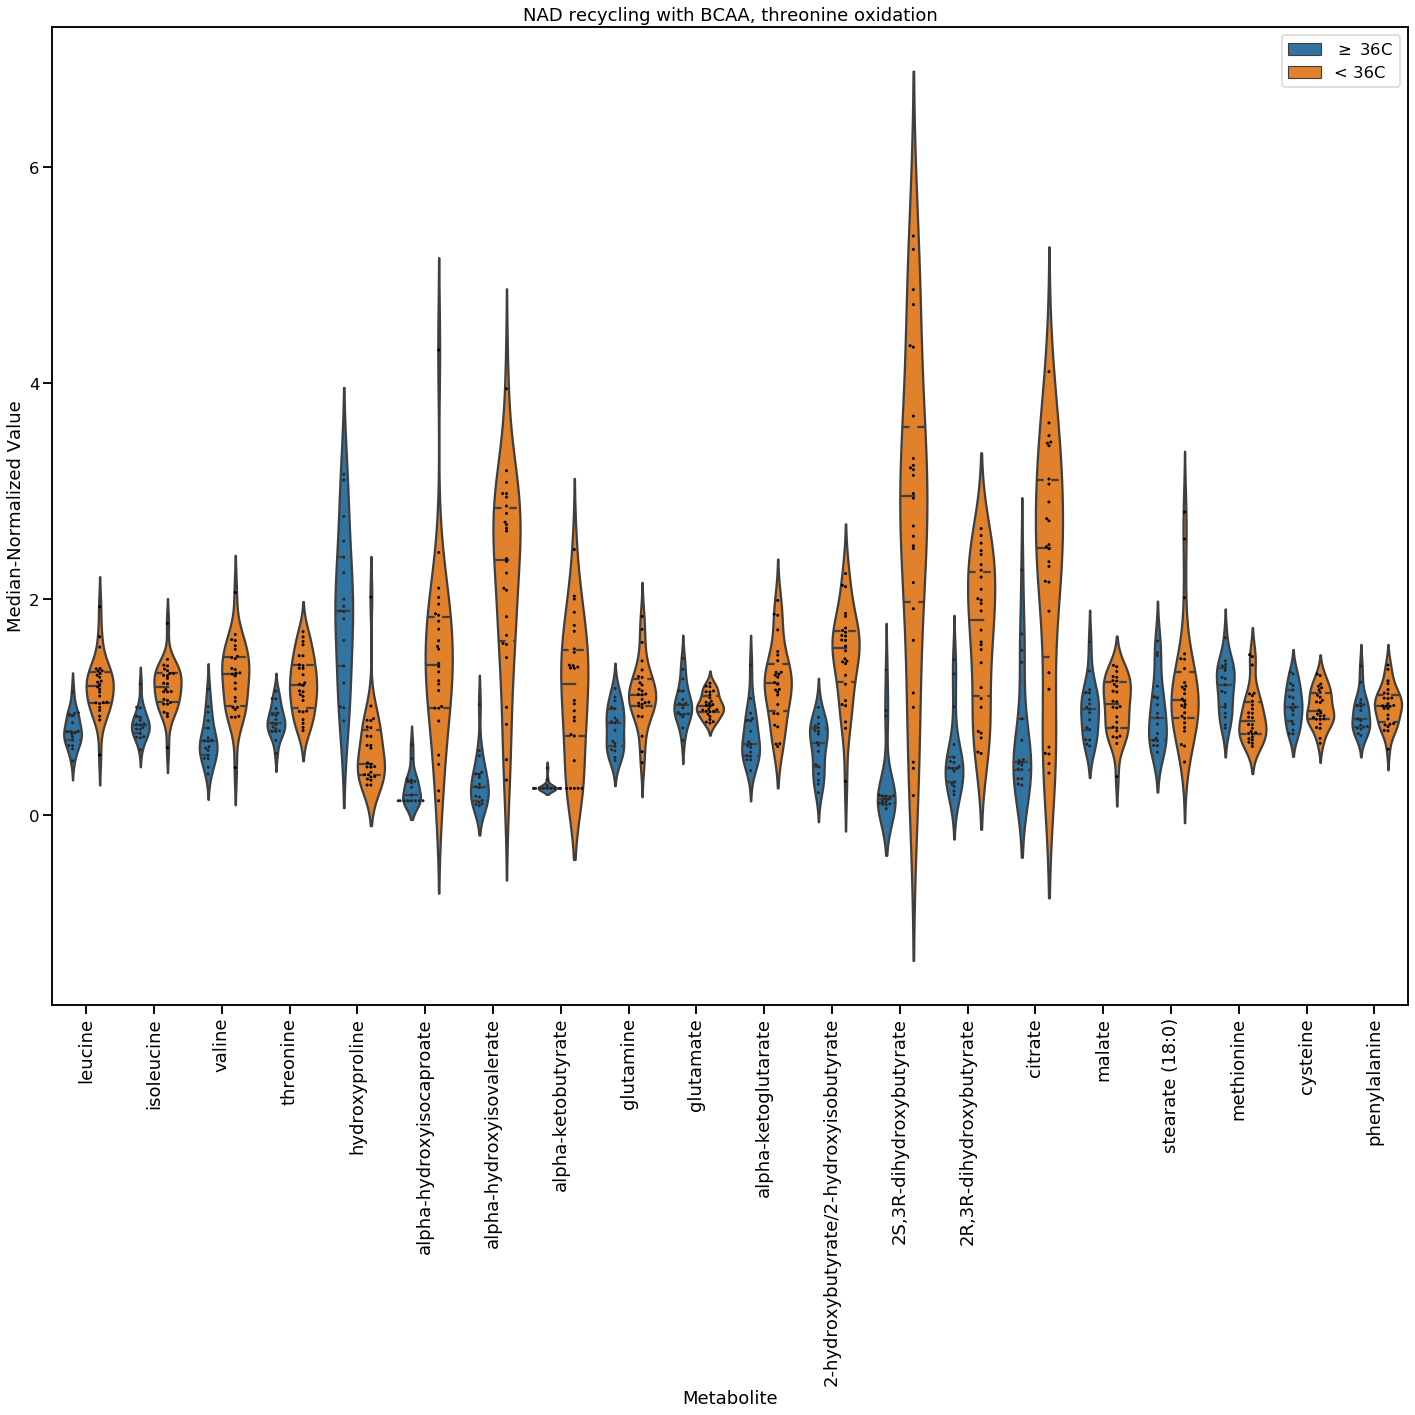

In [76]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling with BCAA, threonine oxidation',(20,20),3,'../processed/violin_NADrecycling.png')

In [77]:
perform_ttests(df_NAD,36)

['leucine', 1.117167541407469e-06]
['isoleucine', 1.214667539194219e-06]
['valine', 1.2544584647726783e-07]
['threonine', 1.940051850842408e-05]
['hydroxyproline', 6.169155894855151e-10]
['alpha-hydroxyisocaproate', 5.382087700560484e-07]
['alpha-hydroxyisovalerate', 1.1702653477071725e-10]
['alpha-ketobutyrate', 1.088443850343693e-06]
['glutamine', 0.0004656514715169759]
['glutamate', 0.6815664395423436]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['2-hydroxybutyrate/2-hydroxyisobutyrate', 9.177280325465202e-09]
['2S,3R-dihydroxybutyrate', 1.942138498576262e-08]
['2R,3R-dihydroxybutyrate', 1.3215517306879776e-07]
['citrate', 5.9254727255358994e-06]
['malate', 0.6548398186789357]
['stearate (18:0)', 0.11564165152285868]
['methionine', 0.0014051670349840692]
['cysteine', 0.7029571314625587]
['phenylalanine', 0.25159634250099944]
['Final_Temp', 5.1820617594654956e-11]


In [78]:
# repeat for NAD substrate
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling_substrate)


leucine
isoleucine
valine
threonine
glutamine
[397, 376, 566, 564, 563]


In [79]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling_substrate
df_NAD['Final_Temp'] = merged_data['Final_Temp']

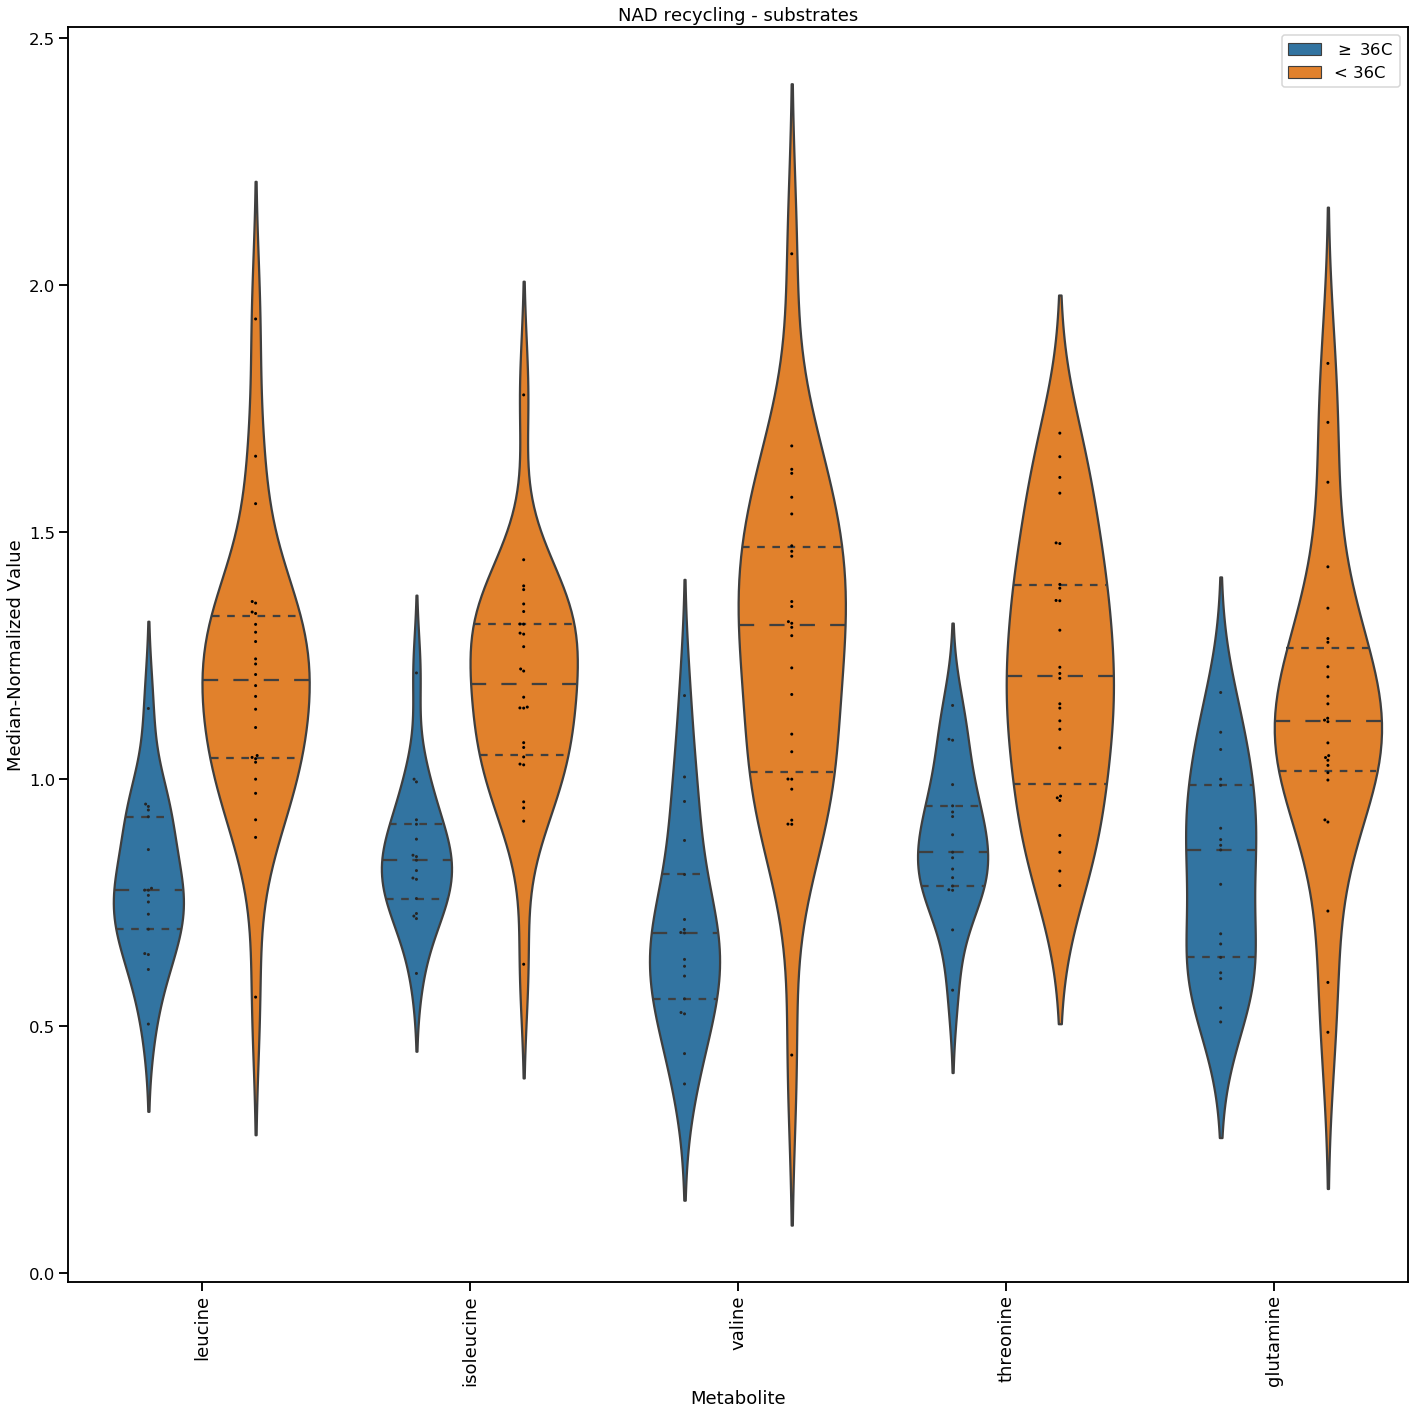

In [80]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling - substrates',(20,20),3,'../processed/violin_NADrecycling_substrate.png')

In [81]:
perform_ttests(df_NAD,36)

['leucine', 1.117167541407469e-06]
['isoleucine', 1.214667539194219e-06]
['valine', 1.2544584647726783e-07]
['threonine', 1.940051850842408e-05]
['glutamine', 0.0004656514715169759]
['Final_Temp', 5.1820617594654956e-11]


In [82]:
# repeat for NAD substrate
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling_alphaketoacids)


alpha-ketobutyrate
alpha-ketoglutarate
alpha-ketoglutaramate*
[796, 93, 100002397]


In [83]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling_alphaketoacids
df_NAD['Final_Temp'] = merged_data['Final_Temp']

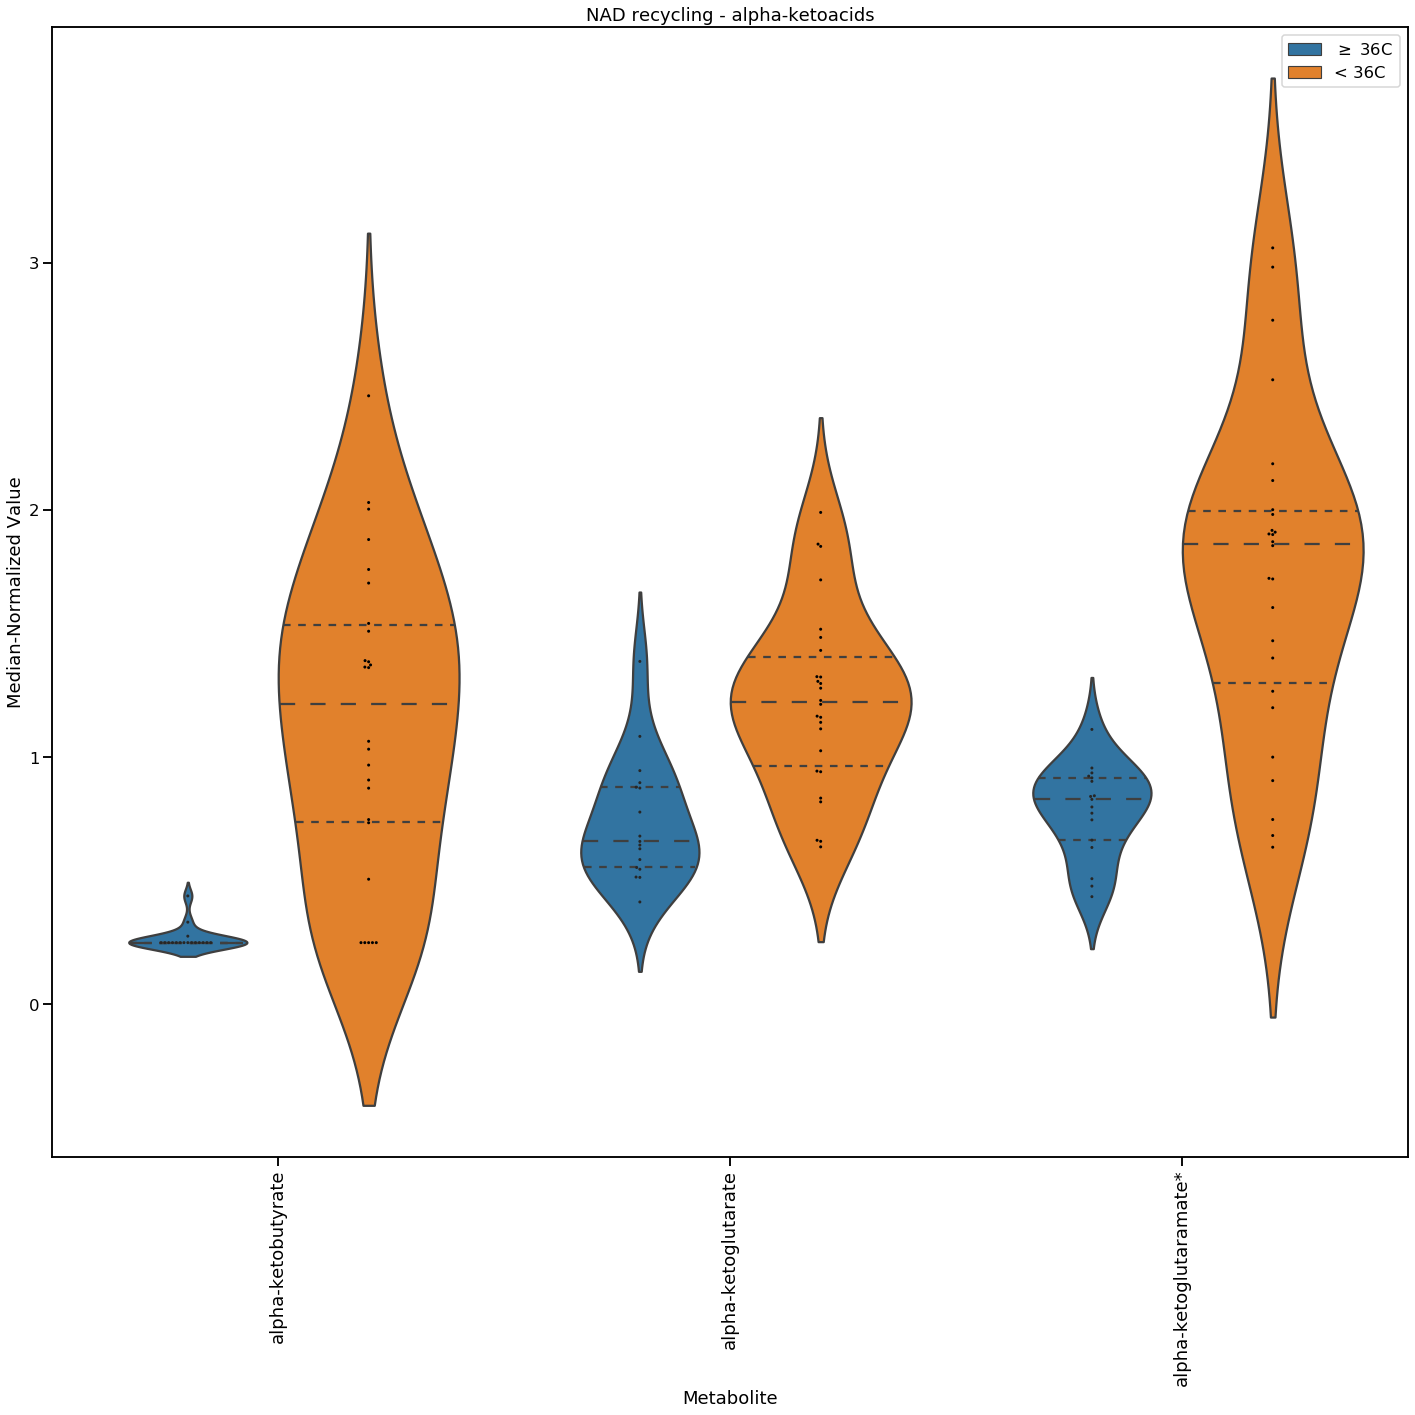

In [84]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling - alpha-ketoacids',(20,20),3,'../processed/violin_NADrecycling_alphaketoacid.png')

In [85]:
perform_ttests(df_NAD,36)

['alpha-ketobutyrate', 1.088443850343693e-06]
['alpha-ketoglutarate', 2.1451752102164346e-05]
['alpha-ketoglutaramate*', 7.210495550555053e-07]
['Final_Temp', 5.1820617594654956e-11]


In [86]:
# repeat for NAD substrate
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling_alphahydroxyacids)


alpha-hydroxyisocaproate
alpha-hydroxyisovalerate
2-hydroxybutyrate/2-hydroxyisobutyrate
2S,3R-dihydroxybutyrate
2R,3R-dihydroxybutyrate
[100000706, 100001300, 100008928, 100002284, 100002367]


In [87]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling_alphahydroxyacids
df_NAD['Final_Temp'] = merged_data['Final_Temp']

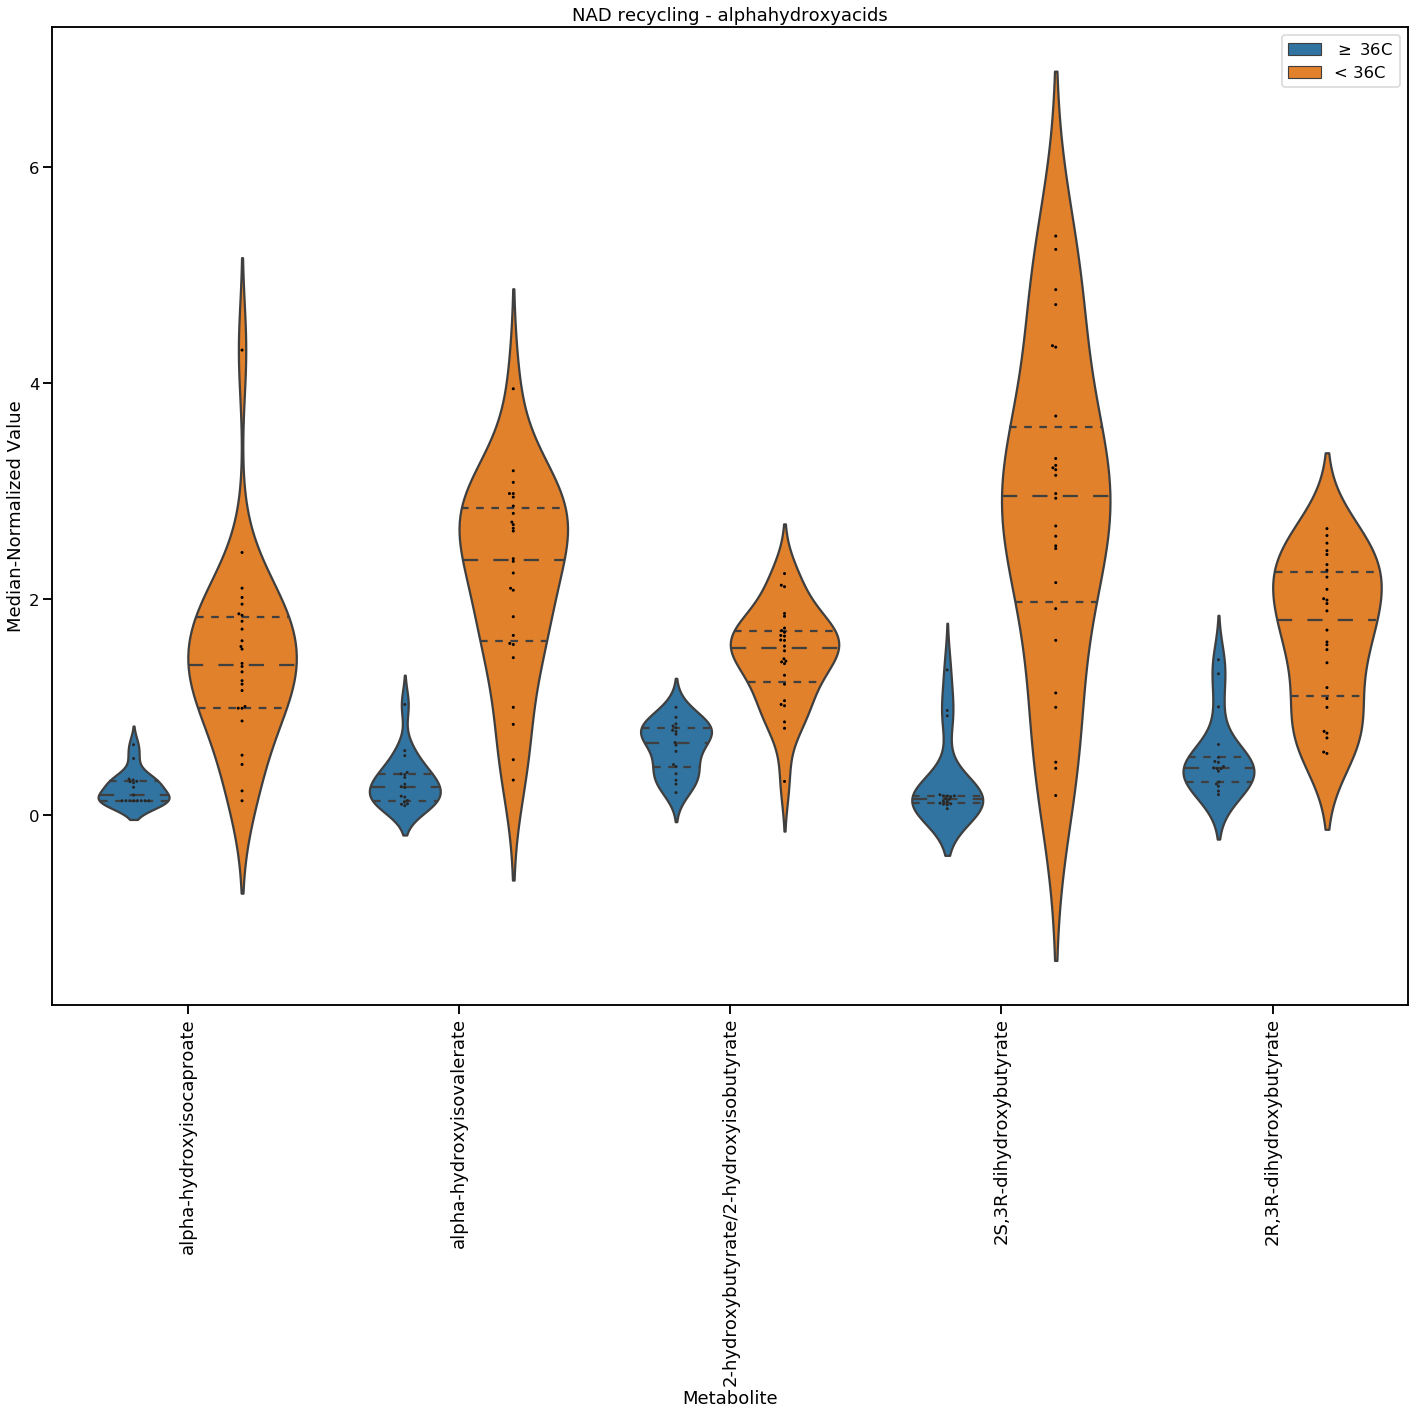

In [88]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling - alphahydroxyacids',(20,20),3,'../processed/violin_NADrecycling_alphahydroxyacid.png')

In [89]:
perform_ttests(df_NAD,36)

['alpha-hydroxyisocaproate', 5.382087700560484e-07]
['alpha-hydroxyisovalerate', 1.1702653477071725e-10]
['2-hydroxybutyrate/2-hydroxyisobutyrate', 9.177280325465202e-09]
['2S,3R-dihydroxybutyrate', 1.942138498576262e-08]
['2R,3R-dihydroxybutyrate', 1.3215517306879776e-07]
['Final_Temp', 5.1820617594654956e-11]


In [90]:
# repeat for NAD substrate
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling_products)


citrate
malate
stearate (18:0)
[1124, 409, 439]


In [91]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling_products
df_NAD['Final_Temp'] = merged_data['Final_Temp']

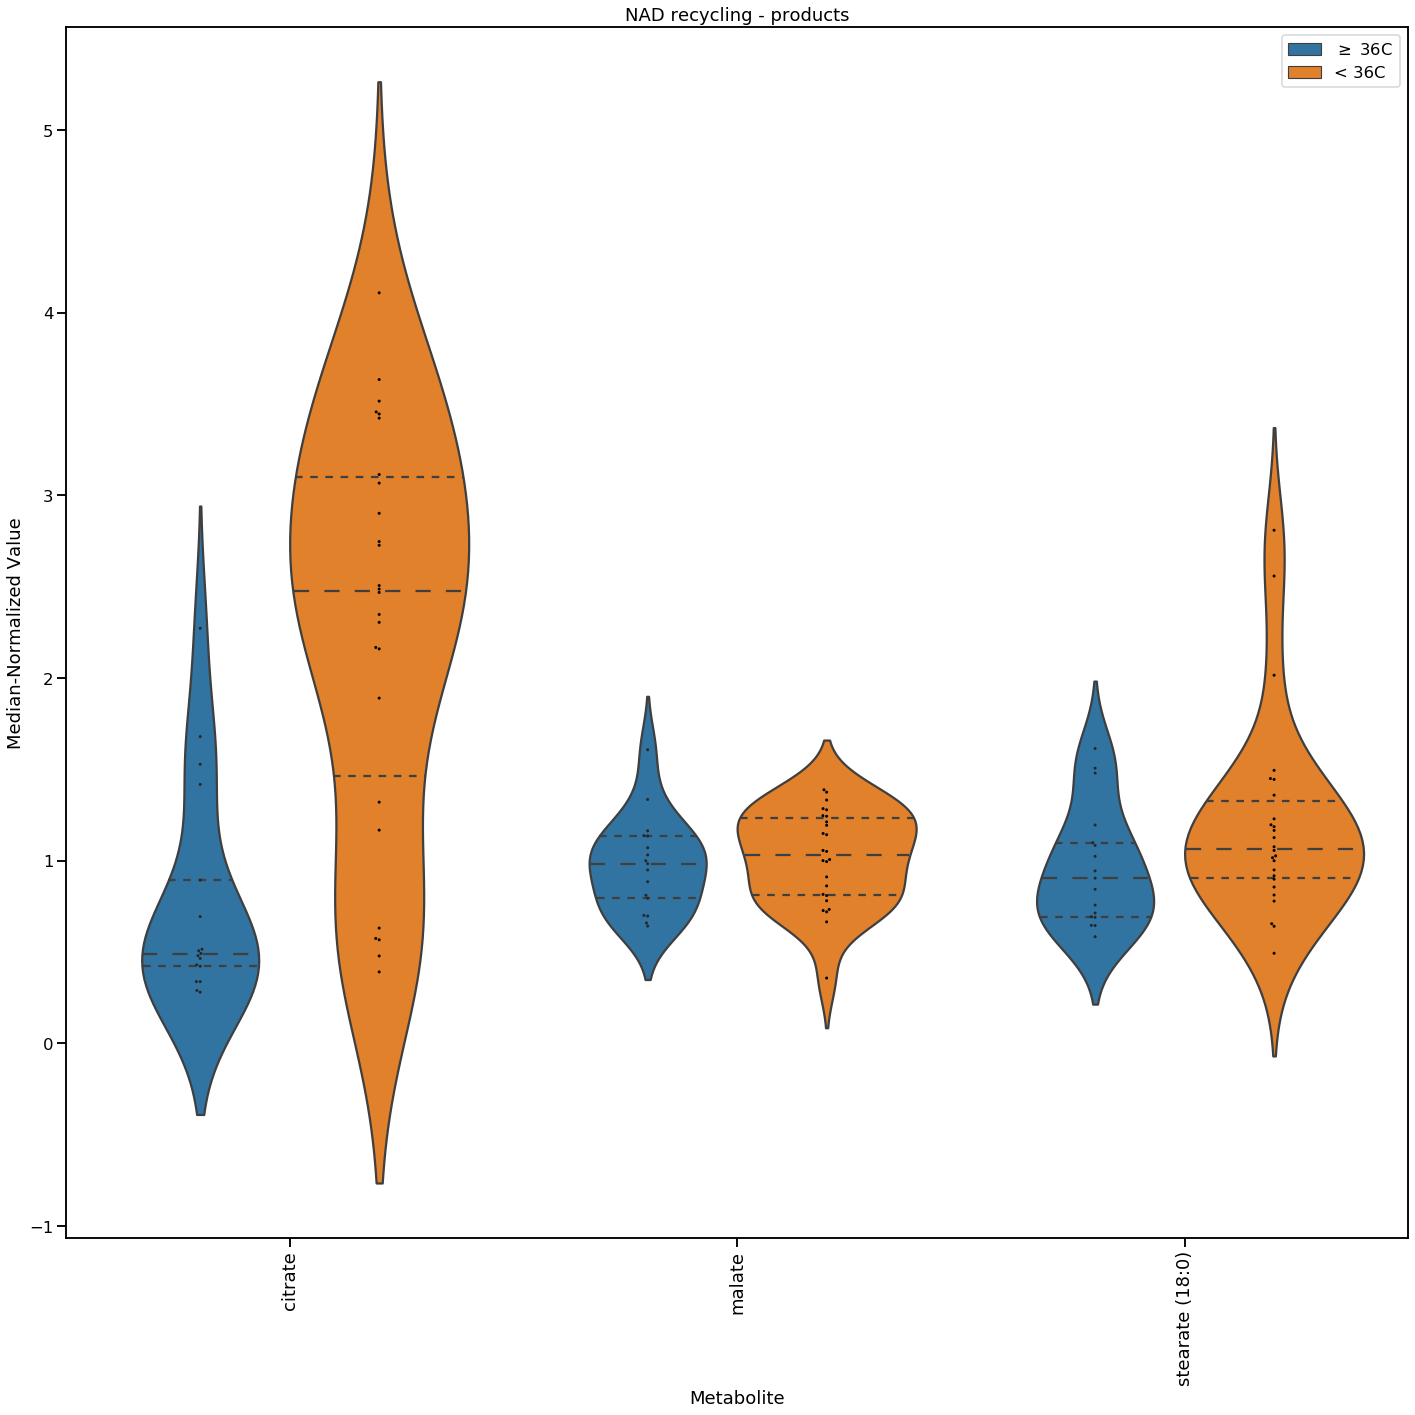

In [92]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling - products',(20,20),3,'../processed/violin_NADrecycling_products.png')

In [93]:
perform_ttests(df_NAD,36)

['citrate', 5.9254727255358994e-06]
['malate', 0.6548398186789357]
['stearate (18:0)', 0.11564165152285868]
['Final_Temp', 5.1820617594654956e-11]


In [94]:
# repeat for NAD substrate
chemID_NAD = get_chemIDlist(metab_def, NAD_recycling_substrateHydroxyAcids)


leucine
isoleucine
valine
threonine
glutamine
alpha-hydroxyisocaproate
alpha-hydroxyisovalerate
2-hydroxybutyrate/2-hydroxyisobutyrate
2S,3R-dihydroxybutyrate
2R,3R-dihydroxybutyrate
[397, 376, 566, 564, 563, 100000706, 100001300, 100008928, 100002284, 100002367]


In [95]:
df_NAD = merged_data.loc[:,chemID_NAD]
df_NAD.columns = NAD_recycling_substrateHydroxyAcids
df_NAD['Final_Temp'] = merged_data['Final_Temp']

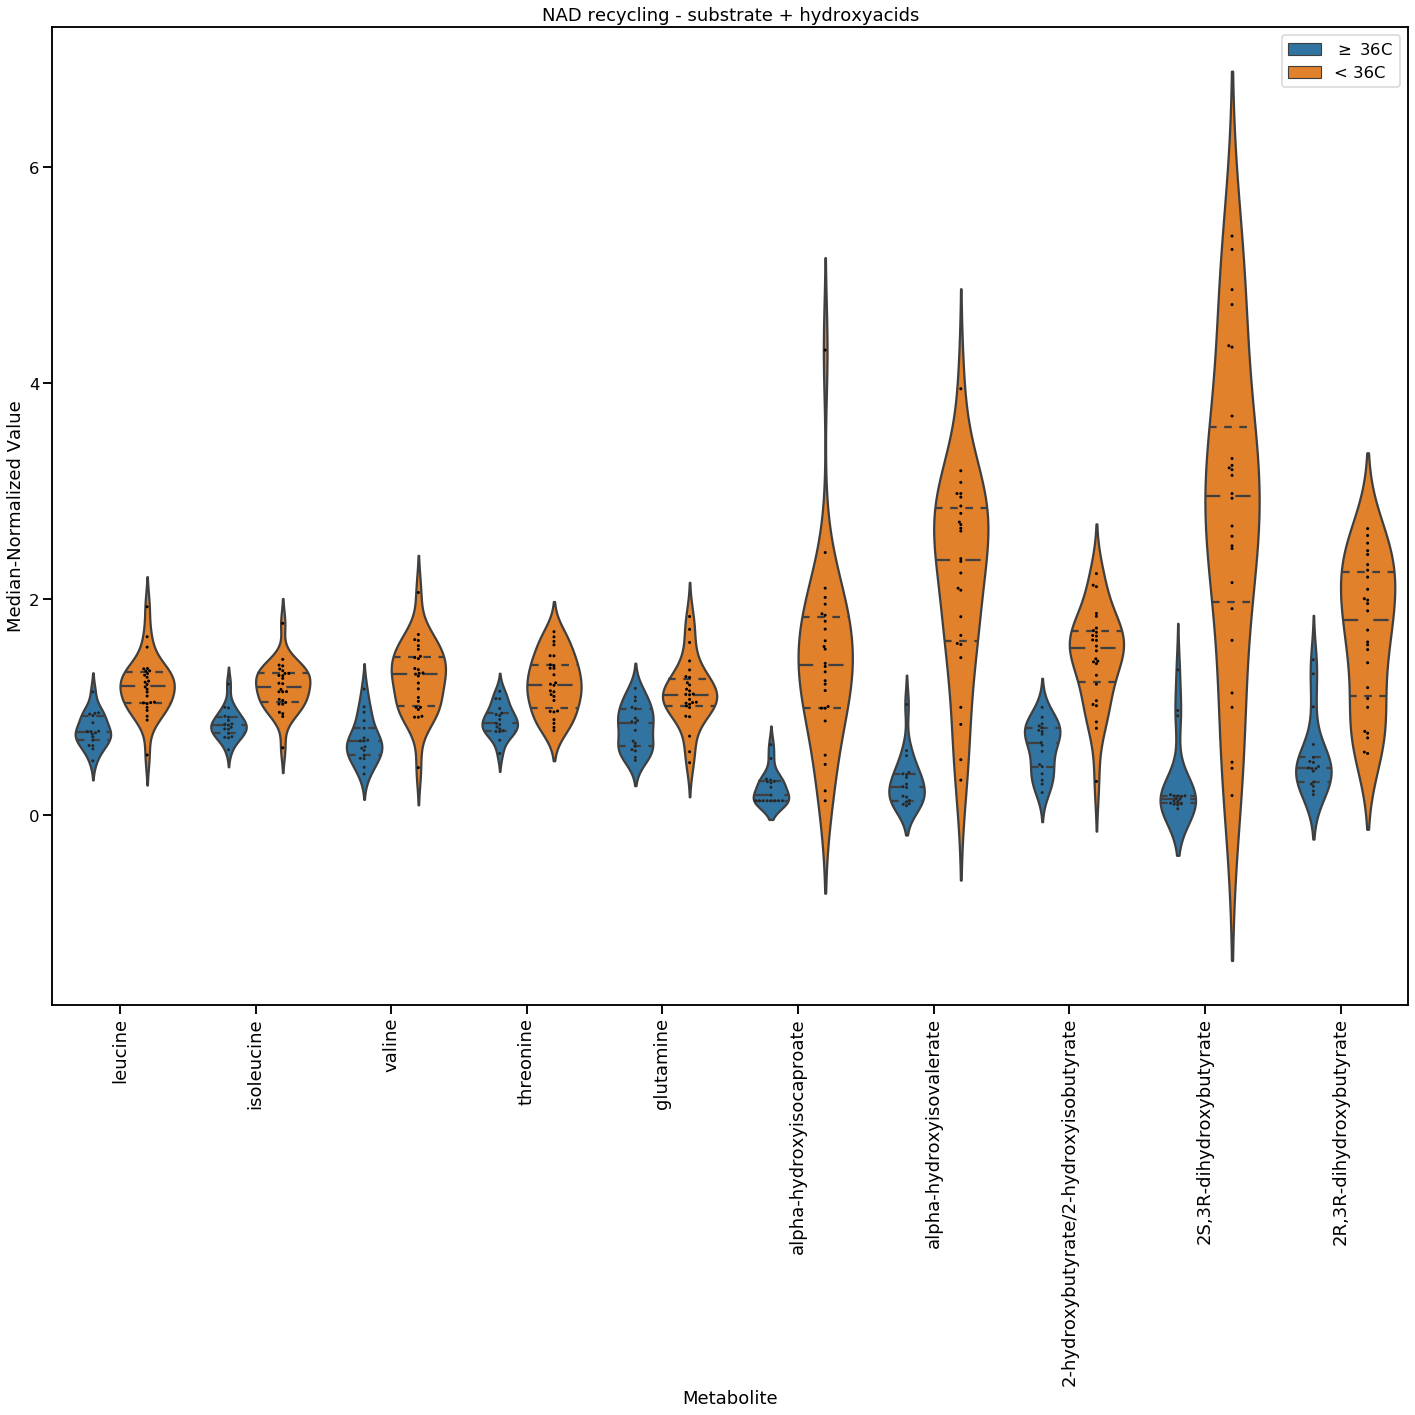

In [96]:
plot_violin_metabs(df_NAD, 36,90,'NAD recycling - substrate + hydroxyacids',(20,20),3,'../processed/violin_NADrecycling_substrateHydroxyacids.png')

In [97]:
perform_ttests(df_NAD,36)

['leucine', 1.117167541407469e-06]
['isoleucine', 1.214667539194219e-06]
['valine', 1.2544584647726783e-07]
['threonine', 1.940051850842408e-05]
['glutamine', 0.0004656514715169759]
['alpha-hydroxyisocaproate', 5.382087700560484e-07]
['alpha-hydroxyisovalerate', 1.1702653477071725e-10]
['2-hydroxybutyrate/2-hydroxyisobutyrate', 9.177280325465202e-09]
['2S,3R-dihydroxybutyrate', 1.942138498576262e-08]
['2R,3R-dihydroxybutyrate', 1.3215517306879776e-07]
['Final_Temp', 5.1820617594654956e-11]


## Create nested pie plots

In [98]:
metab_def.head()

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0               1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1               1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2               4283                     (3'-5')-adenylylcytidine   
3               4288                   (3'-5')-cytidylylcytidine*   
4               1919                (R)-3-hydroxybutyrylcarnitine   

  SUPER PATHWAY                                      SUB PATHWAY  COMP ID  \
0         Lipid                             Fatty Acid, Branched    38768   
1         Lipid                             Fatty Acid, Branched    38296   
2    Nucleotide                                     Dinucleotide    52753   
3    Nucleotide                                     Dinucleotide    62397   
4         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   

          PLATFORM  CHEMICAL ID      RI      MASS         HMDB        PUBCHEM  
0        LC/MS Neg    100002945  5695.0  269.2487  HMDB0061859  8181;17903417  
1        LC/MS Neg    100002356  5993.0  297.2799  HMDB0037397        3083779  
2        LC/MS Neg    100009062  1920.0  571.1308          NaN       10875494  
3        LC/MS Neg    100020727  1472.0  547.1195          NaN          94237  
4  LC/MS Pos Early    100003926  2400.0  248.1493  HMDB0013127       53481617

In [99]:
metab_def_2 = metab_def[['SUPER PATHWAY','SUB PATHWAY']]
# metab_def_2 = metab_def_2.groupby(['BIOCHEMICAL',''])
metab_def_2 = metab_def_2.groupby(['SUPER PATHWAY','SUB PATHWAY']).size().reset_index()
# metab_def_2.columns.rename({'0':'num_metabs'})
metab_def_2.head()

SUPER PATHWAY                               SUB PATHWAY   0
0    Amino Acid          Alanine and Aspartate Metabolism   6
1    Amino Acid                       Creatine Metabolism   4
2    Amino Acid                      Glutamate Metabolism  10
3    Amino Acid                    Glutathione Metabolism  13
4    Amino Acid  Glycine, Serine and Threonine Metabolism  12

In [100]:
labels = metab_def_2['SUPER PATHWAY'].unique()
size=0.3
vals = metab_def_2[0]
print(labels)
group_sum = metab_def_2.groupby('SUPER PATHWAY')[0].sum()
print(group_sum)
facecolor = 'white'
font_color = 'black'
hfont = {'fontname':'Arial'}

['Amino Acid' 'Carbohydrate' 'Cofactors and Vitamins' 'Energy' 'Lipid'
 'Nucleotide' 'Partially Characterized Molecules' 'Peptide' 'Xenobiotics']
SUPER PATHWAY
Amino Acid                           207
Carbohydrate                          51
Cofactors and Vitamins                51
Energy                                14
Lipid                                431
Nucleotide                            66
Partially Characterized Molecules      2
Peptide                               33
Xenobiotics                           62
Name: 0, dtype: int64


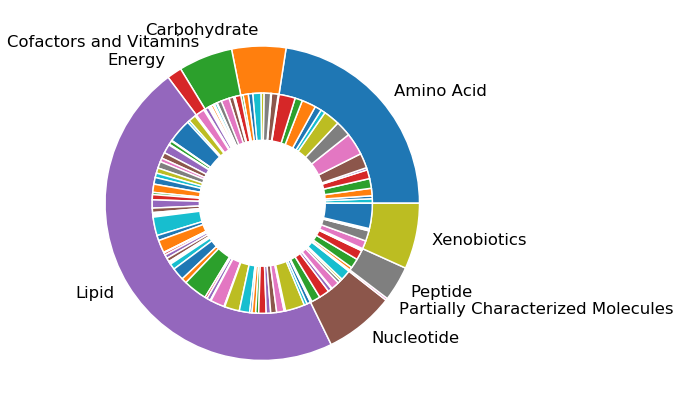

In [101]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)
ax.pie(group_sum, radius=1, labels = labels, textprops={'color':font_color},
      wedgeprops=dict(width=size, edgecolor='w'))
ax.pie(vals, radius=1-size, wedgeprops=dict(width=size,edgecolor='w'))
plt.tight_layout()
plt.savefig('../processed/plot_metabolite_definitions.png')
plt.show()

# Make heatmap of GSEA enriched pathways
2022/02/20: Need to make metabolites in order by p-value of pathway they belong to

In [102]:
df_gsea = df_gsea.sort_values(by='NES',ascending=False)
df_gsea

Pathway  Num_Metabs       NES  \
11                                   Monoacylglycerol          19  0.685676   
0                                Food Component/Plant          34  0.557391   
5                           Fatty Acid, Dicarboxylate          25  0.496951   
30  Glycolysis, Gluconeogenesis, and Pyruvate Meta...          11  0.479330   
3           Leucine, Isoleucine and Valine Metabolism          30  0.420105   
29               Fatty Acid Metabolism (Acyl Glycine)          11  0.418623   
9                            Phosphatidylcholine (PC)          20  0.391472   
14                            Fatty Acid, Monohydroxy          17  0.372614   
31         Pyrimidine Metabolism, Cytidine containing          11  0.364539   
28                                Benzoate Metabolism          11  0.363335   
21                             Glutathione Metabolism          13  0.355939   
19                          Gamma-glutamyl Amino Acid          13  0.339602   
13  Long Chain Polyunsaturated Fatty Acid (n3 and n6)          17  0.332288   
4                                      Sphingomyelins          26  0.331909   
10                               Histidine Metabolism          20  0.314604   
2                                      Diacylglycerol          32  0.309605   
16           Pyrimidine Metabolism, Uracil containing          14  0.299003   
26  Fatty Acid Metabolism (Acyl Carnitine, Polyuns...          11  0.292093   
20                                          Dipeptide          13  0.273570   
25  Purine Metabolism, (Hypo)Xanthine/Inosine cont...          12  0.272007   
15              Purine Metabolism, Adenine containing          14  0.271872   
22                                    Endocannabinoid          12  0.270442   
1                                    Lysophospholipid          32  0.268573   
24                                          TCA Cycle          12  0.262431   
23           Glycine, Serine and Threonine Metabolism          12  0.256906   
8                                   Lysine Metabolism          21  0.256324   
17                      Phosphatidylethanolamine (PE)          14  0.225360   
7    Methionine, Cysteine, SAM and Taurine Metabolism          22  0.201676   
6         Urea cycle; Arginine and Proline Metabolism          22  0.156729   
18                                           Chemical          14  0.155039   
27             Nicotinate and Nicotinamide Metabolism          11  0.150612   
12                              Tryptophan Metabolism          19  0.147404   

     p-value  
11  0.001560  
0   0.000848  
5   0.001116  
30  0.001401  
3   0.000885  
29  0.001431  
9   0.000885  
14  0.001138  
31  0.001156  
28  0.001320  
21  0.001208  
19  0.001134  
13  0.001532  
4   0.000930  
10  0.000945  
2   0.000826  
16  0.001090  
26  0.001383  
20  0.001248  
25  0.001134  
15  0.001085  
22  0.001416  
1   0.000819  
24  0.001150  
23  0.001139  
8   0.000919  
17  0.001067  
7   0.000833  
6   0.000820  
18  0.000991  
27  0.001034  
12  0.000944

In [103]:
metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features
df_heatmap = merged_data.loc[:, metabolites]
df_heatmap.columns = metab_def.BIOCHEMICAL
final_temp = merged_data['Final_Temp']
final_temp_str = []
for i in range(len(final_temp)):
    if final_temp[i] >= 36:
        final_temp_str.append('H')
    else:
        final_temp_str.append('S')
df_heatmap['final_temp'] = final_temp_str
# Make final_temp a vector containing the strings for healthy (H) and sick (S)
final_temp = df_heatmap.pop('final_temp')

print(df_heatmap.shape)

(43, 917)


In [104]:
metab_def.head()

PATHWAY SORTORDER                                  BIOCHEMICAL  \
0               1642  (14 or 15)-methylpalmitate (a17:0 or i17:0)   
1               1648   (16 or 17)-methylstearate (a19:0 or i19:0)   
2               4283                     (3'-5')-adenylylcytidine   
3               4288                   (3'-5')-cytidylylcytidine*   
4               1919                (R)-3-hydroxybutyrylcarnitine   

  SUPER PATHWAY                                      SUB PATHWAY  COMP ID  \
0         Lipid                             Fatty Acid, Branched    38768   
1         Lipid                             Fatty Acid, Branched    38296   
2    Nucleotide                                     Dinucleotide    52753   
3    Nucleotide                                     Dinucleotide    62397   
4         Lipid  Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    43264   

          PLATFORM  CHEMICAL ID      RI      MASS         HMDB        PUBCHEM  
0        LC/MS Neg    100002945  5695.0  269.2487  HMDB0061859  8181;17903417  
1        LC/MS Neg    100002356  5993.0  297.2799  HMDB0037397        3083779  
2        LC/MS Neg    100009062  1920.0  571.1308          NaN       10875494  
3        LC/MS Neg    100020727  1472.0  547.1195          NaN          94237  
4  LC/MS Pos Early    100003926  2400.0  248.1493  HMDB0013127       53481617

In [105]:
metab_def[metab_def['BIOCHEMICAL']=='(14 or 15)-methylpalmitate (a17:0 or i17:0)']['SUB PATHWAY'].values[0]

'Fatty Acid, Branched'

In [106]:
# identify interested pathways and the metabolites in them
pathways = df_gsea.Pathway.values
# omit 'chemical' and 'food components values'
pathways = [x for x in pathways if x not in ['Chemical', 'Food Component/Plant']]
# print(pathways)
# choose top 10 pathways as per pvalue in GSEA
interestedPaths = pathways[:5]
print(interestedPaths)

# Create a list of metabolites in the selected  pathways, but in a sorted manner by pathway.
metabolites_paths = []
for path in interestedPaths:
    metabolites_paths.extend(metab_def[metab_def['SUB PATHWAY'].isin([path])].BIOCHEMICAL.values)
print(metabolites_paths)
# create a vector containing the pathway of each metabolite in these paths
metabolitePath_string = []
for metab in metabolites_paths:
    metabolitePath_string.append(metab_def[metab_def['BIOCHEMICAL']==metab]['SUB PATHWAY'].values[0])
print(metabolitePath_string)
# subset the df_heatmap to only contain these metabolites
df_heatmap=df_heatmap[metabolites_paths]
print(df_heatmap.shape)

# 
df_heatmap.head()

['Monoacylglycerol', 'Fatty Acid, Dicarboxylate', 'Glycolysis, Gluconeogenesis, and Pyruvate Metabolism', 'Leucine, Isoleucine and Valine Metabolism', 'Fatty Acid Metabolism (Acyl Glycine)']
['1-arachidonylglycerol (20:4)', '1-dihomo-linolenylglycerol (20:3)', '1-dihomo-linoleoylglycerol (20:2)', '1-docosahexaenoylglycerol (22:6)', '1-eicosapentaenoylglycerol (20:5)*', '1-heptadecenoylglycerol (17:1)*', '1-linolenoylglycerol (18:3)', '1-linoleoylglycerol (18:2)', '1-meadoylglycerol (20:3n9)*', '1-oleoylglycerol (18:1)', '1-palmitoleoylglycerol (16:1)*', '1-palmitoylglycerol (16:0)', '2-arachidonoylglycerol (20:4)', '2-docosahexaenoylglycerol (22:6)*', '2-eicosapentaenoylglycerol (20:5)*', '2-heptadecenoylglycerol (17:1)*', '2-linoleoylglycerol (18:2)', '2-oleoylglycerol (18:1)', '2-palmitoleoylglycerol (16:1)*', '2-hydroxyadipate', '2-hydroxyglutarate', '3-hydroxyadipate', '3-hydroxydodecanedioate*', '3-methyladipate', '3-methylglutarate/2-methylglutarate', 'adipate', 'azelate (C9-DC)'

BIOCHEMICAL  1-arachidonylglycerol (20:4)  1-dihomo-linolenylglycerol (20:3)  \
0                                  0.8582                             0.6935   
1                                  2.1144                             1.4604   
2                                  0.5349                             0.6533   
3                                  6.6816                             2.9496   
4                                  2.0839                             1.3160   

BIOCHEMICAL  1-dihomo-linoleoylglycerol (20:2)  \
0                                       1.4083   
1                                       1.6518   
2                                       1.3883   
3                                       4.6038   
4                                       1.4637   

BIOCHEMICAL  1-docosahexaenoylglycerol (22:6)  \
0                                      0.6855   
1                                      1.3392   
2                                      0.5476   
3                                      4.7938   
4                                      1.9046   

BIOCHEMICAL  1-eicosapentaenoylglycerol (20:5)*  \
0                                        0.8440   
1                                        1.6736   
2                                        0.4944   
3                                        5.0738   
4                                        1.5427   

BIOCHEMICAL  1-heptadecenoylglycerol (17:1)*  1-linolenoylglycerol (18:3)  \
0                                     0.9466                       1.0000   
1                                     0.8785                       0.8573   
2                                     0.6228                       0.8847   
3                                     2.0365                       4.7671   
4                                     1.2084                       1.4086   

BIOCHEMICAL  1-linoleoylglycerol (18:2)  1-meadoylglycerol (20:3n9)*  \
0                                0.8608                       0.8629   
1                                0.9809                       7.2789   
2                                0.7607                       0.5247   
3                                5.1210                       2.6701   
4                                1.6041                       0.9766   

BIOCHEMICAL  1-oleoylglycerol (18:1)  ...  3-hydroxybutyroylglycine  \
0                             0.9766  ...                    0.3162   
1                             0.9841  ...                    0.0851   
2                             0.7032  ...                    0.4506   
3                             3.4013  ...                    1.1892   
4                             1.2628  ...                    3.6792   

BIOCHEMICAL  3-hydroxyoctanoylglycine  4-methylhexanoylglycine  \
0                              0.9725                   0.8839   
1                              0.0851                   0.4150   
2                              1.7722                   1.0503   
3                              0.4952                   0.9395   
4                              0.9732                   1.3059   

BIOCHEMICAL  heptanoyl glycine  hexanoylglycine (C6)  isocaproylglycine  \
0                       2.3367                1.3997             1.2538   
1                       1.1557                0.2322             0.3533   
2                       2.1424                1.5968             1.4975   
3                       1.0555                0.6990             1.1400   
4                       1.1839                0.7521             0.8540   

BIOCHEMICAL  N-linoleoylglycine  N-octanoylglycine  N-palmitoylglycine  \
0                        0.1699             1.4576              0.5122   
1                        0.6648             0.1926              0.5620   
2                        0.1699             1.1619              0.2169   
3                        3.4433             0.6646              2.2298   
4                        1.3211             0.6895              1.1359   



In [107]:
df_heatmap.transpose().columns

RangeIndex(start=0, stop=43, step=1)

<Figure size 2160x1440 with 0 Axes>

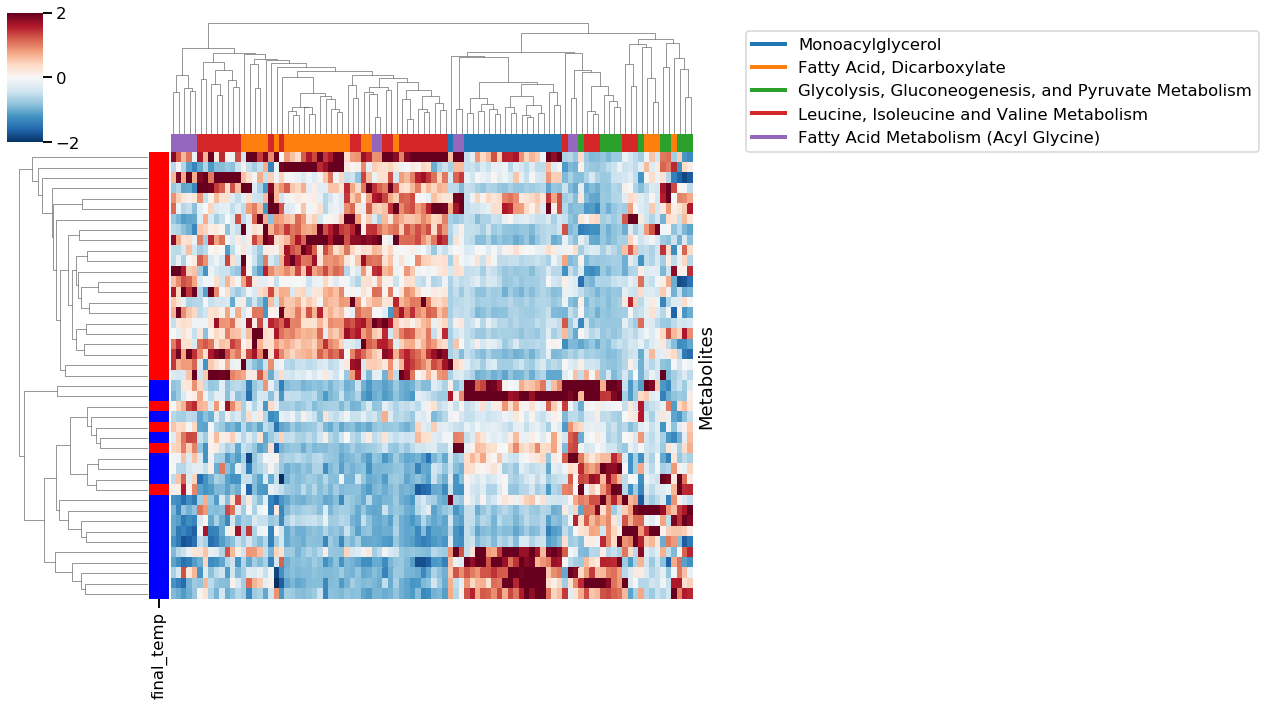

In [108]:
plt.figure(figsize=(30,20))
lut = dict({'H':'b','S':'r'})
row_colors = final_temp.map(lut)
col_palette = sns.color_palette("tab10",len(interestedPaths))
lut2 = dict(zip(interestedPaths, col_palette))
column_colors = pd.Series(metabolitePath_string).map(lut2)
# print(column_colors)
g = sns.clustermap(df_heatmap, z_score=1, cmap="RdBu_r",vmin=-2,vmax=2,
                   row_colors=row_colors,col_colors = column_colors.values,
#                    row_colors=column_colors.values,col_colors = row_colors,
                   row_cluster=True,col_cluster=True,
                   xticklabels=False,yticklabels=False)
ax = g.ax_heatmap
ax.set_ylabel('Metabolites')
ax.set_xlabel('')

# create a custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0],[0], color=col_palette[0],lw=4),
               Line2D([0],[0], color=col_palette[1],lw=4),
               Line2D([0],[0], color=col_palette[2],lw=4),
               Line2D([0],[0], color=col_palette[3],lw=4),
               Line2D([0],[0], color=col_palette[4],lw=4)]
ax.legend(custom_lines,interestedPaths,loc=[1.1,1])
plt.savefig('../processed/heatmap_GSEAtop5.png', bbox_inches='tight')
plt.show()
# Color-code the metabolites according to the pathways they belong to, and 
# then perform hierarchical clustering of those metabolites

# Identifying important features
## Method 1 (Multiple Linear Regression): Univariate Correlation Feature Selection using Final Temperature as Response Variable
 
Univariate correlation feature selection was used to identify specific metabolites that contribute the most to the predictive model. Correlation feature selection pinpoints the variables(in this case specific metabolites) with the highest correlation coefficients and therefore the metabolites that contribute the most to predicting the clincial feature (which in this case is temperature). 


In [109]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest, chi2, f_regression

#Creating target variable
y = np.array(merged_data['Final_Temp'])
#Create feature variables (metabolites)
metabolites = [col for col in merged_data.columns if 'X' in col]
# Separating out the features (ie metabolites)
df_metabs = merged_data.loc[:, metabolites]
x = merged_data.loc[:, metabolites].values

# Create dictionaries to go from chemID to biochemical, subpathways
dict_chemID_BIOCHEMICAL = dict(zip(metab_def['CHEMICAL ID'],metab_def['BIOCHEMICAL']))
dict_chemID_SUBPATHWAY = dict(zip(metab_def['CHEMICAL ID'],metab_def['SUB PATHWAY']))


In [110]:
#Fitting data into model and transforming, while selecting largest k values with f_regression as score function 
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x,y)
Feature_corr = pd.DataFrame(data={'CHEMICAL ID': np.ravel(df_metabs.columns), 
                                   'feature_corrVal': fs.scores_})
Feature_corr['CHEMICAL ID'] = Feature_corr['CHEMICAL ID'].str.replace('X','').astype(int)
# Feature_corr.head()

#Add metabolite names as new column
Feature_corr['BIOCHEMICAL'] = Feature_corr['CHEMICAL ID'].map(dict_chemID_BIOCHEMICAL)
Feature_corr['Pathway'] = Feature_corr['CHEMICAL ID'].map(dict_chemID_SUBPATHWAY)

# Feature_corr.head()

# Renaming and organizing by descending order
Feature_corr = Feature_corr.sort_values(by='feature_corrVal',ascending=False)
print(Feature_corr.head(20).Pathway.value_counts())
Feature_corr.head(20)

Leucine, Isoleucine and Valine Metabolism          7
Phospholipid Metabolism                            2
Histidine Metabolism                               1
Food Component/Plant                               1
Mevalonate Metabolism                              1
Folate Metabolism                                  1
Long Chain Monounsaturated Fatty Acid              1
Fatty Acid, Dicarboxylate                          1
Fatty Acid, Monohydroxy                            1
Glycine, Serine and Threonine Metabolism           1
Fatty Acid, Dihydroxy                              1
Phosphatidylethanolamine (PE)                      1
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)    1
Name: Pathway, dtype: int64


CHEMICAL ID  feature_corrVal                       BIOCHEMICAL  \
292    100001300       125.331930          alpha-hydroxyisovalerate   
182    100002284        97.917767           2S,3R-dihydroxybutyrate   
155    100001541        97.838397        2-hydroxy-3-methylvalerate   
141    100002417        86.085153          2,3-dihydroxyisovalerate   
322         1442        83.609523           beta-hydroxyisovalerate   
221    100001143        82.642781                 3-hydroxysuberate   
593    100001198        80.569884             myristoleate (14:1n5)   
604    100004299        77.726242       N-acetyl-1-methylhistidine*   
639         1084        76.180574                    N-acetylvaline   
472    100015666        74.160582             glycerophosphoserine*   
291    100000706        71.935220          alpha-hydroxyisocaproate   
622    100001006        71.258912                   N-acetylglycine   
8      100009217        69.813658  1,2-dilinoleoyl-GPE (18:2/18:2)*   
625    100001276        68.300619                N-acetylisoleucine   
260          173        65.670418                 7,8-dihydrofolate   
471    100000269        63.060632    glycerophosphorylcholine (GPC)   
4      100003926        62.692158     (R)-3-hydroxybutyrylcarnitine   
279    100000863        61.862150                           adipate   
910          566        61.629121                            valine   
194          112        61.195288       3-hydroxy-3-methylglutarate   

                                             Pathway  
292        Leucine, Isoleucine and Valine Metabolism  
182                            Fatty Acid, Dihydroxy  
155        Leucine, Isoleucine and Valine Metabolism  
141                             Food Component/Plant  
322        Leucine, Isoleucine and Valine Metabolism  
221                          Fatty Acid, Monohydroxy  
593            Long Chain Monounsaturated Fatty Acid  
604                             Histidine Metabolism  
639        Leucine, Isoleucine and Valine Metabolism  
472                          Phospholipid Metabolism  
291        Leucine, Isoleucine and Valine Metabolism  
622         Glycine, Serine and Threonine Metabolism  
8                      Phosphatidylethanolamine (PE)  
625        Leucine, Isoleucine and Valine Metabolism  
260                                Folate Metabolism  
471                          Phospholipid Metabolism  
4    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)  
279                        Fatty Acid, Dicarboxylate  
910        Leucine, Isoleucine and Valine Metabolism  
194                            Mevalonate Metabolism

The above table presents the 20 metabolites with the highest Feature scores. The table includes the chemical ID number, feature score, and its corresponding biochemical name. 

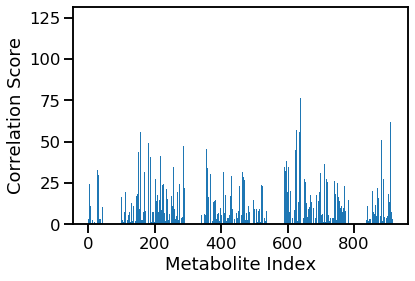

In [111]:
#plot the scores
plt.figure()
plt.bar(range(len(fs.scores_)), fs.scores_)
plt.xlabel('Metabolite Index')
plt.ylabel('Correlation Score')
plt.show()


### Fig 
The above graph plots the metabolite number (as shown by the x-axis) and the feature score (as shown in the y axis). The peaks represent metabolites with particularly high feature scores. A higher feature score indicates that the variable contributes more to accurately predicting the desired clinical outcome.  


### Creating Multiple Linear Regression model using Features from Univariate Correlation
Now, we want to see whether we can obtain a strong predictive model of final temperature using a reduced set of metabolites. So, we created a Multiple Linear Regression Model using only the 20 metabolites with the highest feature selection score to determine how well the metabolites correlate and predict the desired clinical outcome (temperature).

Workflow: We will first select the features of interest as identified by univariate correlation and assemble a new features matrix with them. We will then perform K-Fold cross validation to evalute how multiple linear regression performs with these selected features. We will then generate a new multiple linear regression model instance trained on 80% of the data and tested on 20% and visualize how well the predicted values are from the actual values

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Define number of metabolites to use for the regression
num_metabs = 20

# Assemble data table using the top chosen metabs
chosenMetabChemID = Feature_corr['CHEMICAL ID'].values[:num_metabs]
chosenMetabChemID = ['X'+str(s) for s in chosenMetabChemID]
print(chosenMetabChemID)
print(len(chosenMetabChemID))

# Extract response variable (final temp)
y = np.array(merged_data['Final_Temp'])
print(y.shape)
# Create matrix of selected features
x = np.array(df_metabs.loc[:,chosenMetabChemID])
print(x.shape)



['X100001300', 'X100002284', 'X100001541', 'X100002417', 'X1442', 'X100001143', 'X100001198', 'X100004299', 'X1084', 'X100015666', 'X100000706', 'X100001006', 'X100009217', 'X100001276', 'X173', 'X100000269', 'X100003926', 'X100000863', 'X566', 'X112']
20
(43,)
(43, 20)


In [113]:
# Define cross-validation method
cv = KFold(n_splits=5, random_state=1,shuffle=True)

# Build multiple linear regression model
model = LinearRegression()

# Use K-fold CV to evaluate model
scores = cross_val_score(model, x, y,
                         scoring='neg_mean_squared_error',
                        cv=cv, n_jobs=-1)
# output scores
print(scores)
# Print out the square root of the Mean Squared Error (MSE) 
# for RMSE. 
print('Average RMSE = {}'.format(np.sqrt(np.mean(np.abs(scores)))))
print('Std. Dev of RMSE = {}'.format(np.sqrt(np.std(scores))))

[-13.06130764 -13.43563912  -7.1234809   -3.91519132  -6.12997124]
Average RMSE = 2.955184942537683
Std. Dev of RMSE = 1.95758636536277


In [114]:
# Perform train-test split for visualization purposes 
# of multiple linear regression on the features as identified by
# univariate correlation
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                   random_state=2)
model = LinearRegression().fit(x_train,y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)

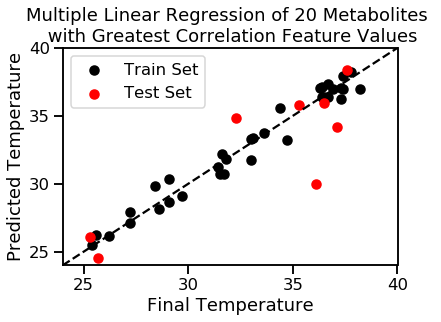

In [115]:
#plotting 
plt.scatter(y_train, y_train_pred,  color='black',label='Train Set')
plt.scatter(y_test, y_test_pred,  color='red',label='Test Set')

plt.title('Multiple Linear Regression of 20 Metabolites \n with Greatest Correlation Feature Values')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted Temperature')
# plot diagonal identity line
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(np.linspace(24,40,100),np.linspace(24,40,100),'k--')
plt.legend()
plt.show()

### Fig 12
The graph plots the predicted temperature (y) and the actual final temperature of the mice in C (x). As shown in the graph above, the multiple linear regression model shows a clear linear relationship. The blue line delineates and emphasizes the linear relationship. This means that we have strong predictive performance of temperature using 20 of the 917 metabolites

## Method 2 (Multiple Linear Regression): Using LASSO Regularization with Final Temperature as Response Variable
Lasso is supervised regression analysis tool selection tool that performs both regularization and feature selection. In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficients. Hence, LASSO is very conservative when it comes to ruling in metabolites into the model it constructs. Ultimately, LASSO identifies metabolites that are particuarly useful for predicting the clinical data. 

In [116]:
#LASSO Analysis 
# Import Libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LinearRegression
#Defining Variables:
y = np.array(merged_data['Final_Temp'])
x = np.array(df_metabs)
print(x.shape)

(43, 917)


In [117]:
#Pipeline Scaling
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])
#Optimize alpha-hyperparameter
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",
                      verbose=0)
#Fit the grid search
search = search.fit(x,y)
#Get best alpha
search_alpha = search.best_params_
print('alpha value is: {}'.format(search_alpha))
#Finding important features
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)


alpha value is: {'model__alpha': 0.4}


In [118]:
# Assemble dataframe with the LASSO feature info
df_lasso = pd.DataFrame({'CHEMICAL ID':df_metabs.columns,'Coeff':coefficients,'Imp':importance})
df_lasso['CHEMICAL ID'] = df_lasso['CHEMICAL ID'].str.replace('X','').astype(int)
df_lasso['BIOCHEMICAL'] = df_lasso['CHEMICAL ID'].map(dict_chemID_BIOCHEMICAL)
df_lasso['Pathway'] = df_lasso['CHEMICAL ID'].map(dict_chemID_SUBPATHWAY)

# df_lasso = pd.merge(df_lasso, names)
lasso_top = df_lasso[df_lasso['Imp']>0].sort_values(by='Imp',ascending=False)
print(lasso_top.shape)
print(lasso_top.Pathway.value_counts())
lasso_top

(17, 5)
Leucine, Isoleucine and Valine Metabolism                2
Chemical                                                 2
Gamma-glutamyl Amino Acid                                2
Histidine Metabolism                                     1
Lysine Metabolism                                        1
Methionine, Cysteine, SAM and Taurine Metabolism         1
Fatty Acid, Dicarboxylate                                1
Glycolysis, Gluconeogenesis, and Pyruvate Metabolism     1
Food Component/Plant                                     1
Polyamine Metabolism                                     1
Fatty Acid Metabolism (Acyl Carnitine, Dicarboxylate)    1
Tryptophan Metabolism                                    1
Phosphatidylethanolamine (PE)                            1
Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)          1
Name: Pathway, dtype: int64


CHEMICAL ID     Coeff       Imp                           BIOCHEMICAL  \
291    100000706 -0.860373  0.860373              alpha-hydroxyisocaproate   
322         1442 -0.793202  0.793202               beta-hydroxyisovalerate   
623    100001293 -0.740355  0.740355                     N-acetylhistidine   
141    100002417 -0.739080  0.739080              2,3-dihydroxyisovalerate   
8      100009217 -0.355032  0.355032      1,2-dilinoleoyl-GPE (18:2/18:2)*   
605    100021760 -0.321177  0.321177               N-acetyl-2-aminoadipate   
441    100001485 -0.217288  0.217288             gamma-glutamylisoleucine*   
851    100021220 -0.195388  0.195388                      succinoyltaurine   
632          192 -0.156932  0.156932                    N-acetylputrescine   
699    100005996 -0.095153  0.095153  octadecenedioylcarnitine (C18:1-DC)*   
610    100021696 -0.077611  0.077611  n-Acetyl-s-(2-hydroxypropyl)cysteine   
243    100002390 -0.074069  0.074069              4-methylbenzenesulfonate   
889          565  0.037632  0.037632                            tryptophan   
446         1102  0.033124  0.033124                gamma-glutamyltyrosine   
465         1052  0.031926  0.031926                             glycerate   
215    100019801 -0.027528  0.027528              3-hydroxyoleoylcarnitine   
279    100000863 -0.000608  0.000608                               adipate   

                                               Pathway  
291          Leucine, Isoleucine and Valine Metabolism  
322          Leucine, Isoleucine and Valine Metabolism  
623                               Histidine Metabolism  
141                               Food Component/Plant  
8                        Phosphatidylethanolamine (PE)  
605                                  Lysine Metabolism  
441                          Gamma-glutamyl Amino Acid  
851   Methionine, Cysteine, SAM and Taurine Metabolism  
632                               Polyamine Metabolism  
699  Fatty Acid Metabolism (Acyl Carnitine, Dicarbo...  
610                                           Chemical  
243                                           Chemical  
889                              Tryptophan Metabolism  
446                          Gamma-glutamyl Amino Acid  
465  Glycolysis, Gluconeogenesis, and Pyruvate Meta...  
215    Fatty Acid Metabolism (Acyl Carnitine, Hydroxy)  
279                          Fatty Acid, Dicarboxylate

LASSO identified 17 metabolites as being particularly important to predict final temperature. Let's see the predictive performance now of the LASSO model.

### Creating Multiple Linear Regression model using Features from LASSO Regularization

In [119]:
# Define number of metabolites to use for the regression
chosenMetabChemID2 = ['X' + str(s) for s in lasso_top['CHEMICAL ID']]

# Extract response variable (final temp)
y = np.array(merged_data['Final_Temp'])
print(y.shape)
# Create matrix of selected features
x = np.array(df_metabs.loc[:,chosenMetabChemID2])
print(x.shape)



(43,)
(43, 17)


In [120]:
# Define cross-validation method
cv = KFold(n_splits=5, random_state=1,shuffle=True)

# Build multiple linear regression model
model = LinearRegression()

# Use K-fold CV to evaluate model
scores = cross_val_score(model, x, y,
                         scoring='neg_mean_squared_error',
                        cv=cv, n_jobs=-1)
# output scores
print(scores)
# Print out the square root of the Mean Squared Error (MSE) 
# for RMSE. 
print('Average RMSE = {}'.format(np.sqrt(np.mean(np.abs(scores)))))
print('Std. Dev of RMSE = {}'.format(np.sqrt(np.std(scores))))

[-0.62377576 -1.42203884 -3.86793885 -1.26028388 -1.01899944]
Average RMSE = 1.2800809951002914
Std. Dev of RMSE = 1.0708058599331887


In [121]:
# Perform train-test split for visualization purposes 
# of multiple linear regression on the features as identified by
# univariate correlation
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.2,
                                                   random_state=2)
model = LinearRegression().fit(x_train,y_train)
y_test_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)


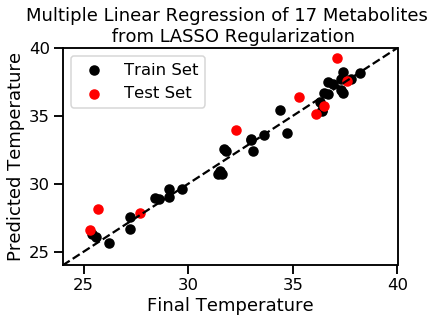

In [122]:
#plotting 
plt.scatter(y_train, y_train_pred,  color='black',label='Train Set')
plt.scatter(y_test, y_test_pred,  color='red',label='Test Set')

plt.title('Multiple Linear Regression of 17 Metabolites \n from LASSO Regularization')
plt.xlabel('Final Temperature') 
plt.ylabel('Predicted Temperature')
# plot diagonal identity line
plt.xlim(24,40)
plt.ylim(24,40)
plt.plot(np.linspace(24,40,100),np.linspace(24,40,100),'k--')
plt.legend()
plt.show()

LASSO has better predictive power  of final temperature (compared to univariate correlation)using only 17 metabolites due to lower mean and std. deviation of RMSE values when performing K-Fold cross validation

## Method 3: Partial Least Squares Regression (PLS-R) with Final Temperature as Response Variable
PLSR is supervised regression analysis tool selection tool that performs well when there are many correlated predictor variables, and when there are more features than samples. It is more complicated since it will try to find latent variables useful for the regression problem (similar to finding principal components)

PLSR tutorial: https://www.statology.org/partial-least-squares-in-python/

In [123]:
from sklearn.preprocessing import StandardScaler 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error

#Defining Variables:
y = np.array(merged_data['Final_Temp'])
x = np.array(df_metabs)
print(x.shape)

(43, 917)


In [124]:
#define cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

mse = []
n = x.shape[0]
x_ss = StandardScaler().fit_transform(x)

# Calculate MSE with only intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, x_ss, y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)


C:\Users\amisr\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\amisr\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\amisr\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\amisr\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:351: UserWarning: X scores are null at iteration 0
  warnings.warn('X scores are null at iteration %s' % k)
C:\Users\amisr\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:84: RuntimeWarning: invalid value encountered in true_divide
  y_weights = np.dot(Y.T, x_score) / np.dot(x_score.T, x_score)
C:\Users\amisr

In [125]:
mse

[18.370665579820336,
 5.778850387623901,
 4.757912332658955,
 4.695915118838043,
 4.901362386697963,
 5.488497636635976]

Text(0.5, 1.0, 'Final Temperature')

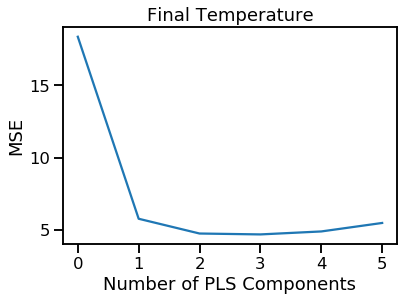

In [126]:
#plot test MSE vs. number of components
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Final Temperature')

This shows the minimum MSE is at PLS components = 2

In [127]:
# Define cross-validation method
cv = KFold(n_splits=5, random_state=1,shuffle=True)

# Build multiple linear regression model
model = PLSRegression(n_components=2)

# Use K-fold CV to evaluate model
scores = cross_val_score(model, x_ss, y,
                         scoring='neg_mean_squared_error',
                        cv=cv, n_jobs=-1)
# output scores
print(scores)
# Print out the square root of the Mean Squared Error (MSE) 
# for RMSE. 
print('Average RMSE = {}'.format(np.sqrt(np.mean(np.abs(scores)))))
print('Std. Dev of RMSE = {}'.format(np.sqrt(np.std(scores))))

[-4.96149712 -5.27497911 -6.80533658 -3.01491246 -5.46889801]
Average RMSE = 2.2594522914752937
Std. Dev of RMSE = 1.10451822066574


The PLSR model has greater RMSE compared to the linear regression model that was created using features identified by LASSO regularization. Still, we could perhaps understand what is contributing most to the 2 latent variables that PLS is using

In [128]:
# Create a PLSR model instance, fit to data, and examine loadings
model = PLSRegression(n_components=2)
model.fit(x_ss, y)

# Examine loadings
df_PLSR = pd.DataFrame({'LV_1':model.x_loadings_[:,0],
                       'LV_2':model.x_loadings_[:,0],
                       'LV_1_abs':np.abs(model.x_loadings_[:,0]),
                       'LV_2_abs':np.abs(model.x_loadings_[:,1]),
                      'Distance':np.sqrt(model.x_loadings_[:,0]**2+model.x_loadings_[:,1]**2)})

df_PLSR['CHEMICAL ID']=df_metabs.columns.str.replace('X','').astype(int)
df_PLSR['BIOCHEMICAL'] = df_PLSR['CHEMICAL ID'].map(dict_chemID_BIOCHEMICAL)
df_PLSR['Pathway'] = df_PLSR['CHEMICAL ID'].map(dict_chemID_SUBPATHWAY)


In [129]:
df_PLSR.sort_values(by='Distance',ascending=False).head(20)

LV_1      LV_2  LV_1_abs  LV_2_abs  Distance  CHEMICAL ID  \
247  0.004471  0.004471  0.004471  0.105818  0.105912    100002462   
623  0.016568  0.016568  0.016568  0.102805  0.104131    100001293   
619 -0.008852 -0.008852  0.008852  0.101770  0.102154         1215   
716  0.027976  0.027976  0.027976  0.096813  0.100774    100001416   
42   0.014412  0.014412  0.014412  0.096331  0.097403    100009222   
897  0.006897  0.006897  0.006897  0.095554  0.095803    100021131   
76   0.009123  0.009123  0.009123  0.094891  0.095328    100008990   
231 -0.017375 -0.017375  0.017375  0.092825  0.094437          382   
794 -0.004318 -0.004318  0.004318  0.092368  0.092469    100002324   
729  0.032618  0.032618  0.032618  0.086352  0.092307    100002107   
630 -0.004417 -0.004417  0.004417  0.091538  0.091645         1162   
727  0.033718  0.033718  0.033718  0.082129  0.088781    100008954   
645  0.009595  0.009595  0.009595  0.087747  0.088270    100004561   
232 -0.006846 -0.006846  0.006846  0.087997  0.088263         1053   
647  0.019733  0.019733  0.019733  0.085757  0.087998    100001491   
43   0.000452  0.000452  0.000452  0.087320  0.087321    100009343   
59  -0.016265 -0.016265  0.016265  0.085030  0.086572    100009219   
313 -0.015546 -0.015546  0.015546  0.084728  0.086142          234   
251  0.019722  0.019722  0.019722  0.083303  0.085606    100000054   
759  0.048156  0.048156  0.048156  0.070334  0.085240         1026   

                                      BIOCHEMICAL  \
247                5-(galactosylhydroxy)-L-lysine   
623                             N-acetylhistidine   
619                N-acetylglucosaminylasparagine   
716                                     orotidine   
42    1-linoleoyl-2-arachidonoyl-GPE (18:2/20:4)*   
897                   undecenoylcarnitine (C11:1)   
76    1-palmitoyl-2-arachidonoyl-GPE (16:0/20:4)*   
231                             3-sulfo-L-alanine   
794                    S-carboxymethyl-L-cysteine   
729          palmitoyl sphingomyelin (d18:1/16:0)   
630                           N-acetylneuraminate   
727  palmitoyl dihydrosphingomyelin (d18:0/16:0)*   
645                      N-formylanthranilic acid   
232                            3-ureidopropionate   
647                         N-glycolylneuraminate   
43      1-linoleoyl-2-linolenoyl-GPC (18:2/18:3)*   
59       1-oleoyl-2-arachidonoyl-GPE (18:1/20:4)*   
313                                     aspartate   
251                               5-hydroxylysine   
759                      phosphoethanolamine (PE)   

                                               Pathway  
247                                  Lysine Metabolism  
623                               Histidine Metabolism  
619                              Aminosugar Metabolism  
716          Pyrimidine Metabolism, Orotate containing  
42                       Phosphatidylethanolamine (PE)  
897  Fatty Acid Metabolism (Acyl Carnitine, Monouns...  
76                       Phosphatidylethanolamine (PE)  
231   Methionine, Cysteine, SAM and Taurine Metabolism  
794                                       Drug - Other  
729                                     Sphingomyelins  
630                              Aminosugar Metabolism  
727                              Dihydrosphingomyelins  
645                              Tryptophan Metabolism  
232           Pyrimidine Metabolism, Uracil containing  
647                              Aminosugar Metabolism  
43                            Phosphatidylcholine (PC)  
59                       Phosphatidylethanolamine (PE)  
313                   Alanine and Aspartate Metabolism  
251                                  Lysine Metabolism  
759                            Phospholipid Metabolism

In [130]:
df_PLSR.sort_values(by='Distance',ascending=False).head(20).Pathway.value_counts()

Aminosugar Metabolism                                      3
Phosphatidylethanolamine (PE)                              3
Lysine Metabolism                                          2
Histidine Metabolism                                       1
Dihydrosphingomyelins                                      1
Methionine, Cysteine, SAM and Taurine Metabolism           1
Pyrimidine Metabolism, Orotate containing                  1
Fatty Acid Metabolism (Acyl Carnitine, Monounsaturated)    1
Sphingomyelins                                             1
Drug - Other                                               1
Alanine and Aspartate Metabolism                           1
Phospholipid Metabolism                                    1
Phosphatidylcholine (PC)                                   1
Tryptophan Metabolism                                      1
Pyrimidine Metabolism, Uracil containing                   1
Name: Pathway, dtype: int64